# Chapter 15: Matrices and Linear Algebra

*Mathematics for Psychologists and Computation*

Welcome to Chapter 15! You've come a long way in your mathematical journey. Now we're ready to explore matrices and linear algebra - powerful mathematical tools used extensively in advanced psychological research, especially in areas like factor analysis, structural equation modeling, and computational neuroscience.

Don't worry if you've heard that linear algebra is difficult. We'll introduce concepts gradually and show how they apply directly to psychological questions.

## Why Linear Algebra Matters for Psychologists

Linear algebra provides tools to work with multiple variables simultaneously, which is exactly what psychologists need when studying complex human behavior. Here are some applications:

1. **Factor Analysis**: Finding hidden factors that explain patterns in psychological test responses
2. **Multidimensional Scaling**: Visualizing similarities between psychological stimuli
3. **Network Analysis**: Understanding relationships between symptoms or social connections
4. **Multivariate Statistics**: Analyzing data with multiple dependent variables
5. **Neuroimaging**: Processing and analyzing brain scans
6. **Machine Learning**: Training models to predict psychological outcomes

Let's start with the fundamental building block: the matrix.

## What is a Matrix?

A matrix is simply a rectangular array of numbers arranged in rows and columns. Think of it as a table of values. Here's an example of a matrix with 2 rows and 3 columns (called a 2×3 matrix):

$$
\begin{pmatrix}
5 & 8 & 2 \\
1 & 0 & 3
\end{pmatrix}
$$

In Python, we can represent matrices using NumPy arrays:

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = False  # Ensure grid is turned off
plt.rcParams['figure.dpi'] = 300  # High resolution figures

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
import seaborn as sns  # For prettier plots

# Create a simple 2×3 matrix
A = np.array([[5, 8, 2],
              [1, 0, 3]])

print("Matrix A:")
print(A)

# Get the dimensions (shape) of the matrix
print("\nShape of matrix A:", A.shape)  # Will show (2, 3)

# Access specific elements (remember Python uses 0-indexing)
print("\nElement at row 0, column 1:", A[0, 1])  # Should show 8
print("Element at row 1, column 2:", A[1, 2])  # Should show 3

Matrix A:
[[5 8 2]
 [1 0 3]]

Shape of matrix A: (2, 3)

Element at row 0, column 1: 8
Element at row 1, column 2: 3


## Psychological Example: Representing Survey Data

Let's see how matrices can represent psychological data. Imagine we have 5 participants who took a 4-item anxiety questionnaire, rating each item from 1 (not at all) to 5 (extremely):

1. I feel tense or wound up
2. I get sudden feelings of panic
3. I feel restless and can't relax
4. I worry about future events

We can represent their responses as a matrix where:
- Each row represents a participant
- Each column represents a questionnaire item

Anxiety questionnaire data (5 participants × 4 items):
[[4 3 5 4]
 [2 1 2 3]
 [5 4 5 5]
 [3 2 4 5]
 [1 1 2 3]]


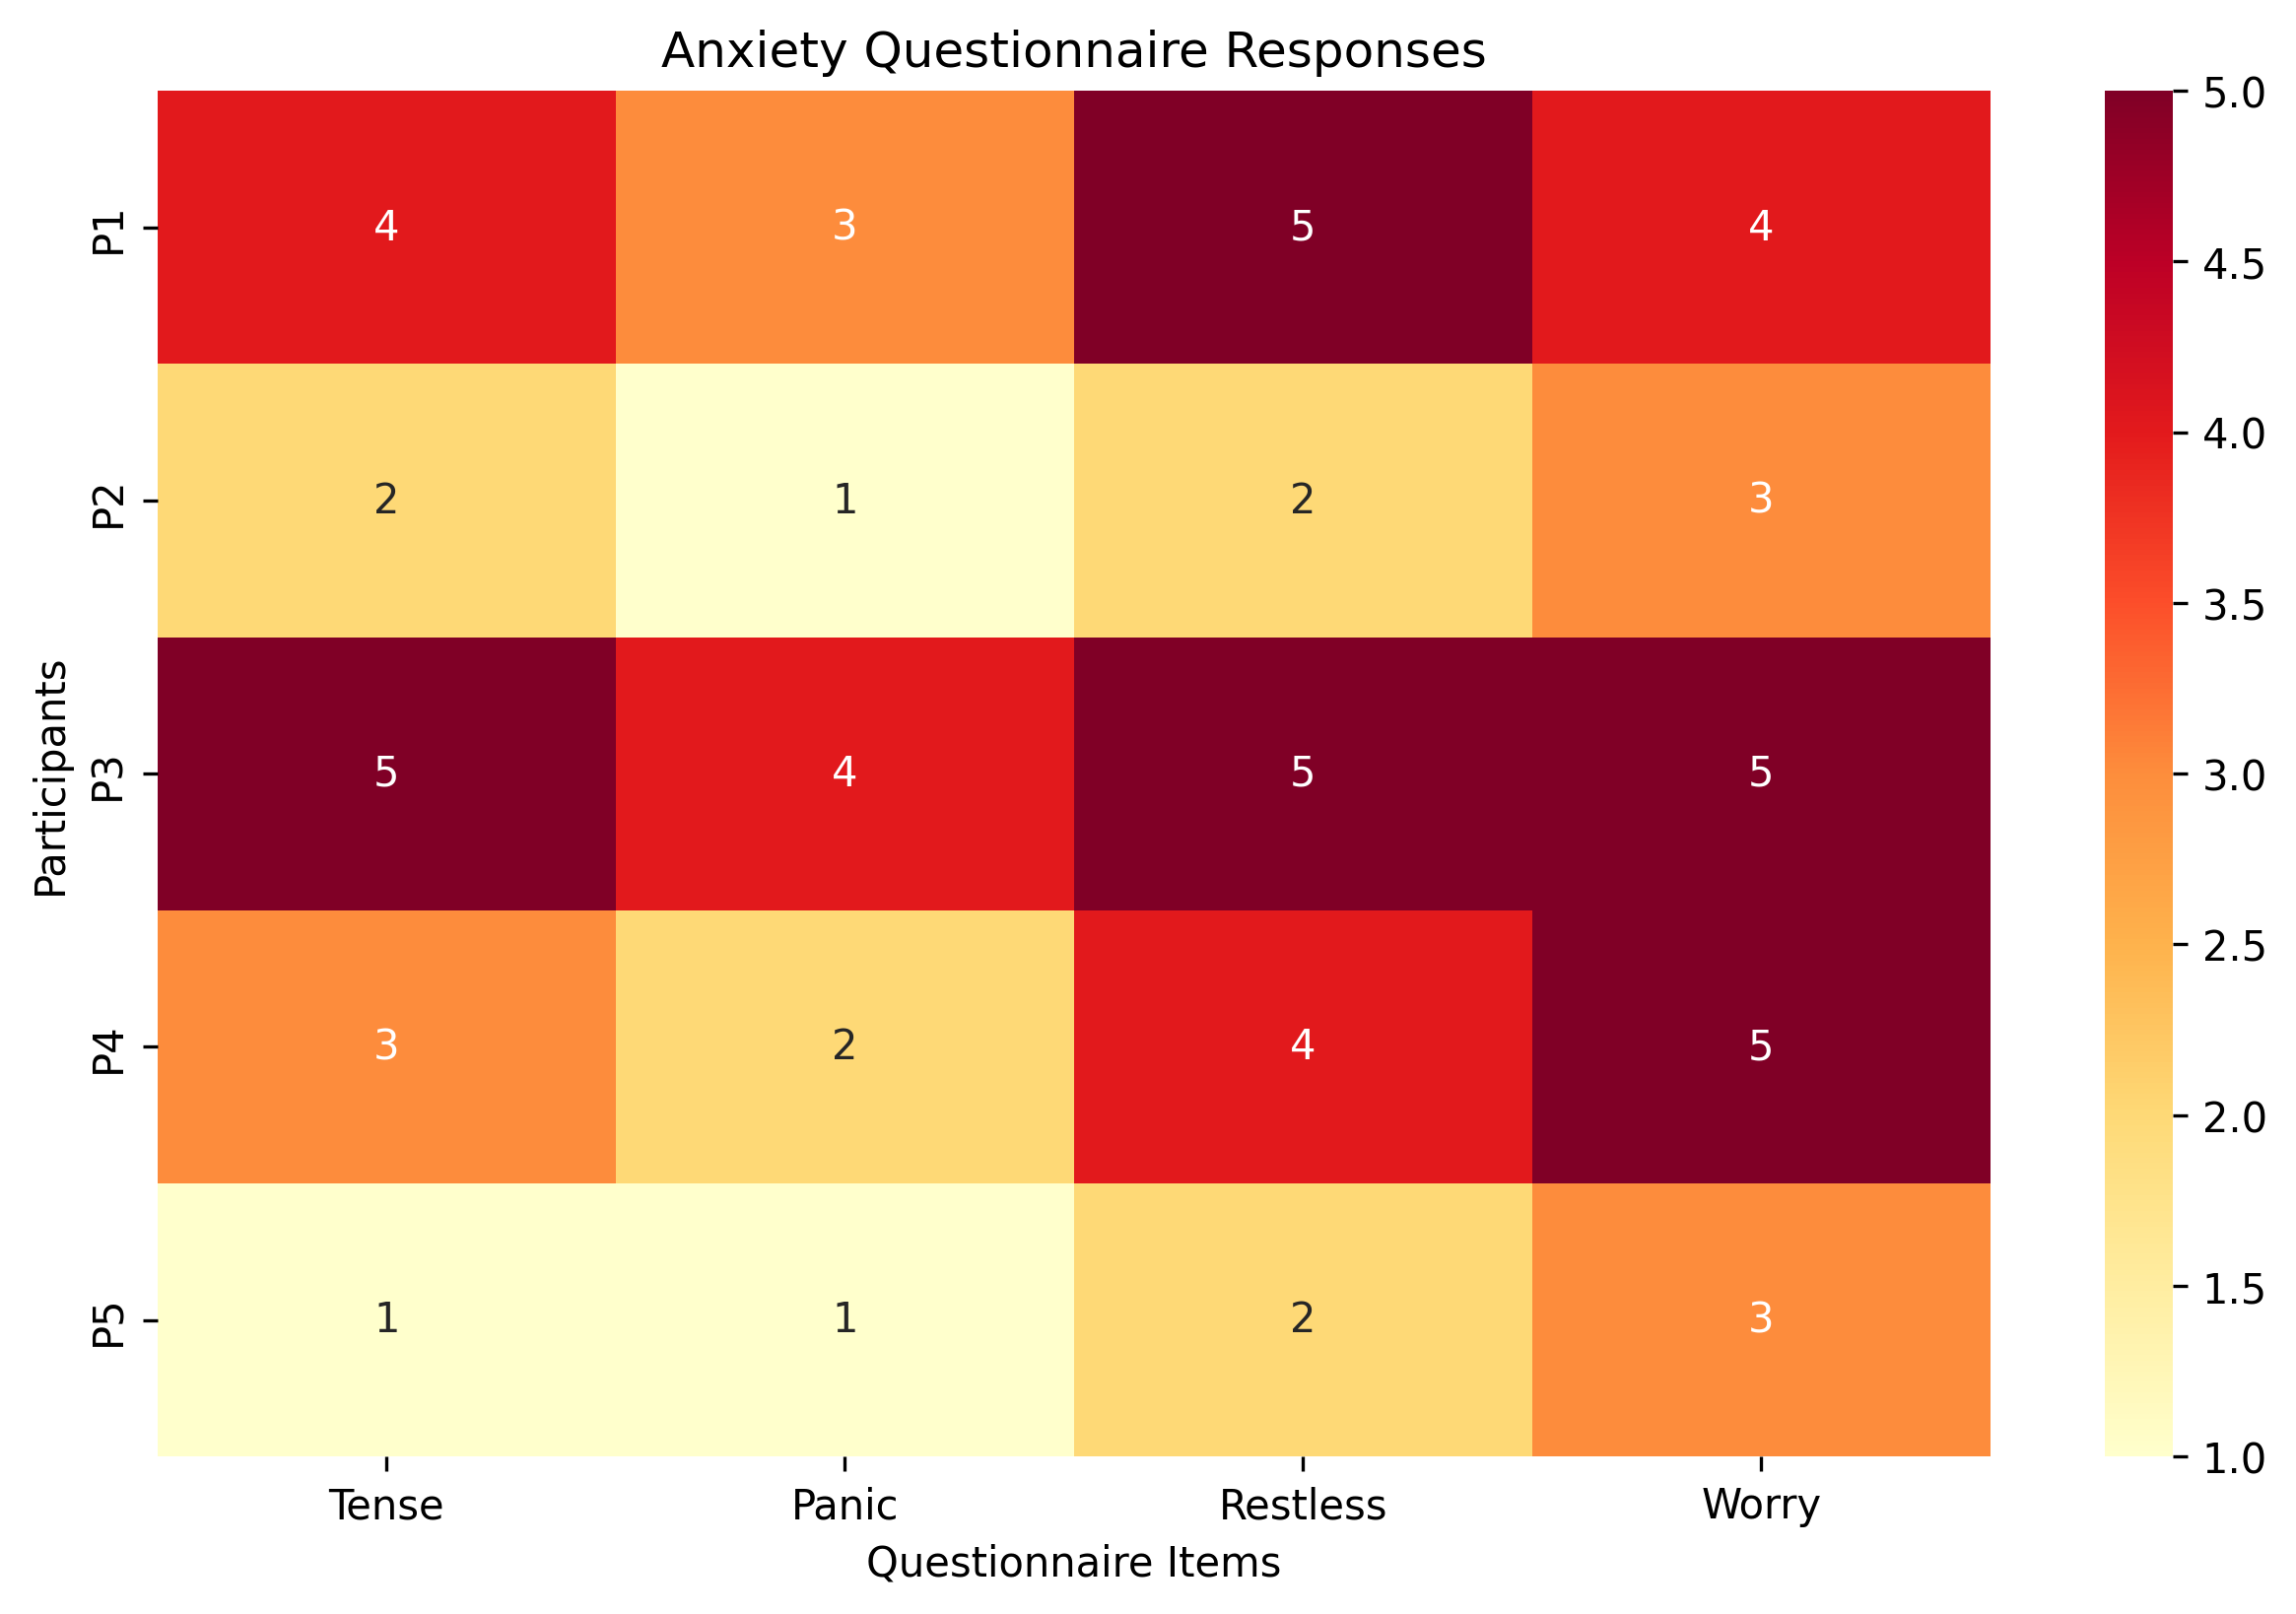

In [3]:
# Create a matrix of anxiety questionnaire responses
# Rows = participants, Columns = questionnaire items
anxiety_data = np.array([
    [4, 3, 5, 4],  # Participant 1
    [2, 1, 2, 3],  # Participant 2
    [5, 4, 5, 5],  # Participant 3
    [3, 2, 4, 5],  # Participant 4
    [1, 1, 2, 3]   # Participant 5
])

print("Anxiety questionnaire data (5 participants × 4 items):")
print(anxiety_data)

# Let's visualize this data with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(anxiety_data, annot=True, cmap="YlOrRd", 
            xticklabels=["Tense", "Panic", "Restless", "Worry"],
            yticklabels=["P1", "P2", "P3", "P4", "P5"])
plt.title("Anxiety Questionnaire Responses")
plt.xlabel("Questionnaire Items")
plt.ylabel("Participants")
plt.show()

## Matrix Types and Special Matrices

There are several important types of matrices that you'll encounter frequently:

1. **Square Matrix**: Has the same number of rows and columns
2. **Identity Matrix**: A square matrix with 1s on the diagonal and 0s elsewhere (like the number 1 in matrix form)
3. **Diagonal Matrix**: A square matrix with values only on the diagonal
4. **Symmetric Matrix**: Equal to its transpose (explained shortly)
5. **Correlation/Covariance Matrix**: Shows relationships between variables (very common in psychology)

Let's see examples of these special matrices:

In [4]:
# 1. Square matrix (3×3)
square_matrix = np.array([
    [4, 7, 2],
    [1, 5, 3],
    [8, 0, 6]
])

# 2. Identity matrix (3×3)
identity_matrix = np.eye(3)  # Creates a 3×3 identity matrix

# 3. Diagonal matrix
diagonal_matrix = np.diag([5, 2, 9])  # Creates a diagonal matrix with these values

# 4. Symmetric matrix (equal to its own transpose)
symmetric_matrix = np.array([
    [4, 2, 3],
    [2, 5, 1],
    [3, 1, 6]
])

# 5. Let's create a correlation matrix from our anxiety data
correlation_matrix = np.corrcoef(anxiety_data, rowvar=False)  # rowvar=False means columns are variables

# Display each matrix
print("Square matrix:")
print(square_matrix)
print("\nIdentity matrix:")
print(identity_matrix)
print("\nDiagonal matrix:")
print(diagonal_matrix)
print("\nSymmetric matrix:")
print(symmetric_matrix)
print("\nCorrelation matrix of anxiety items:")
print(np.round(correlation_matrix, 2))  # Rounded to 2 decimal places for clarity

Square matrix:
[[4 7 2]
 [1 5 3]
 [8 0 6]]

Identity matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Diagonal matrix:
[[5 0 0]
 [0 2 0]
 [0 0 9]]

Symmetric matrix:
[[4 2 3]
 [2 5 1]
 [3 1 6]]

Correlation matrix of anxiety items:
[[1.   0.97 0.94 0.79]
 [0.97 1.   0.94 0.77]
 [0.94 0.94 1.   0.82]
 [0.79 0.77 0.82 1.  ]]


The correlation matrix is particularly important in psychology. Let's visualize it to understand what it shows:

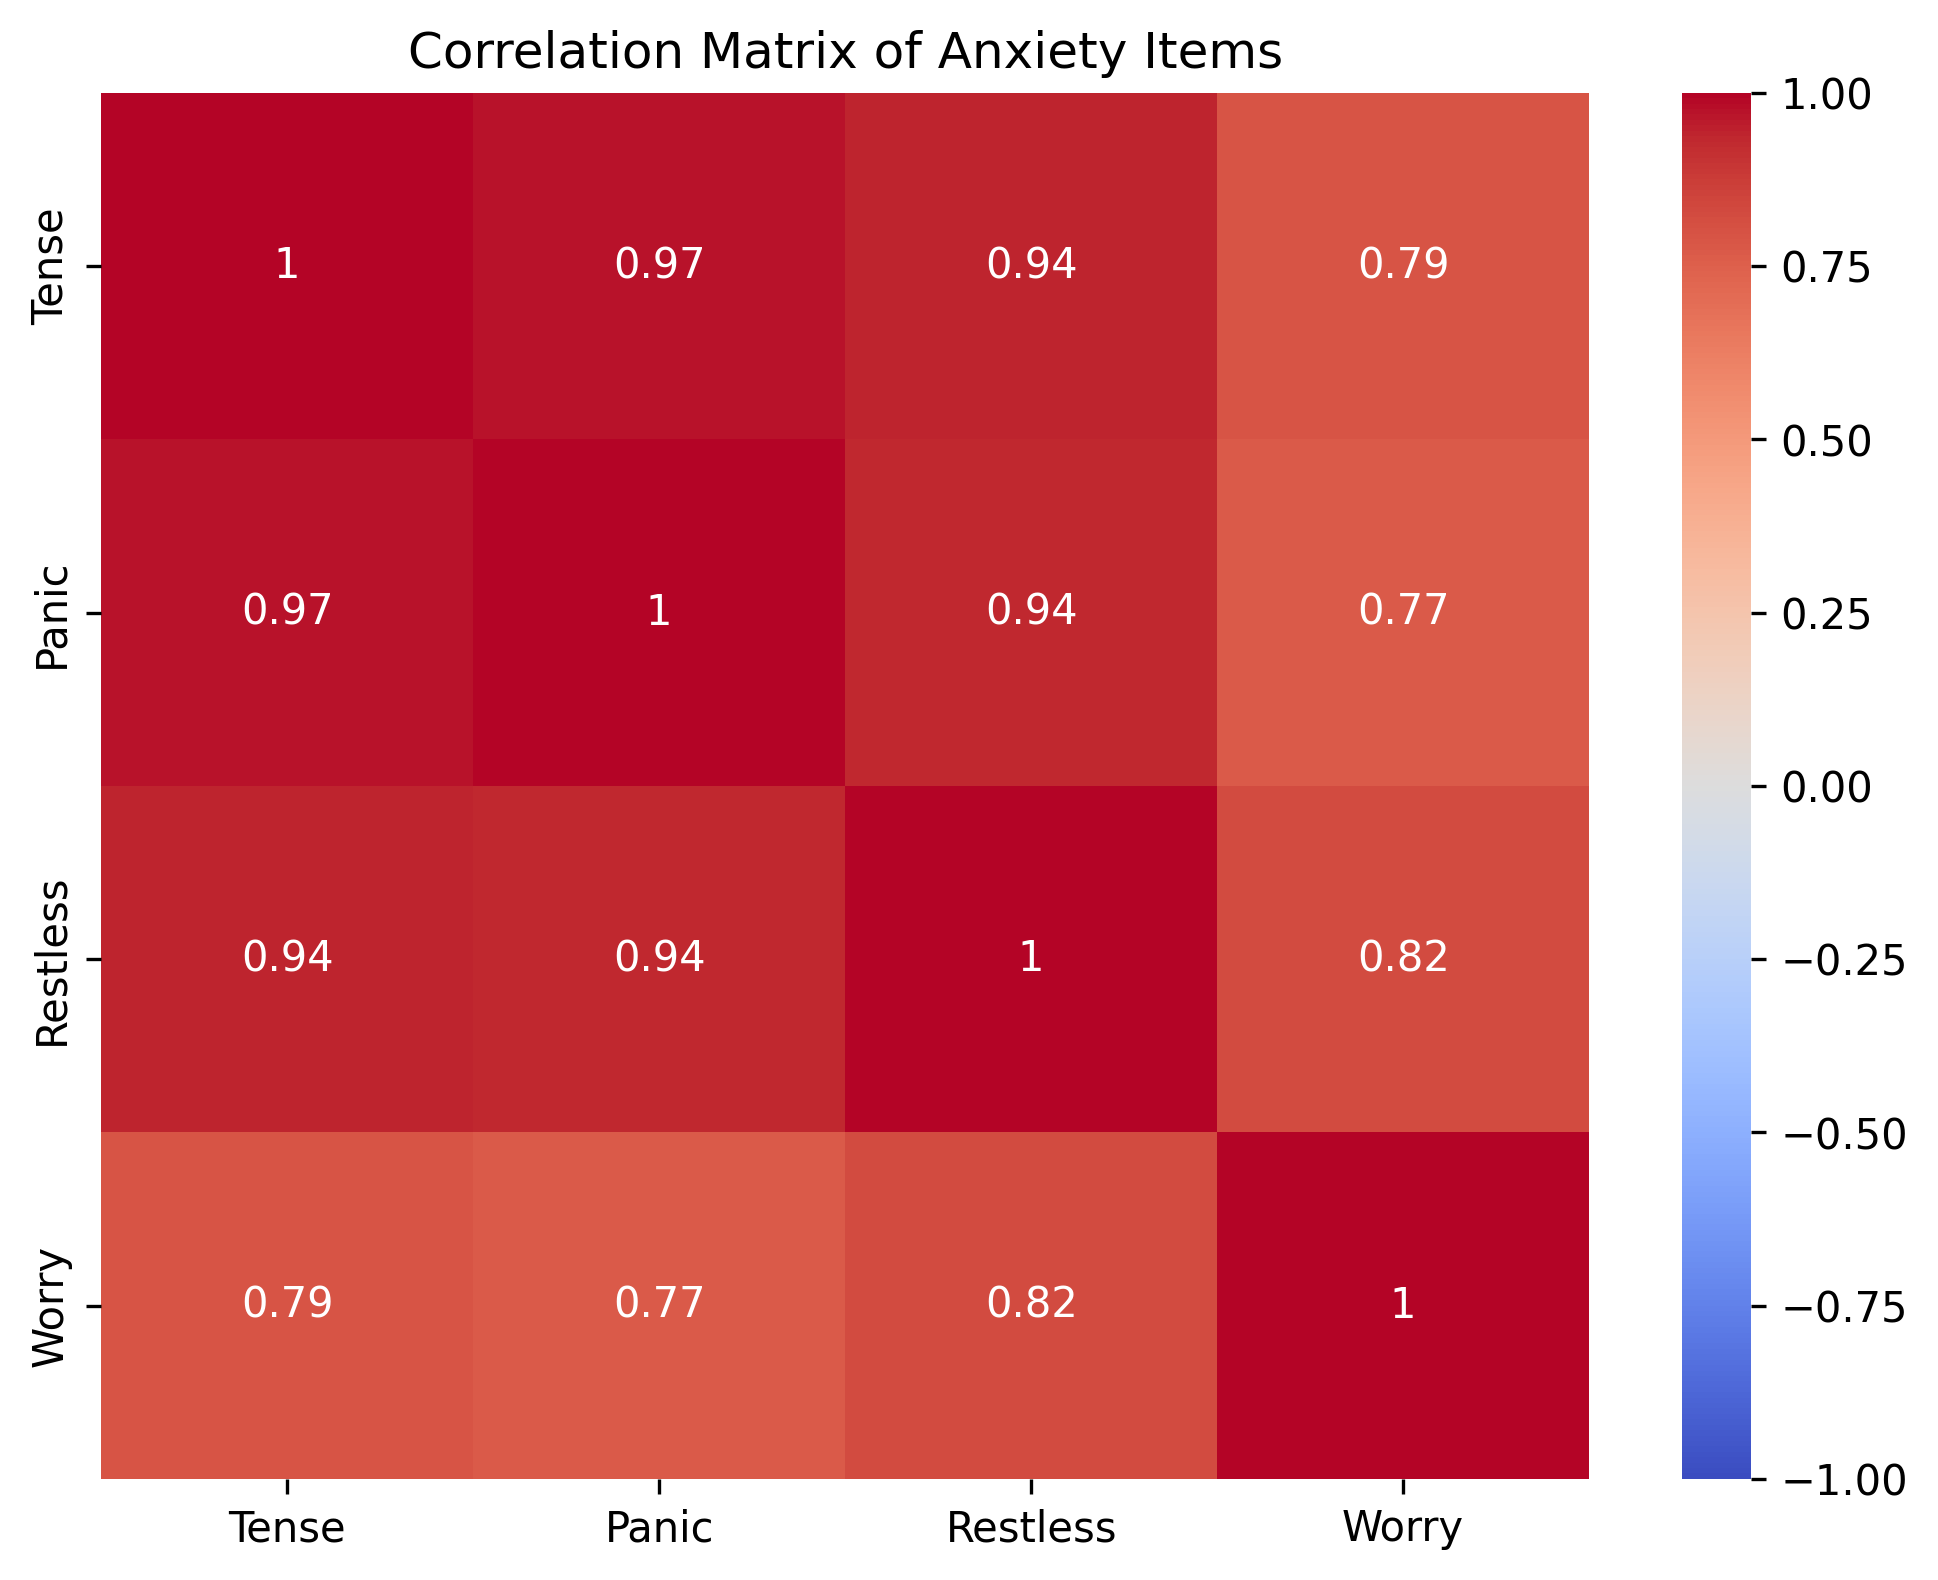

Interpretation of the correlation matrix:
- Values close to 1 indicate strong positive correlation
- Values close to -1 indicate strong negative correlation
- Values close to 0 indicate little correlation

For example, 'feeling tense' and 'feeling restless' have a correlation of approximately 0.94


In [5]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1,
            xticklabels=["Tense", "Panic", "Restless", "Worry"],
            yticklabels=["Tense", "Panic", "Restless", "Worry"])
plt.title("Correlation Matrix of Anxiety Items")
plt.show()

# What does this tell us?
print("Interpretation of the correlation matrix:")
print("- Values close to 1 indicate strong positive correlation")
print("- Values close to -1 indicate strong negative correlation")
print("- Values close to 0 indicate little correlation")
print("\nFor example, 'feeling tense' and 'feeling restless' have a correlation of approximately", 
      round(correlation_matrix[0, 2], 2))

## Basic Matrix Operations

Now that we understand what matrices are, let's learn the basic operations we can perform with them.

### 1. Matrix Addition and Subtraction

Just like with regular numbers, we can add and subtract matrices. To do this, we add or subtract the corresponding elements. The matrices must have the same dimensions.

For example, if we have:

$$A = \begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix} \quad \text{and} \quad B = \begin{pmatrix}
5 & 6 \\
7 & 8
\end{pmatrix}$$

Then $A + B = \begin{pmatrix}
1+5 & 2+6 \\
3+7 & 4+8
\end{pmatrix} = \begin{pmatrix}
6 & 8 \\
10 & 12
\end{pmatrix}$

In [6]:
# Matrix addition and subtraction
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Addition
C = A + B

# Subtraction
D = A - B

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)
print("\nA + B:")
print(C)
print("\nA - B:")
print(D)

Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[5 6]
 [7 8]]

A + B:
[[ 6  8]
 [10 12]]

A - B:
[[-4 -4]
 [-4 -4]]


### Psychological Application: Combining Test Scores

Imagine you're conducting a study where participants take two cognitive tests on separate days. You can use matrix addition to find their total scores or matrix subtraction to find the difference between day 1 and day 2 performance.

Total scores (both days):
[[173 187 158 173]
 [147 135 142 153]
 [187 173 182 183]]

Improvement from day 1 to day 2:
[[ 3  3  2 -3]
 [ 3  5  2  3]
 [-3 -3 -2  3]]


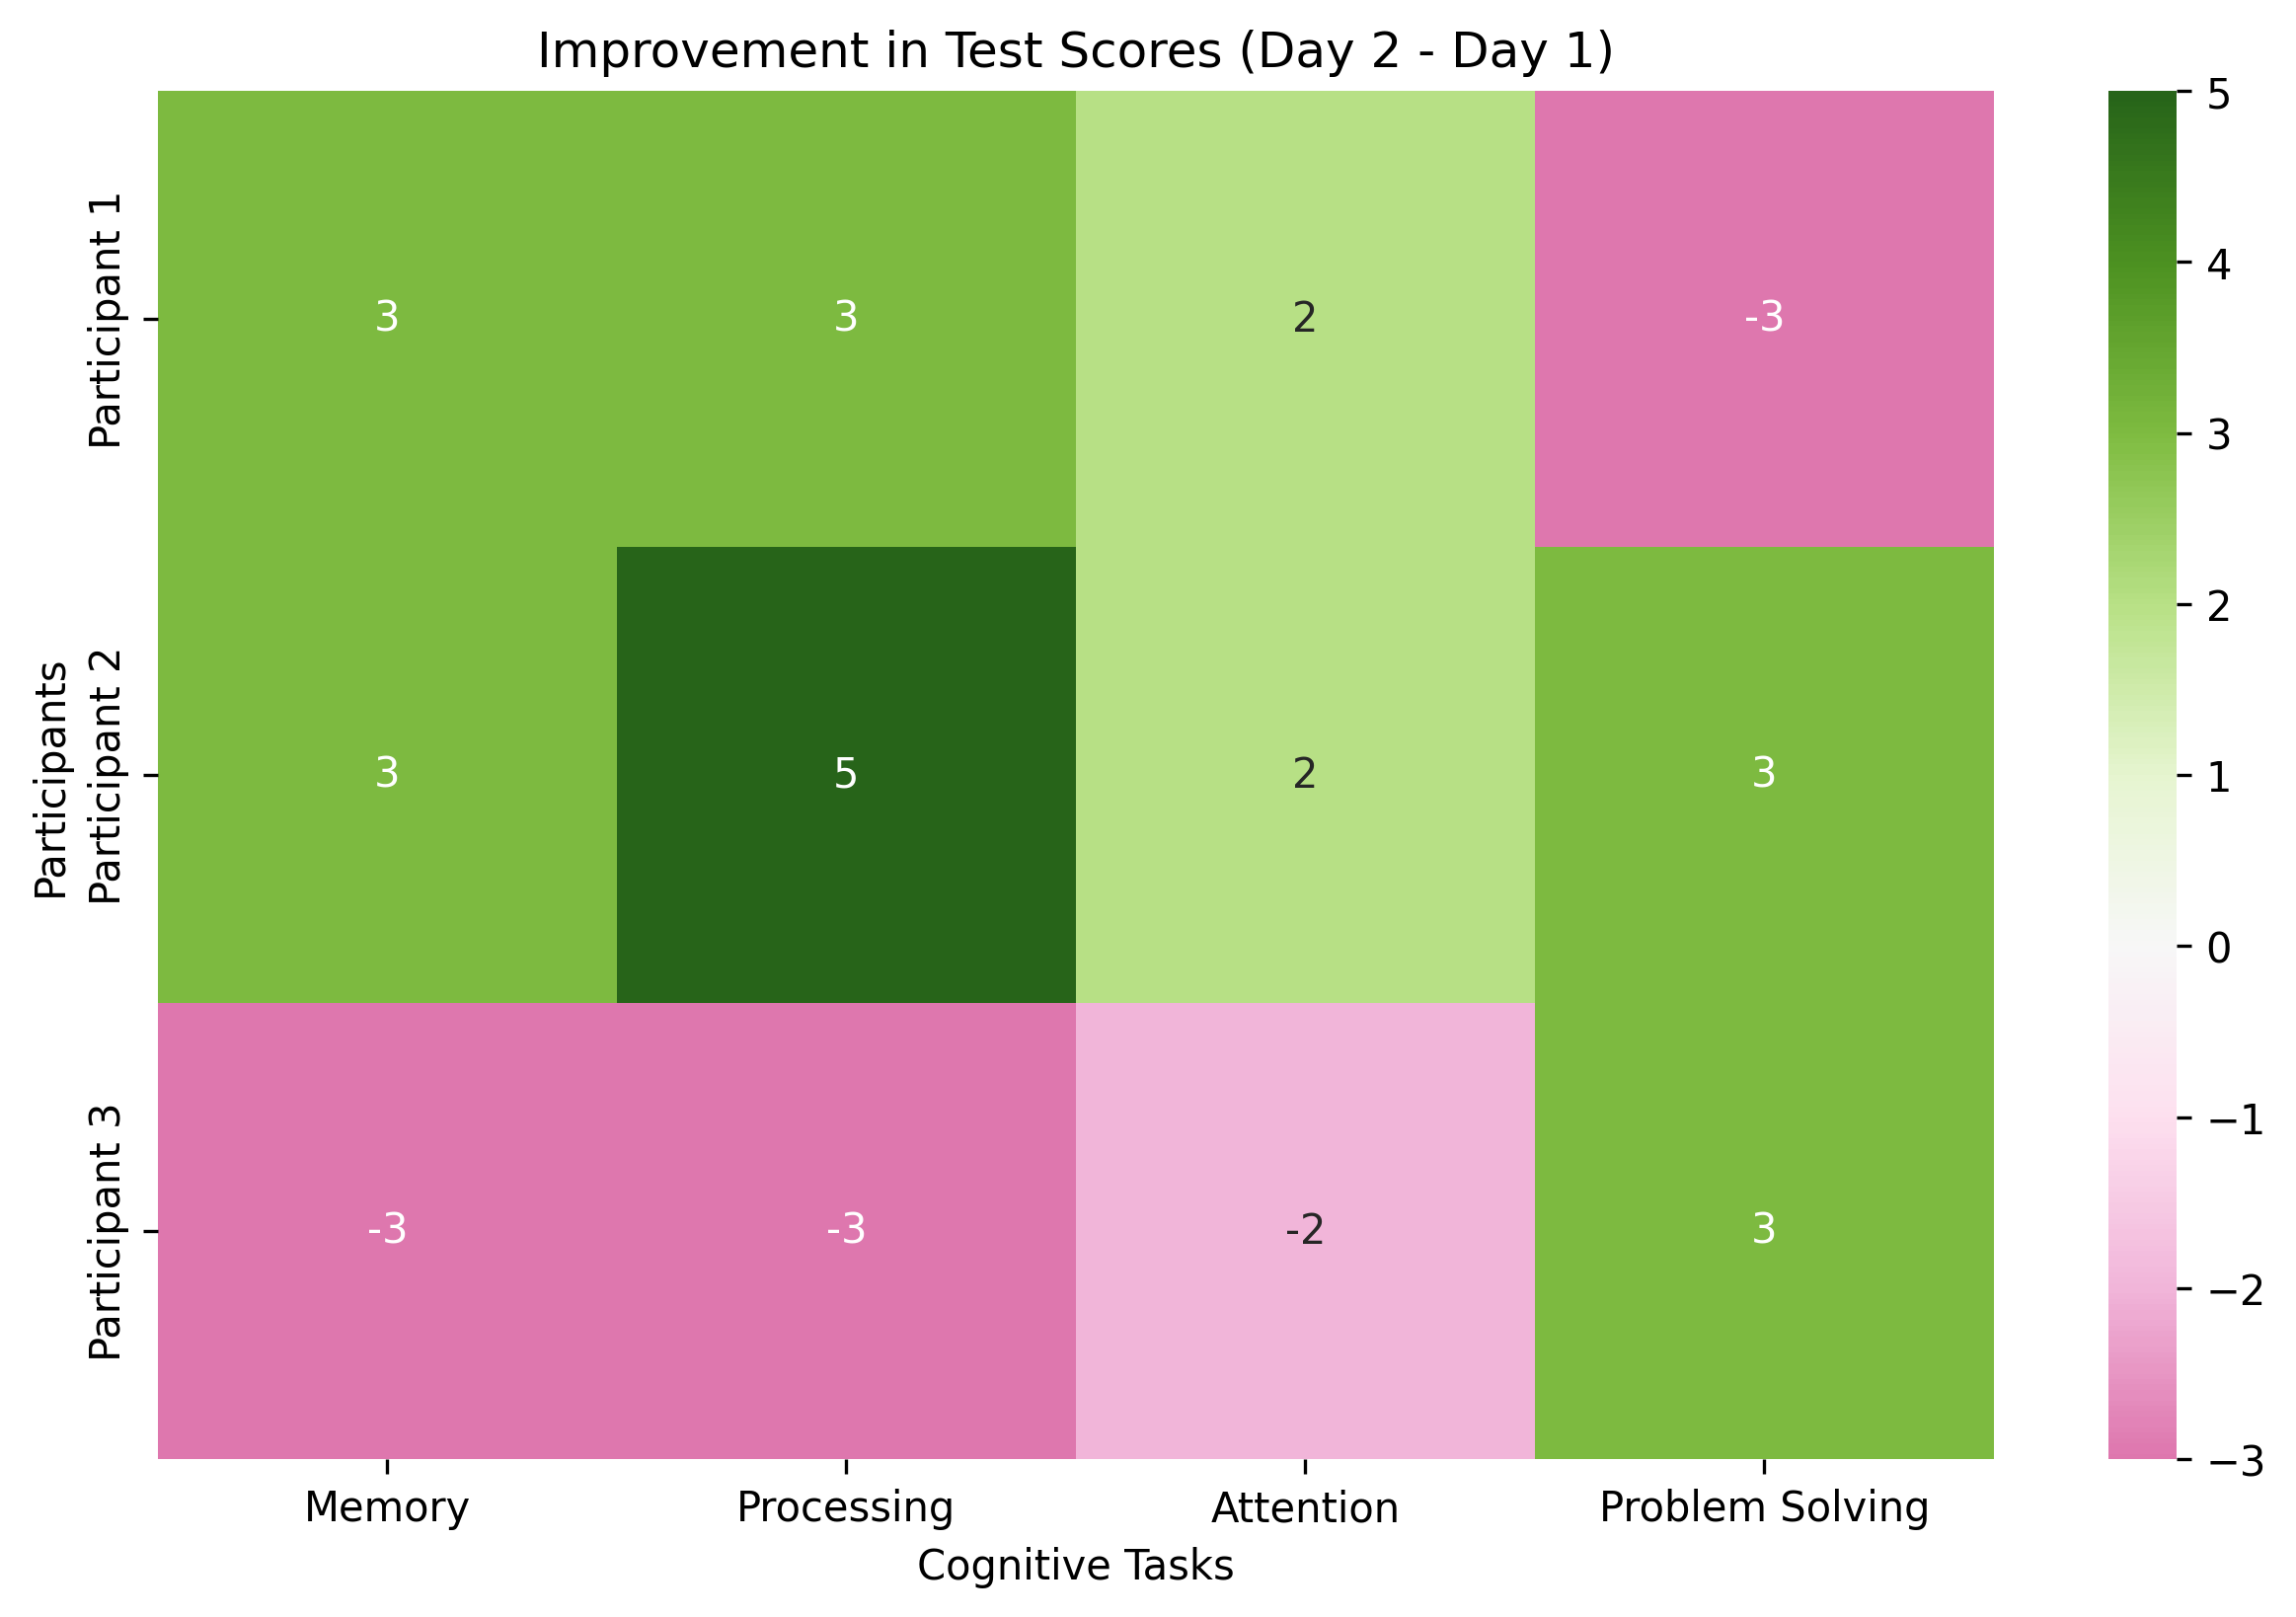

In [7]:
# Day 1 test scores (3 participants, 4 cognitive tasks)
day1_scores = np.array([
    [85, 92, 78, 88],  # Participant 1
    [72, 65, 70, 75],  # Participant 2
    [95, 88, 92, 90]   # Participant 3
])

# Day 2 test scores (same participants, same tasks)
day2_scores = np.array([
    [88, 95, 80, 85],  # Participant 1
    [75, 70, 72, 78],  # Participant 2
    [92, 85, 90, 93]   # Participant 3
])

# Calculate total scores across both days
total_scores = day1_scores + day2_scores

# Calculate improvement (day2 - day1)
improvement = day2_scores - day1_scores

print("Total scores (both days):")
print(total_scores)
print("\nImprovement from day 1 to day 2:")
print(improvement)

# Visualize the improvement
plt.figure(figsize=(10, 6))
task_names = ["Memory", "Processing", "Attention", "Problem Solving"]
participant_names = ["Participant 1", "Participant 2", "Participant 3"]

sns.heatmap(improvement, annot=True, cmap="PiYG", center=0,
            xticklabels=task_names,
            yticklabels=participant_names)
plt.title("Improvement in Test Scores (Day 2 - Day 1)")
plt.xlabel("Cognitive Tasks")
plt.ylabel("Participants")
plt.show()

### 2. Scalar Multiplication

We can multiply a matrix by a single number (a scalar). This multiplies every element in the matrix by that number.

For example, if we have:

$$A = \begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}$$

Then $2A = \begin{pmatrix}
2\times1 & 2\times2 \\
2\times3 & 2\times4
\end{pmatrix} = \begin{pmatrix}
2 & 4 \\
6 & 8
\end{pmatrix}$

In [8]:
# Scalar multiplication
A = np.array([[1, 2], [3, 4]])

# Multiply by 2
B = 2 * A

# Multiply by 0.5
C = 0.5 * A

print("Matrix A:")
print(A)
print("\n2 × A:")
print(B)
print("\n0.5 × A:")
print(C)

Matrix A:
[[1 2]
 [3 4]]

2 × A:
[[2 4]
 [6 8]]

0.5 × A:
[[0.5 1. ]
 [1.5 2. ]]


### Psychological Application: Weighting Test Scores

In psychological assessments, we often need to weight different components of a test. For example, you might decide that the attention task should count twice as much toward the final score as other tasks.

In [9]:
# Original test scores
test_scores = np.array([
    [85, 92, 78, 88],  # Participant 1
    [72, 65, 70, 75],  # Participant 2
    [95, 88, 92, 90]   # Participant 3
])

# Define weights for each task
# Let's say the third task (attention) should count twice as much
weights = np.array([1, 1, 2, 1])

# We need to multiply each column by its weight
# This is more complex - we'll see matrix multiplication soon
# For now, here's a manual approach
weighted_scores = np.zeros_like(test_scores)  # Create empty matrix of same size
for i in range(test_scores.shape[1]):  # For each column
    weighted_scores[:, i] = test_scores[:, i] * weights[i]

print("Original scores:")
print(test_scores)
print("\nWeighted scores (attention counted twice):")
print(weighted_scores)

# Calculate weighted average
weighted_avg = np.sum(weighted_scores, axis=1) / np.sum(weights)
print("\nWeighted average scores:")
for i, score in enumerate(weighted_avg):
    print(f"Participant {i+1}: {score:.2f}")

Original scores:
[[85 92 78 88]
 [72 65 70 75]
 [95 88 92 90]]

Weighted scores (attention counted twice):
[[ 85  92 156  88]
 [ 72  65 140  75]
 [ 95  88 184  90]]

Weighted average scores:
Participant 1: 84.20
Participant 2: 70.40
Participant 3: 91.40


### 3. Matrix Transposition

The transpose of a matrix flips it over its diagonal - rows become columns and columns become rows. We denote the transpose of matrix $A$ as $A^T$ or $A'$.

For example, if we have:

$$A = \begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix}$$

Then $A^T = \begin{pmatrix}
1 & 4 \\
2 & 5 \\
3 & 6
\end{pmatrix}$

In [10]:
# Matrix transposition
A = np.array([[1, 2, 3], [4, 5, 6]])

# Compute the transpose
A_transpose = A.T

print("Matrix A (2×3):")
print(A)
print("\nTranspose of A (3×2):")
print(A_transpose)

# Shape before and after
print(f"\nShape of A: {A.shape}")
print(f"Shape of A transpose: {A_transpose.shape}")

Matrix A (2×3):
[[1 2 3]
 [4 5 6]]

Transpose of A (3×2):
[[1 4]
 [2 5]
 [3 6]]

Shape of A: (2, 3)
Shape of A transpose: (3, 2)


### Psychological Application: Participants vs. Variables View

Transposition is incredibly useful in data analysis. It lets us switch between viewing our data as "participants by variables" or "variables by participants."

In [11]:
# Original data: participants × tasks
# Each row is a participant, each column is a task
participant_by_task = np.array([
    [85, 92, 78, 88],  # Participant 1
    [72, 65, 70, 75],  # Participant 2
    [95, 88, 92, 90]   # Participant 3
])

# Transpose to get: tasks × participants
# Each row is a task, each column is a participant
task_by_participant = participant_by_task.T

print("Original data (participants × tasks):")
print(participant_by_task)
print("\nTransposed data (tasks × participants):")
print(task_by_participant)

# This transposition is useful when we want to analyze the data differently
# For example, if we want to find the average score for each task:
task_averages = np.mean(task_by_participant, axis=1)
print("\nAverage score for each task:")
task_names = ["Memory", "Processing", "Attention", "Problem Solving"]
for i, task in enumerate(task_names):
    print(f"{task}: {task_averages[i]:.2f}")

# Or if we want to find the average score for each participant:
participant_averages = np.mean(participant_by_task, axis=1)
print("\nAverage score for each participant:")
for i, avg in enumerate(participant_averages):
    print(f"Participant {i+1}: {avg:.2f}")

Original data (participants × tasks):
[[85 92 78 88]
 [72 65 70 75]
 [95 88 92 90]]

Transposed data (tasks × participants):
[[85 72 95]
 [92 65 88]
 [78 70 92]
 [88 75 90]]

Average score for each task:
Memory: 84.00
Processing: 81.67
Attention: 80.00
Problem Solving: 84.33

Average score for each participant:
Participant 1: 85.75
Participant 2: 70.50
Participant 3: 91.25


### 4. Matrix Multiplication

Matrix multiplication is different from element-wise multiplication. It's a bit more complex, but incredibly powerful.

To multiply matrix $A$ (dimensions $m \times n$) by matrix $B$ (dimensions $n \times p$):
1. The number of columns in $A$ must equal the number of rows in $B$
2. The result will be a new matrix with dimensions $m \times p$

Each element $c_{ij}$ in the product matrix $C = AB$ is calculated as the dot product of row $i$ from $A$ and column $j$ from $B$:

$$c_{ij} = \sum_{k=1}^{n} a_{ik} b_{kj}$$

For example, if we have:

$$A = \begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix} \quad \text{and} \quad B = \begin{pmatrix}
5 & 6 \\
7 & 8
\end{pmatrix}$$

Then $AB = \begin{pmatrix}
(1 \times 5 + 2 \times 7) & (1 \times 6 + 2 \times 8) \\
(3 \times 5 + 4 \times 7) & (3 \times 6 + 4 \times 8)
\end{pmatrix} = \begin{pmatrix}
19 & 22 \\
43 & 50
\end{pmatrix}$

In [12]:
# Matrix multiplication
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Multiply A and B
C = np.dot(A, B)  # or simply A @ B in newer Python versions

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)
print("\nA × B:")
print(C)

# Note that matrix multiplication is not commutative (AB ≠ BA in general)
D = np.dot(B, A)  # B × A
print("\nB × A:")
print(D)
print("\nAs you can see, A × B ≠ B × A")

Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[5 6]
 [7 8]]

A × B:
[[19 22]
 [43 50]]

B × A:
[[23 34]
 [31 46]]

As you can see, A × B ≠ B × A


### Psychological Application: Weighted Test Scores (Revisited)

Now we can properly apply weights to our test scores using matrix multiplication. This is much more elegant than our earlier approach.

In [13]:
# Original test scores
test_scores = np.array([
    [85, 92, 78, 88],  # Participant 1
    [72, 65, 70, 75],  # Participant 2
    [95, 88, 92, 90]   # Participant 3
])

# Define a diagonal weight matrix
# We want to weight the tasks with [1, 1, 2, 1]
weight_matrix = np.diag([1, 1, 2, 1])

print("Test scores matrix (3×4):")
print(test_scores)
print("\nWeight matrix (4×4):")
print(weight_matrix)

# Apply weights using matrix multiplication
weighted_scores = test_scores @ weight_matrix  # or np.dot(test_scores, weight_matrix)

print("\nWeighted scores:")
print(weighted_scores)

# Calculate weighted total
weighted_total = np.sum(weighted_scores, axis=1)
print("\nWeighted total scores:")
for i, score in enumerate(weighted_total):
    print(f"Participant {i+1}: {score}")

Test scores matrix (3×4):
[[85 92 78 88]
 [72 65 70 75]
 [95 88 92 90]]

Weight matrix (4×4):
[[1 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 1]]

Weighted scores:
[[ 85  92 156  88]
 [ 72  65 140  75]
 [ 95  88 184  90]]

Weighted total scores:
Participant 1: 421
Participant 2: 352
Participant 3: 457


## Linear Transformations: How Matrices Change Vectors

One of the most powerful concepts in linear algebra is understanding matrices as transformations. When we multiply a matrix by a vector, we transform that vector in space.

Let's visualize this with a simple 2D example. A vector in 2D space can be transformed by a 2×2 matrix in various ways, including:
- Scaling (making it longer or shorter)
- Rotation (turning it around the origin)
- Reflection (flipping it across a line)
- Shearing (tilting it)

These transformations are fundamental to many statistical techniques used in psychology.

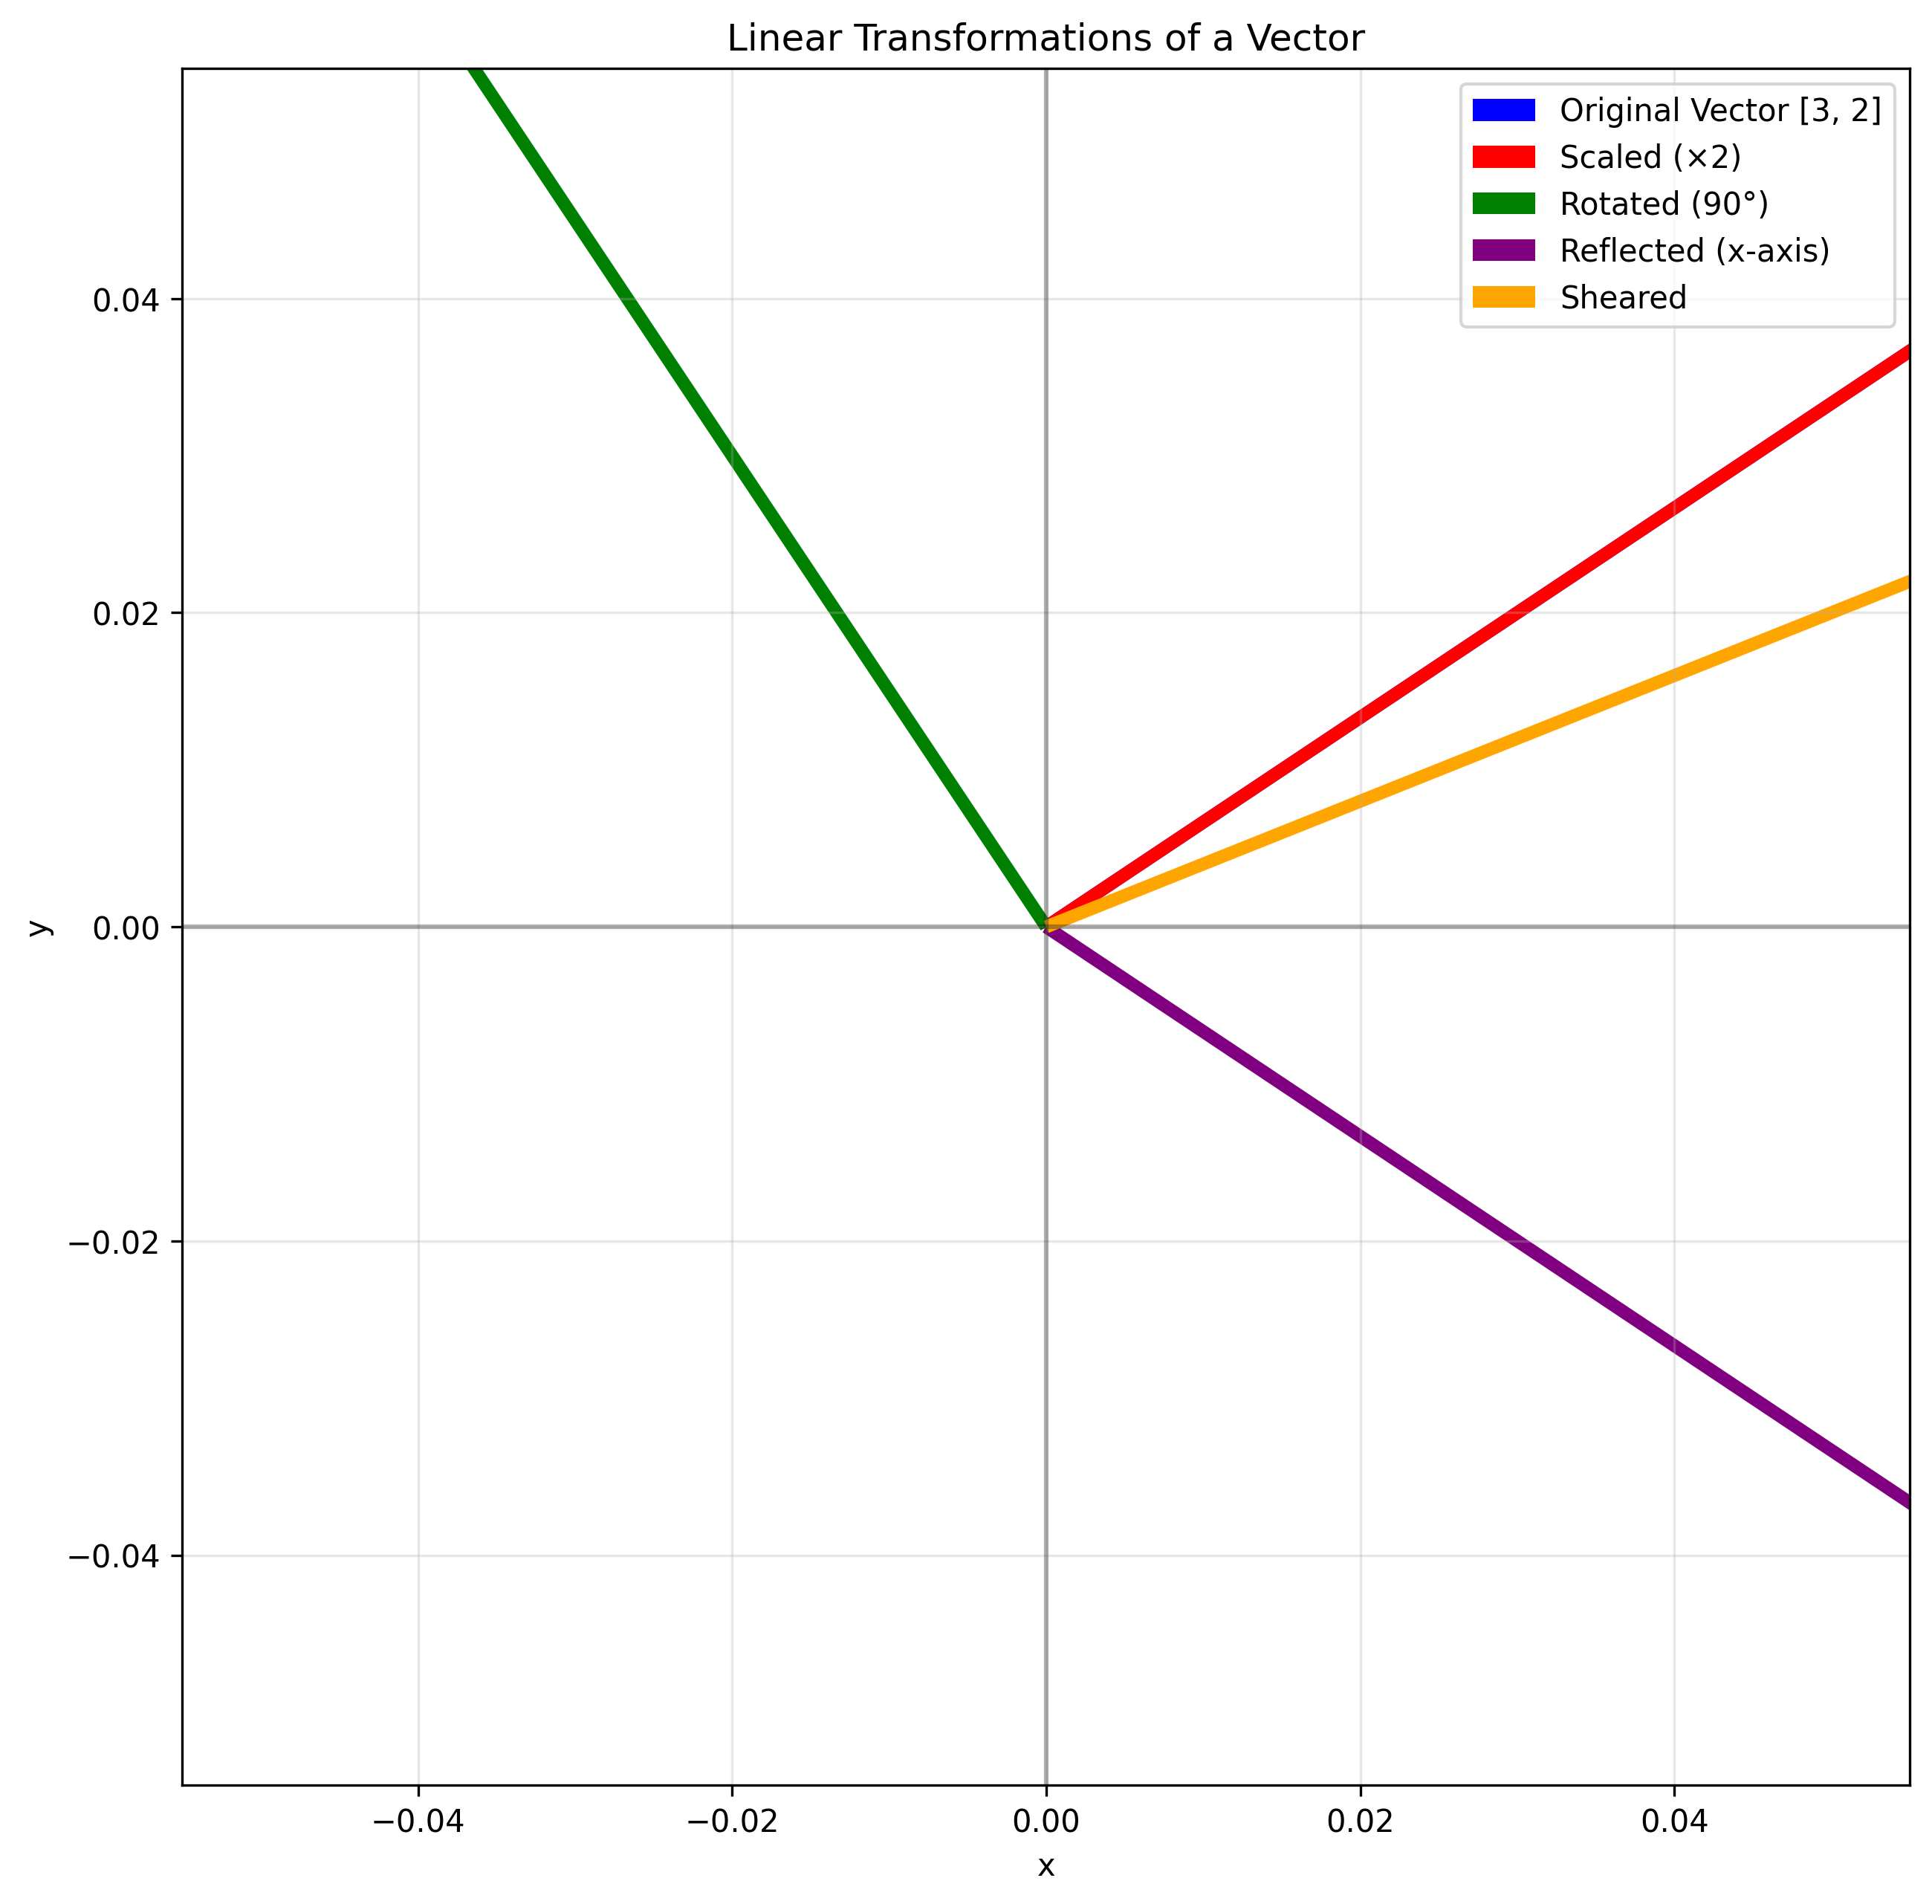

Original vector: [3 2]
Scaled vector: [6 4]
Rotated vector: [-2  3]
Reflected vector: [ 3 -2]
Sheared vector: [5 2]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple 2D vector
v = np.array([3, 2])

# Define different transformation matrices
scaling_matrix = np.array([[2, 0], [0, 2]])  # Scale by factor of 2
rotation_matrix = np.array([[0, -1], [1, 0]])  # 90-degree rotation
reflection_matrix = np.array([[1, 0], [0, -1]])  # Reflect across x-axis
shear_matrix = np.array([[1, 1], [0, 1]])  # Horizontal shear

# Apply transformations
v_scaled = scaling_matrix @ v
v_rotated = rotation_matrix @ v
v_reflected = reflection_matrix @ v
v_sheared = shear_matrix @ v

# Create a function to plot vectors
def plot_vector(vector, color, label):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)

# Create plot
plt.figure(figsize=(10, 10))
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(alpha=0.3)

# Plot original and transformed vectors
plot_vector(v, 'blue', 'Original Vector [3, 2]')
plot_vector(v_scaled, 'red', 'Scaled (×2)')
plot_vector(v_rotated, 'green', 'Rotated (90°)')
plot_vector(v_reflected, 'purple', 'Reflected (x-axis)')
plot_vector(v_sheared, 'orange', 'Sheared')

# Set plot limits and labels
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Transformations of a Vector')
plt.legend()
plt.axis('equal')  # Equal scaling
plt.show()

# Print the results
print(f"Original vector: {v}")
print(f"Scaled vector: {v_scaled}")
print(f"Rotated vector: {v_rotated}")
print(f"Reflected vector: {v_reflected}")
print(f"Sheared vector: {v_sheared}")

### Psychological Application: Factor Analysis

In psychology, we often use linear transformations when conducting factor analysis. Factor analysis is a technique used to identify latent factors that explain patterns of correlations among observed variables.

For example, responses to different anxiety questions might be explained by underlying factors like "physiological anxiety" and "cognitive anxiety."

Let's see a simplified version of how this works:

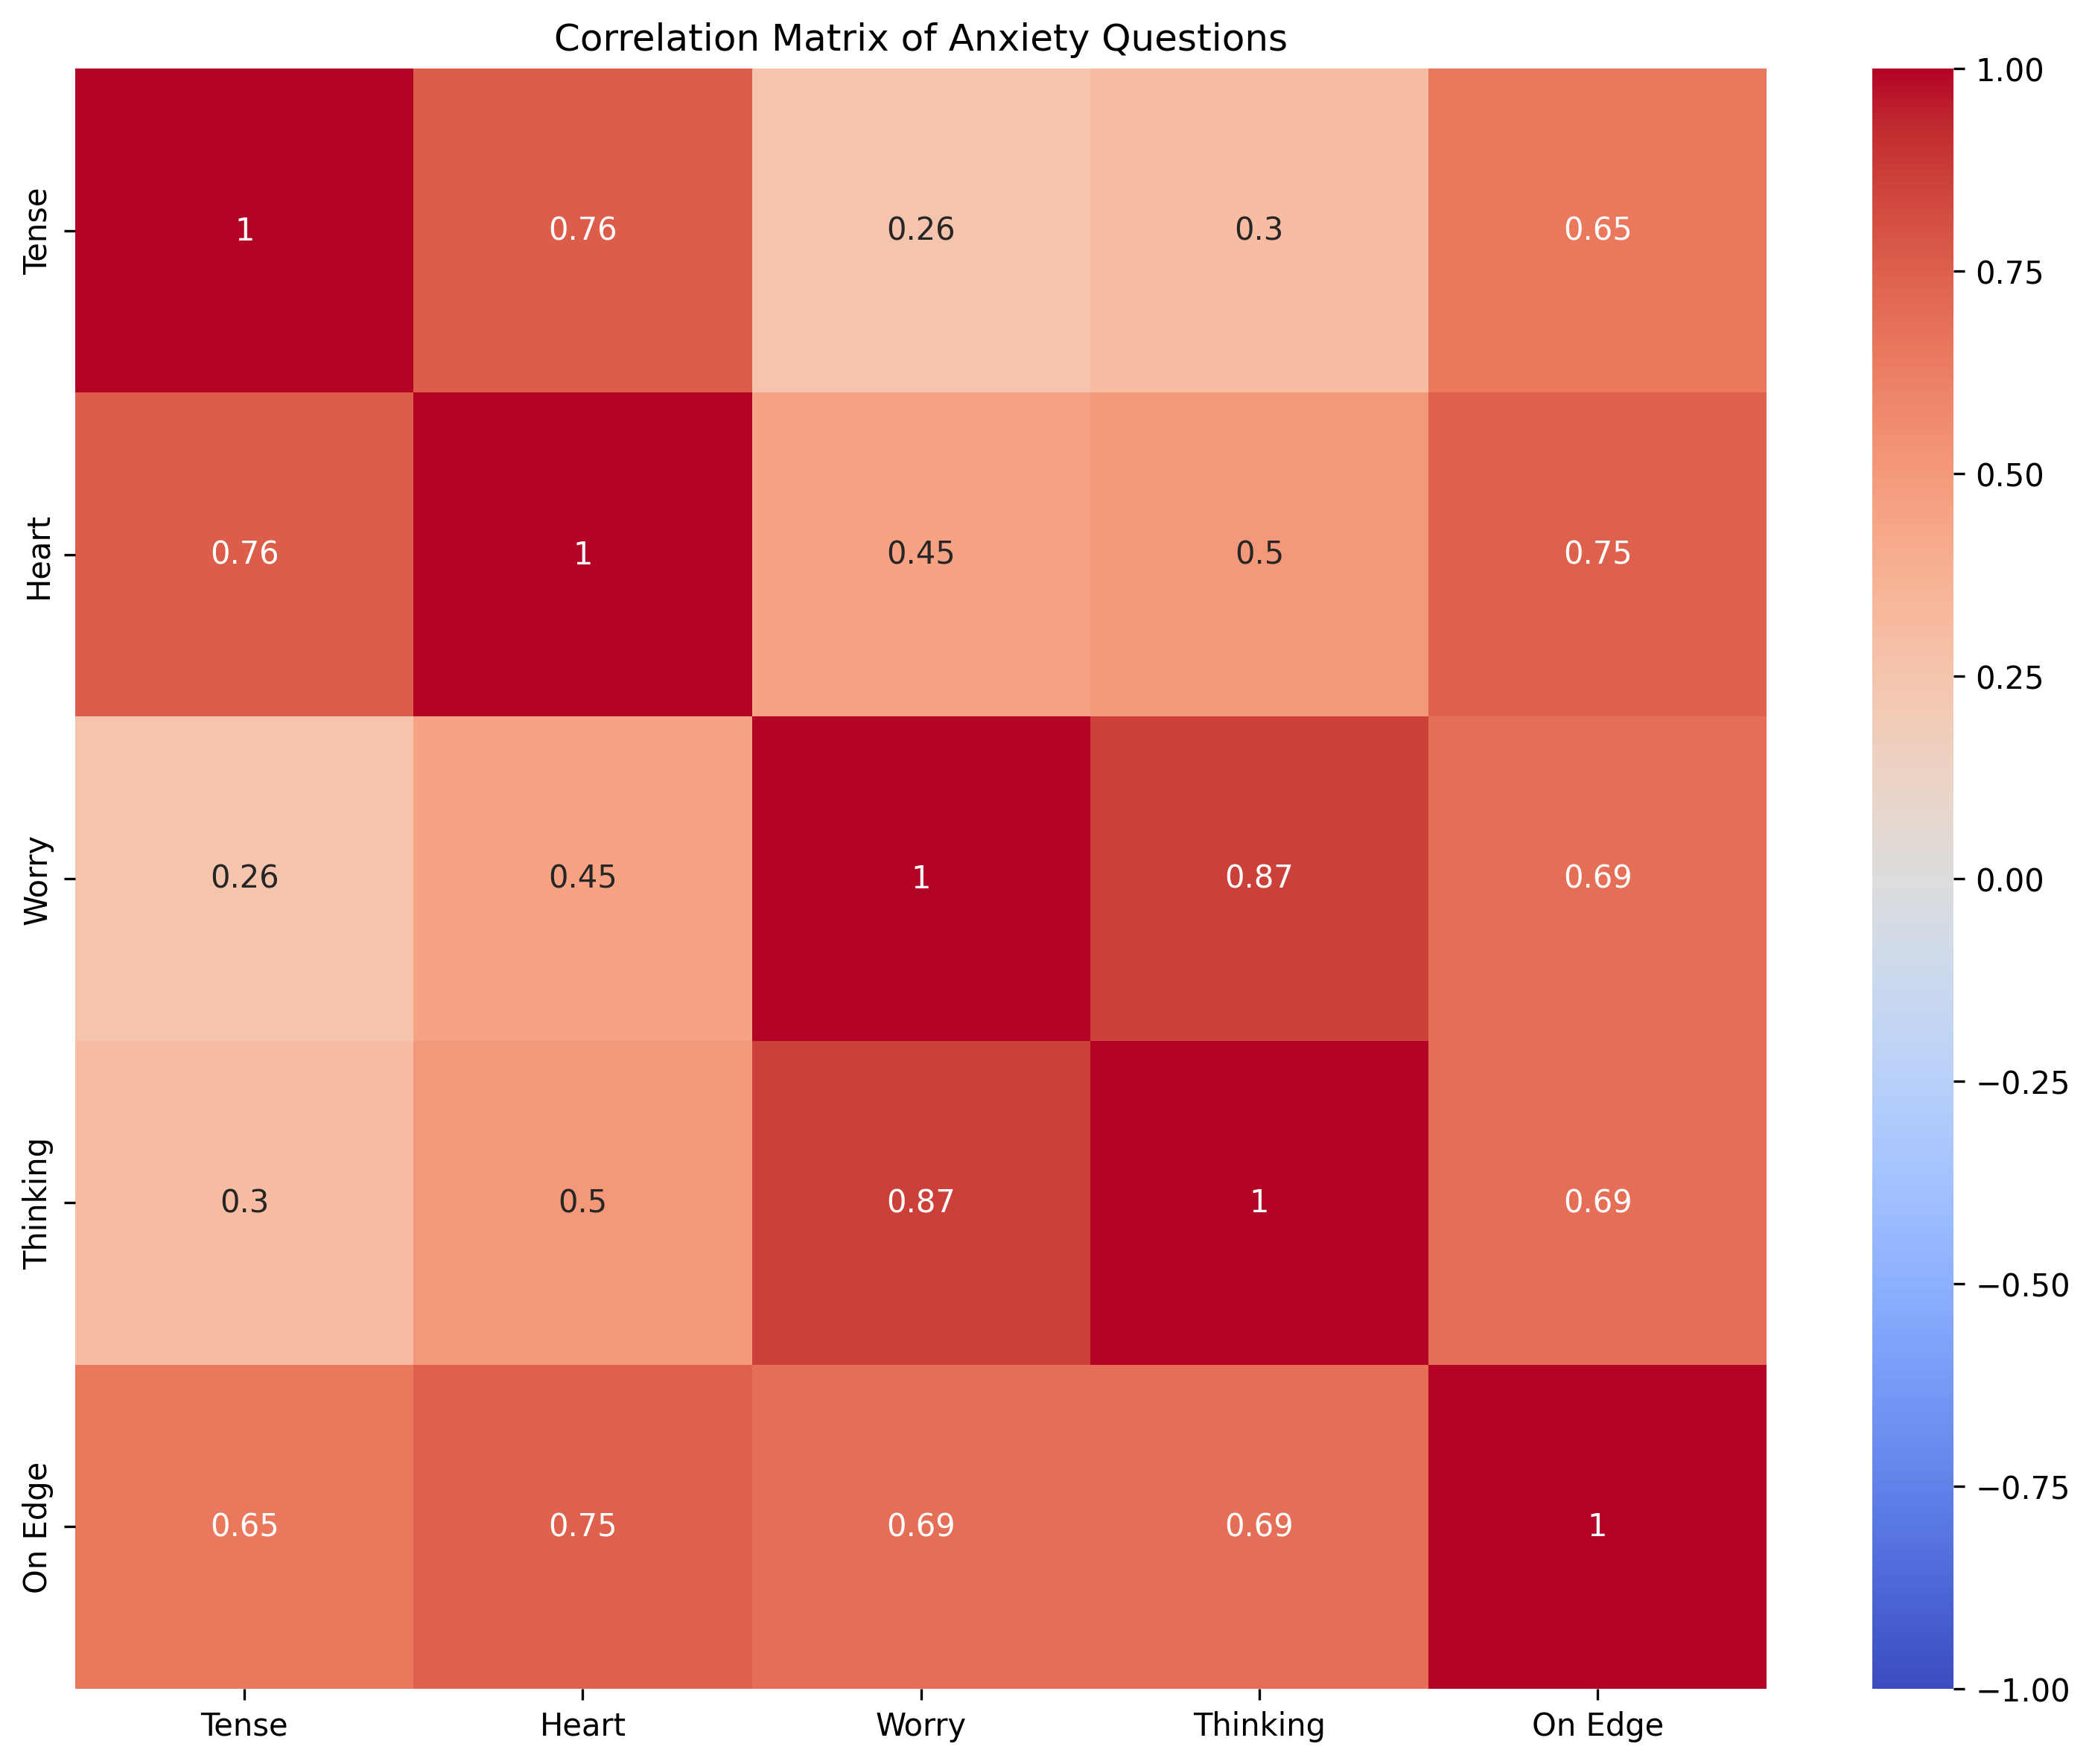

Original factor loadings:
[[0.8 0.2]
 [0.7 0.3]
 [0.2 0.7]
 [0.3 0.8]
 [0.5 0.5]]

Estimated factor loadings (absolute values):
[[0.36702103 0.65028037]
 [0.4059058  0.38895002]
 [0.42553148 0.41792731]
 [0.55069106 0.48918867]
 [0.46497135 0.1090162 ]]


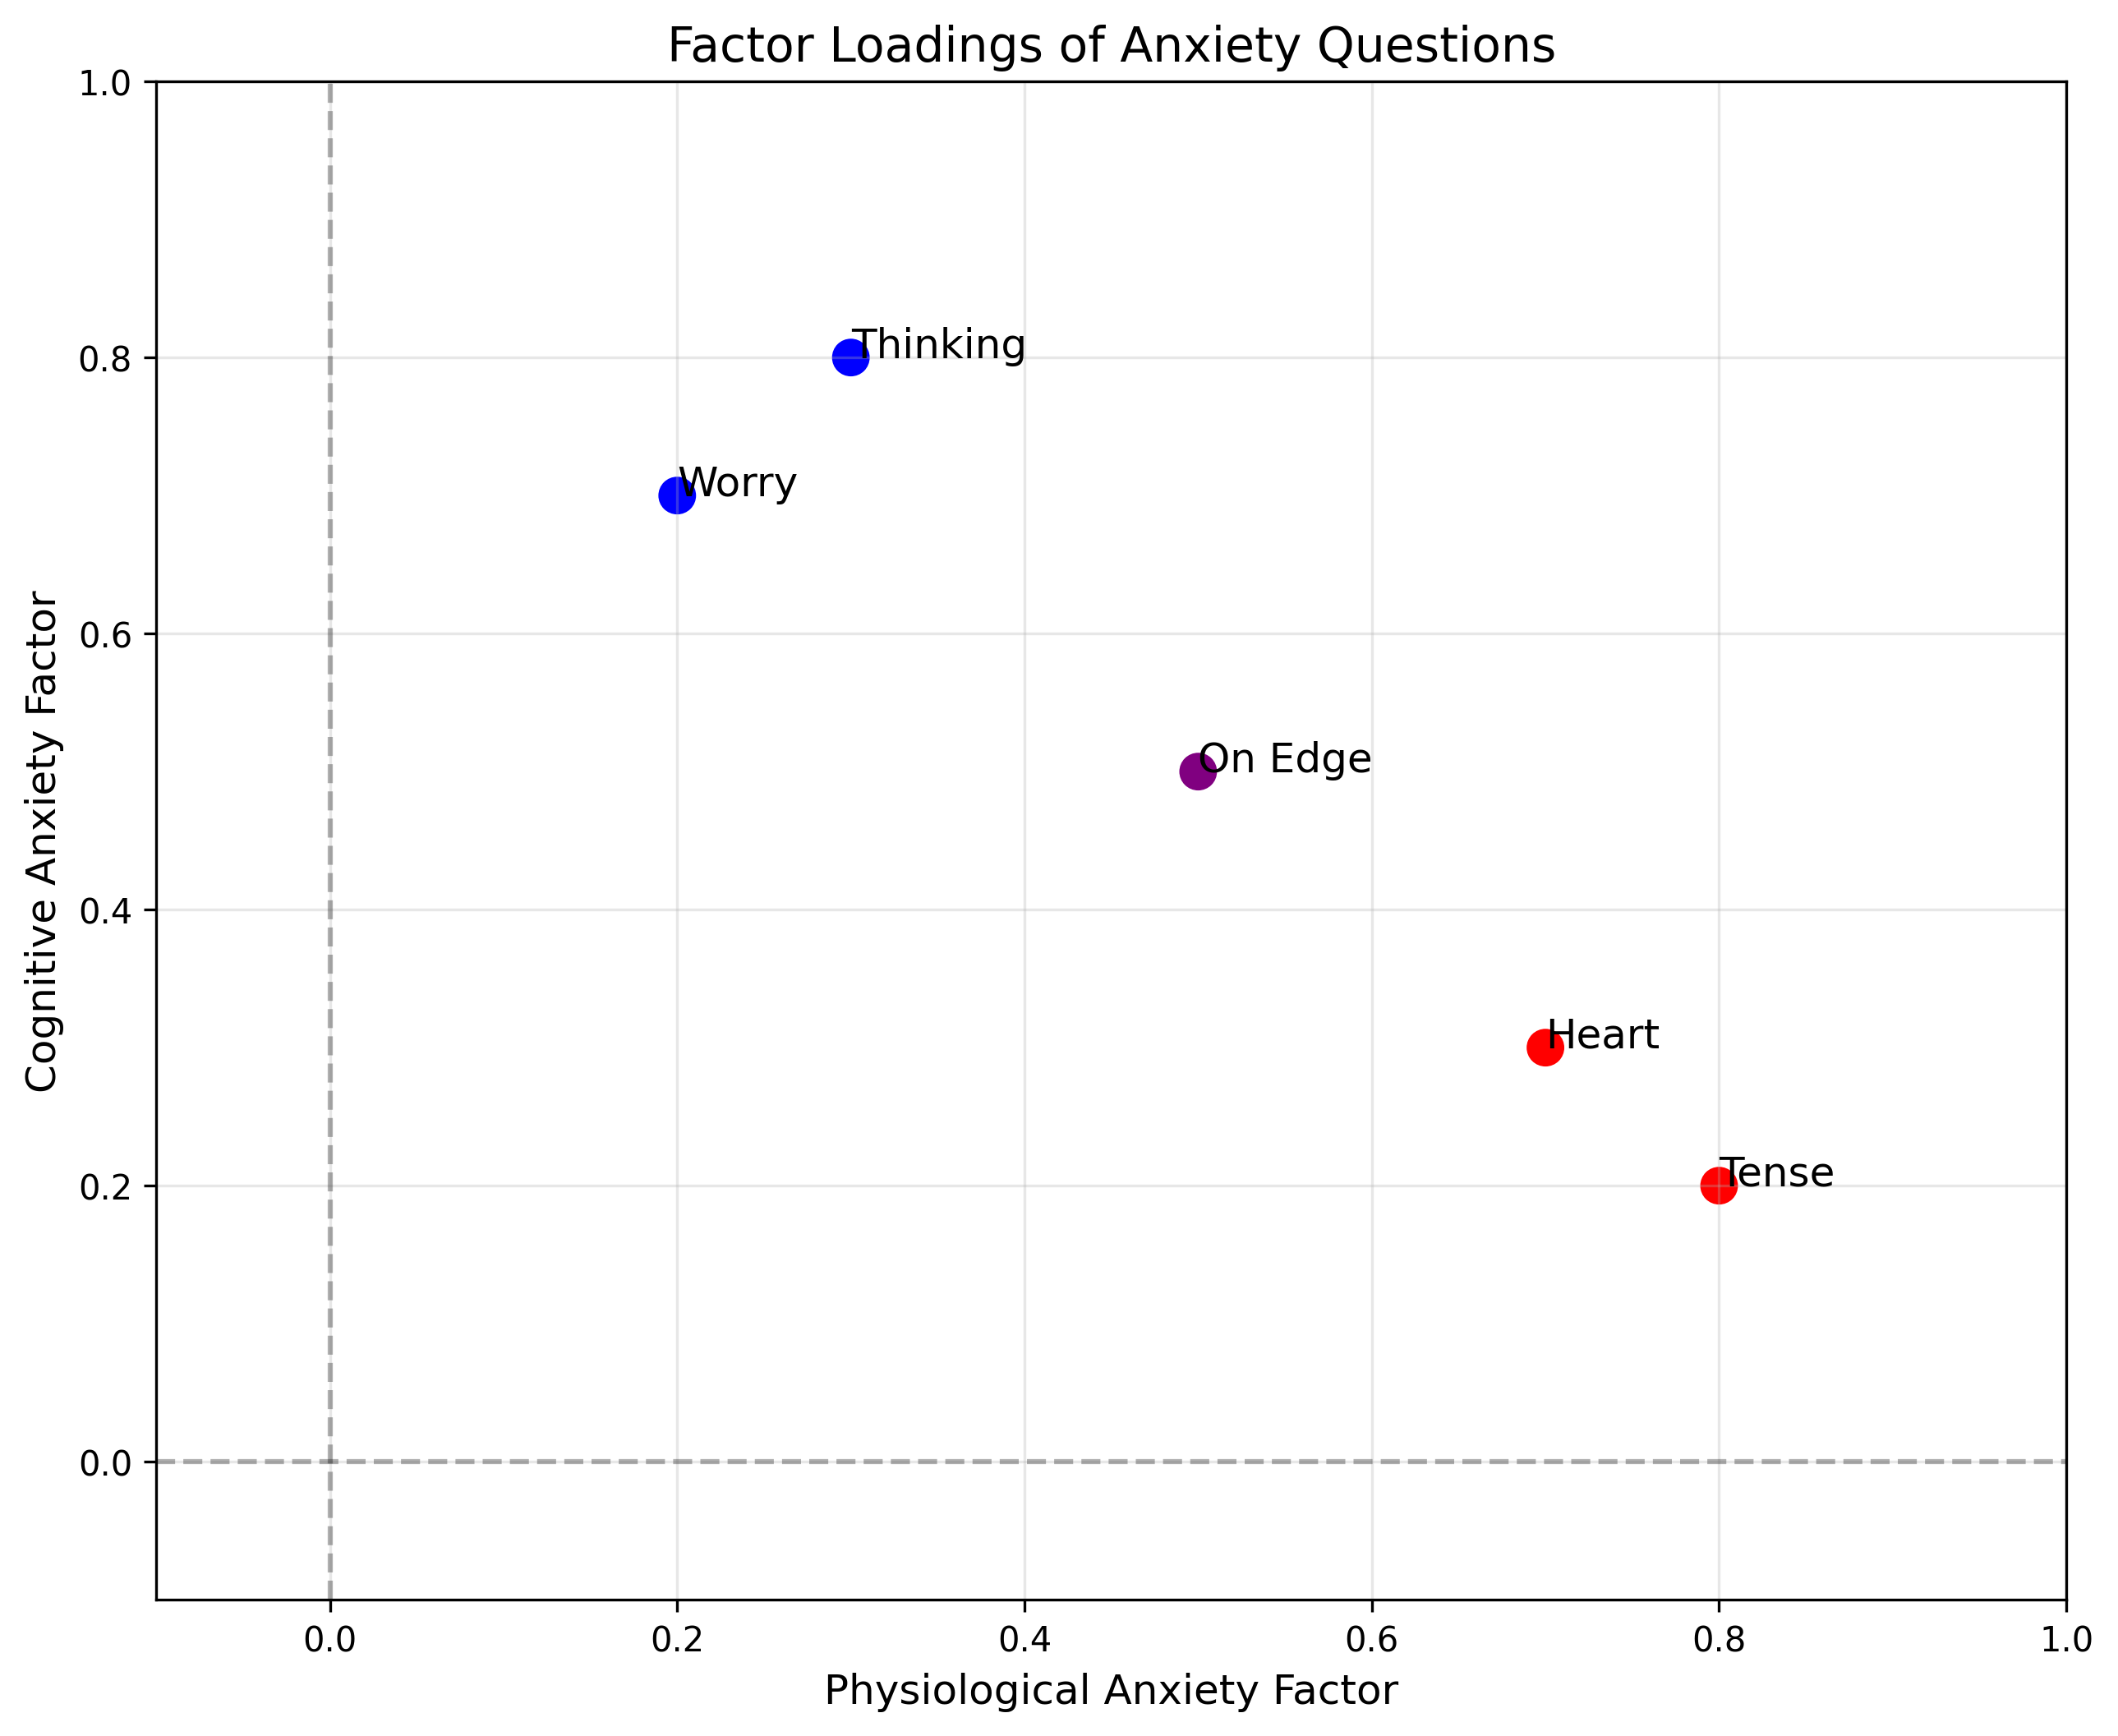

In [15]:
# Let's create simulated responses to 5 anxiety questions for 100 participants
np.random.seed(42)

# Create two latent factors (physiological anxiety and cognitive anxiety)
phys_anxiety = np.random.normal(0, 1, 100)
cogn_anxiety = np.random.normal(0, 1, 100)

# Create a "factor loading" matrix that determines how each question
# relates to the underlying factors
factor_loadings = np.array([
    [0.8, 0.2],  # Q1: "I feel physically tense" (mostly physiological)
    [0.7, 0.3],  # Q2: "My heart races" (mostly physiological)
    [0.2, 0.7],  # Q3: "I worry about the future" (mostly cognitive)
    [0.3, 0.8],  # Q4: "I can't stop thinking about problems" (mostly cognitive)
    [0.5, 0.5]   # Q5: "I feel on edge" (both physiological and cognitive)
])

# Create the data matrix by transforming the latent factors
# Shape will be (100 participants, 5 questions)
latent_factors = np.column_stack([phys_anxiety, cogn_anxiety])
questionnaire_data = latent_factors @ factor_loadings.T + np.random.normal(0, 0.3, (100, 5))

# Calculate the correlation matrix of the questionnaire data
corr_matrix = np.corrcoef(questionnaire_data, rowvar=False)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1,
           xticklabels=["Tense", "Heart", "Worry", "Thinking", "On Edge"],
           yticklabels=["Tense", "Heart", "Worry", "Thinking", "On Edge"])
plt.title("Correlation Matrix of Anxiety Questions")
plt.tight_layout()
plt.show()

# Now let's perform a simple factor analysis (using PCA for simplicity)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(questionnaire_data)

# Extract the factor loadings (we take transpose to match our convention)
estimated_loadings = pca.components_.T

# Compare original vs. discovered factor loadings
print("Original factor loadings:")
print(factor_loadings)
print("\nEstimated factor loadings (absolute values):")
print(np.abs(estimated_loadings))

# Plot the factor loadings
plt.figure(figsize=(10, 8))
plt.scatter(factor_loadings[:, 0], factor_loadings[:, 1], s=100, 
            c=['red', 'red', 'blue', 'blue', 'purple'])
for i, txt in enumerate(["Tense", "Heart", "Worry", "Thinking", "On Edge"]):
    plt.annotate(txt, (factor_loadings[i, 0], factor_loadings[i, 1]), fontsize=12)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.xlabel('Physiological Anxiety Factor', fontsize=12)
plt.ylabel('Cognitive Anxiety Factor', fontsize=12)
plt.title('Factor Loadings of Anxiety Questions', fontsize=14)
plt.grid(alpha=0.3)
plt.xlim(-0.1, 1)
plt.ylim(-0.1, 1)
plt.show()

## Matrix Inverses

Just as we can divide by a number to undo multiplication, we can find the inverse of a matrix to "undo" matrix multiplication. The inverse of matrix $A$ is denoted as $A^{-1}$, and it satisfies:

$$A A^{-1} = A^{-1} A = I$$

Where $I$ is the identity matrix. Not all matrices have inverses; those that do are called "invertible" or "non-singular".

Let's see how to find and use a matrix inverse:

In [16]:
# Create a square matrix
A = np.array([[4, 7], [2, 6]])

# Calculate its inverse
A_inv = np.linalg.inv(A)

print("Matrix A:")
print(A)
print("\nInverse of A:")
print(A_inv)

# Verify that A * A^-1 = I
I_check = A @ A_inv
print("\nA × A^-1 (should be identity matrix):")
print(np.round(I_check, 10))  # Round to avoid floating-point errors

# Not all matrices have inverses
# For example, this matrix is singular (non-invertible)
B = np.array([[1, 2], [2, 4]])  # Note: second row is 2 times the first row
print("\nSingular matrix B:")
print(B)

try:
    B_inv = np.linalg.inv(B)
    print(B_inv)
except np.linalg.LinAlgError as e:
    print(f"Error: {e}")

Matrix A:
[[4 7]
 [2 6]]

Inverse of A:
[[ 0.6 -0.7]
 [-0.2  0.4]]

A × A^-1 (should be identity matrix):
[[ 1. -0.]
 [ 0.  1.]]

Singular matrix B:
[[1 2]
 [2 4]]
Error: Singular matrix


### Psychological Application: Solving Equations

Matrix inverses are essential for solving systems of equations. In psychology, we might need to solve systems when estimating parameters in statistical models.

Let's say we have a simple model of how memory performance ($M$) and attention ($A$) predict test scores ($T$):

$$T = \beta_M \cdot M + \beta_A \cdot A$$

We want to find the coefficients $\beta_M$ and $\beta_A$ using data from three participants:

In [17]:
# Data for three participants
# Memory (M), Attention (A), and Test Score (T)
memory = np.array([85, 70, 95])
attention = np.array([90, 80, 75])
test_scores = np.array([88, 74, 89])

# We want to solve for β_M and β_A in the equation:
# T = β_M * M + β_A * A

# Set up the matrix equation: X β = T
X = np.column_stack([memory, attention])
print("Design matrix X:")
print(X)

# Ideally, we'd solve this using the least squares method
# But for simplicity with just 3 data points, we can use the Moore-Penrose pseudo-inverse
X_inv = np.linalg.pinv(X)

# Calculate β = X⁺ T
beta = X_inv @ test_scores

print("\nEstimated coefficients:")
print(f"β_Memory = {beta[0]:.4f}")
print(f"β_Attention = {beta[1]:.4f}")

# Calculate predicted values
predicted_scores = X @ beta

print("\nActual vs. Predicted Test Scores:")
for i in range(len(test_scores)):
    print(f"Participant {i+1}: Actual = {test_scores[i]}, Predicted = {predicted_scores[i]:.2f}")

Design matrix X:
[[85 90]
 [70 80]
 [95 75]]

Estimated coefficients:
β_Memory = 0.6614
β_Attention = 0.3498

Actual vs. Predicted Test Scores:
Participant 1: Actual = 88, Predicted = 87.70
Participant 2: Actual = 74, Predicted = 74.28
Participant 3: Actual = 89, Predicted = 89.06


## Eigenvalues and Eigenvectors

Eigenvalues and eigenvectors are some of the most important concepts in linear algebra, especially for psychology. They help us understand the underlying structure of data and transformations.

An eigenvector of a matrix $A$ is a non-zero vector $v$ that, when multiplied by $A$, results in a scalar multiple of itself:

$$Av = \lambda v$$

The scalar $\lambda$ is called the eigenvalue corresponding to the eigenvector $v$.

In simpler terms: an eigenvector is a direction that doesn't change when transformed by the matrix (though it might stretch or shrink). The eigenvalue tells us how much stretching or shrinking occurs.

Matrix A:
[[3 1]
 [1 3]]

Eigenvalues:
[4. 2.]

Eigenvectors (as columns):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Eigenvector 1 verification:
A × v_1 = [2.82842712 2.82842712]
λ_1 × v_1 = [2.82842712 2.82842712]
Are they equal? True

Eigenvector 2 verification:
A × v_2 = [-1.41421356  1.41421356]
λ_2 × v_2 = [-1.41421356  1.41421356]
Are they equal? True


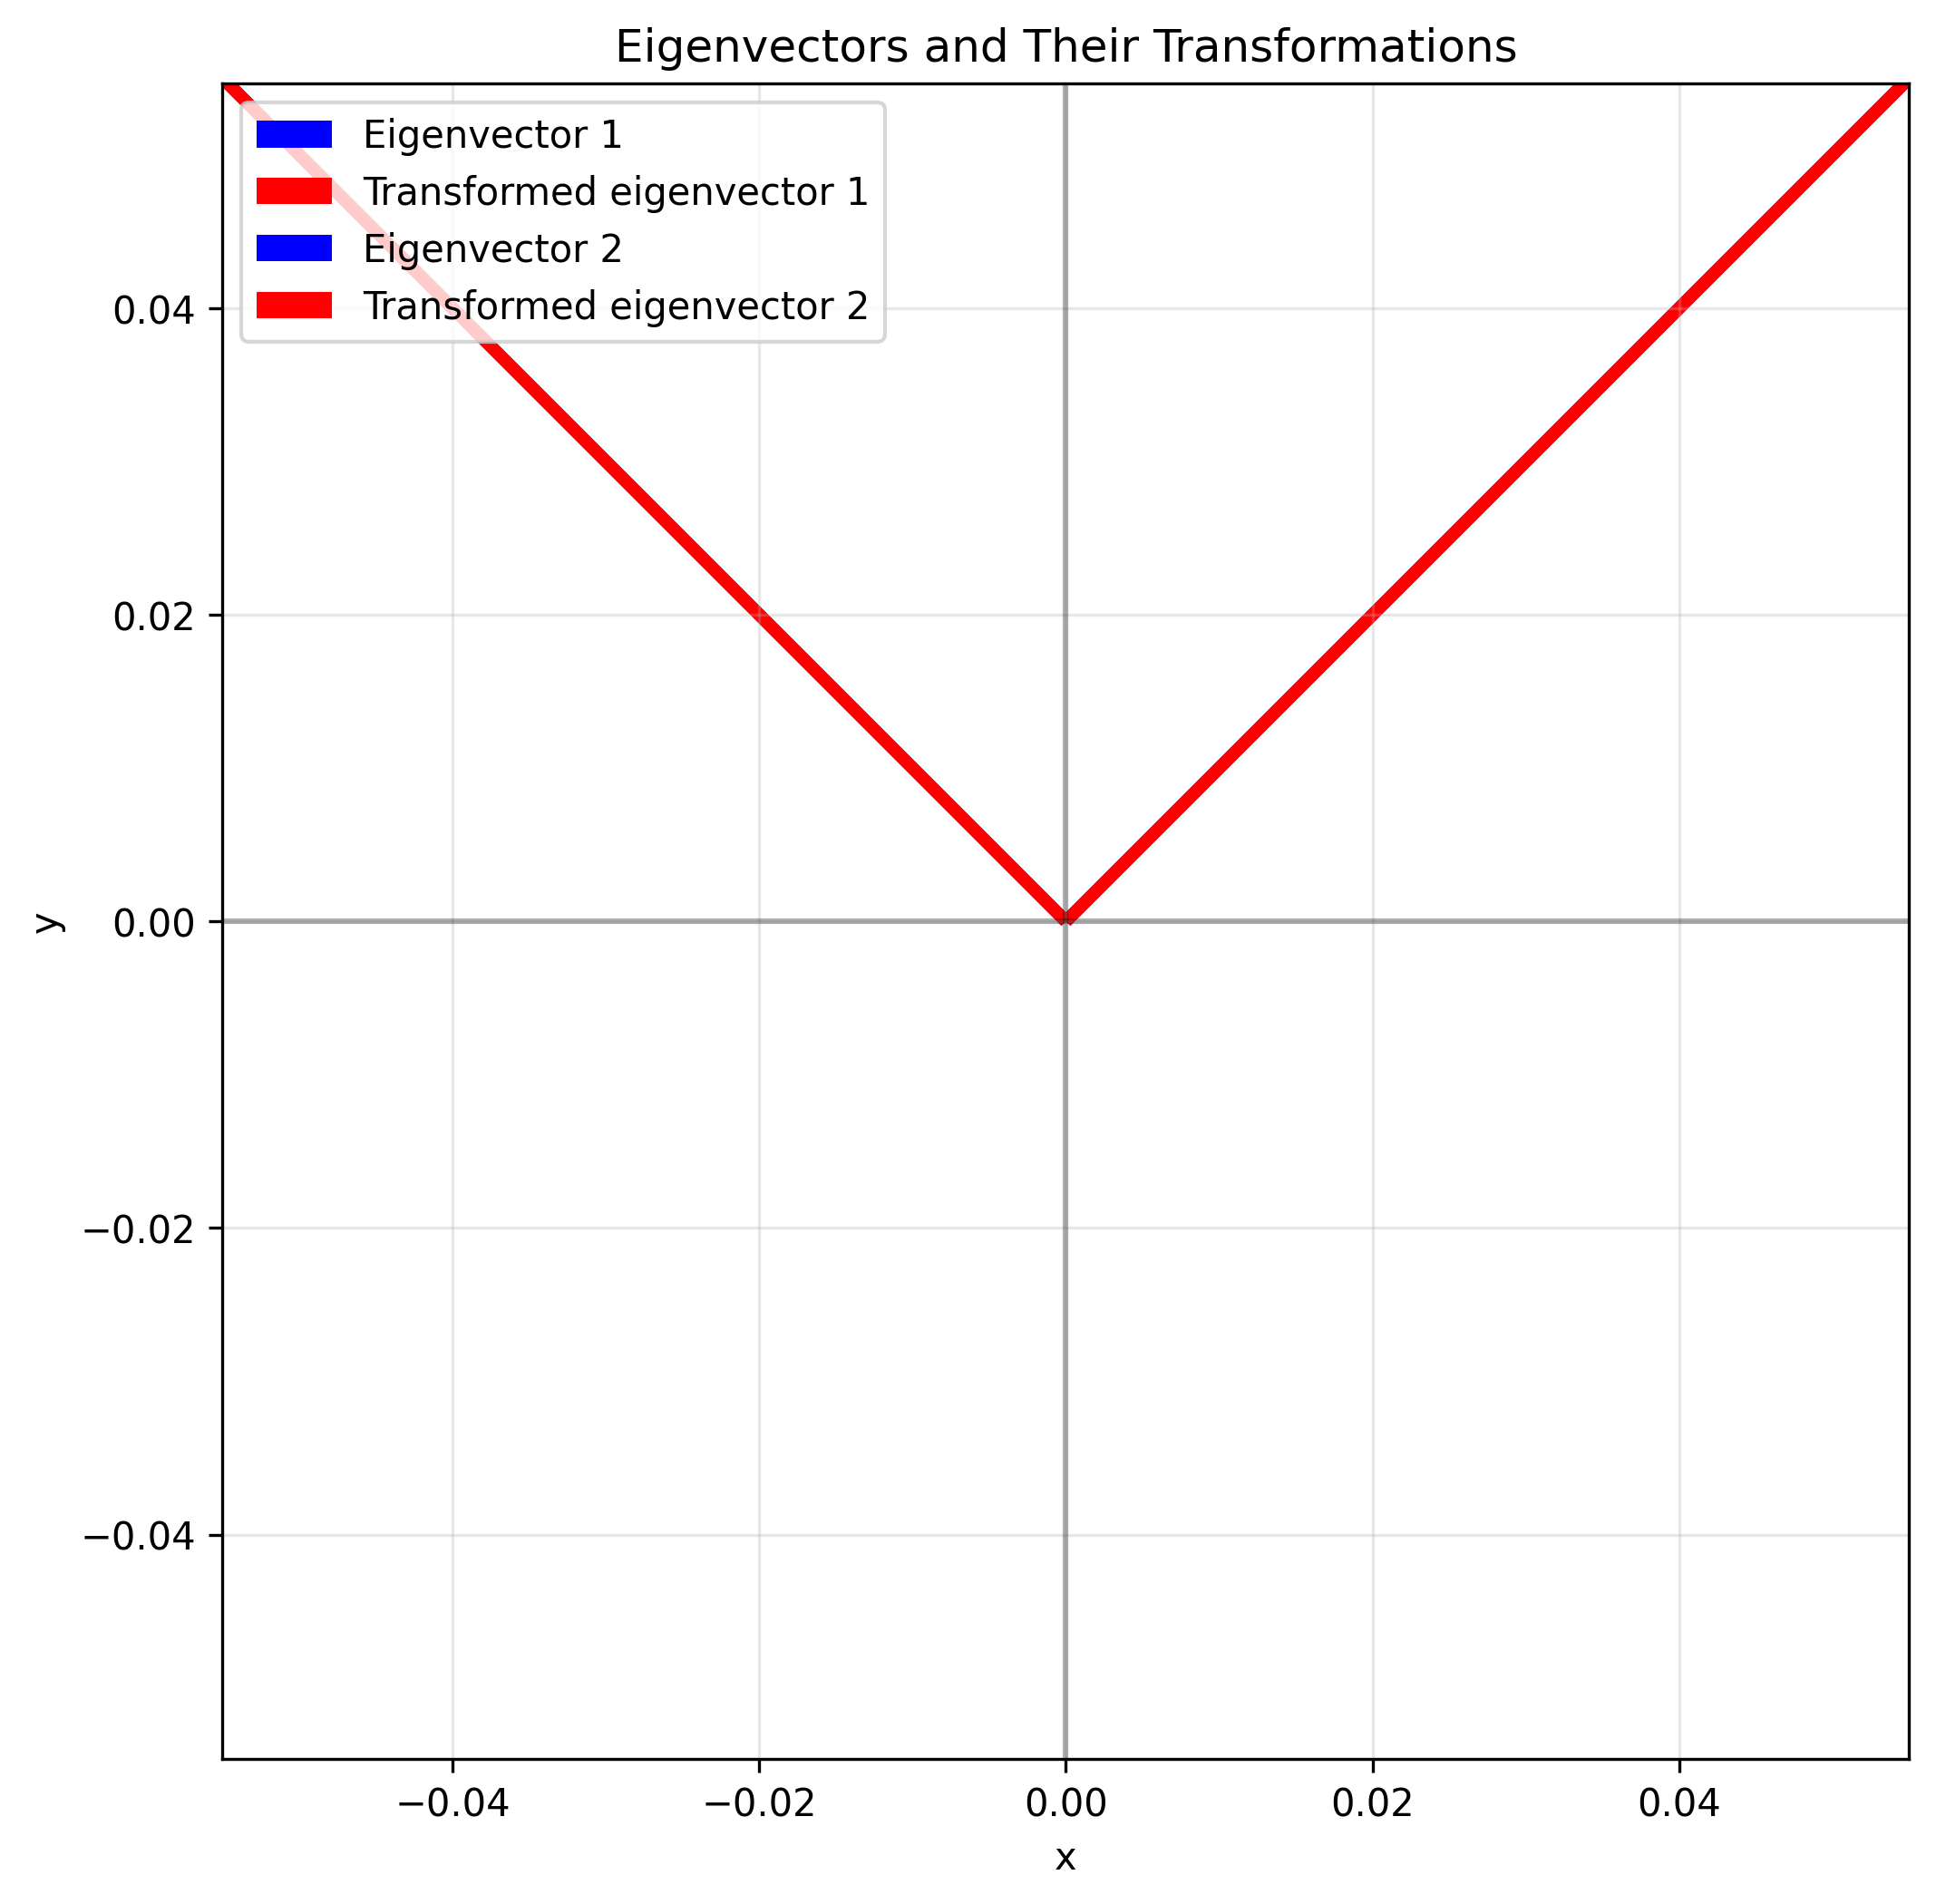

In [18]:
# Create a 2×2 matrix
A = np.array([[3, 1], [1, 3]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Matrix A:")
print(A)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors (as columns):")
print(eigenvectors)

# Verify that Av = λv for each eigenvector
for i in range(len(eigenvalues)):
    lambda_i = eigenvalues[i]
    v_i = eigenvectors[:, i]
    
    left_side = A @ v_i
    right_side = lambda_i * v_i
    
    print(f"\nEigenvector {i+1} verification:")
    print(f"A × v_{i+1} = {left_side}")
    print(f"λ_{i+1} × v_{i+1} = {right_side}")
    print(f"Are they equal? {np.allclose(left_side, right_side)}")

# Visualize eigenvectors
plt.figure(figsize=(8, 8))
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(alpha=0.3)

# Original eigenvectors
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', 
               scale=1, color='blue', label=f'Eigenvector {i+1}')
    
    # Transformed eigenvectors
    transformed = A @ v
    plt.quiver(0, 0, transformed[0], transformed[1], angles='xy', 
               scale_units='xy', scale=1, color='red', 
               label=f'Transformed eigenvector {i+1}')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Eigenvectors and Their Transformations')
plt.legend()
plt.axis('equal')
plt.show()

### Psychological Application: Principal Component Analysis (PCA)

One of the most important applications of eigenvalues and eigenvectors in psychology is Principal Component Analysis (PCA), a technique for dimensionality reduction and finding patterns in data.

PCA finds the principal components (eigenvectors) of the covariance matrix of the data. These components represent the directions of maximum variance in the data.

Covariance matrix:
[[0.82476989 0.63618508]
 [0.63618508 0.52642277]]

Eigenvalues:
[1.32903661 0.02215605]

Eigenvectors (as columns):
[[ 0.78367388 -0.62117248]
 [ 0.62117248  0.78367388]]


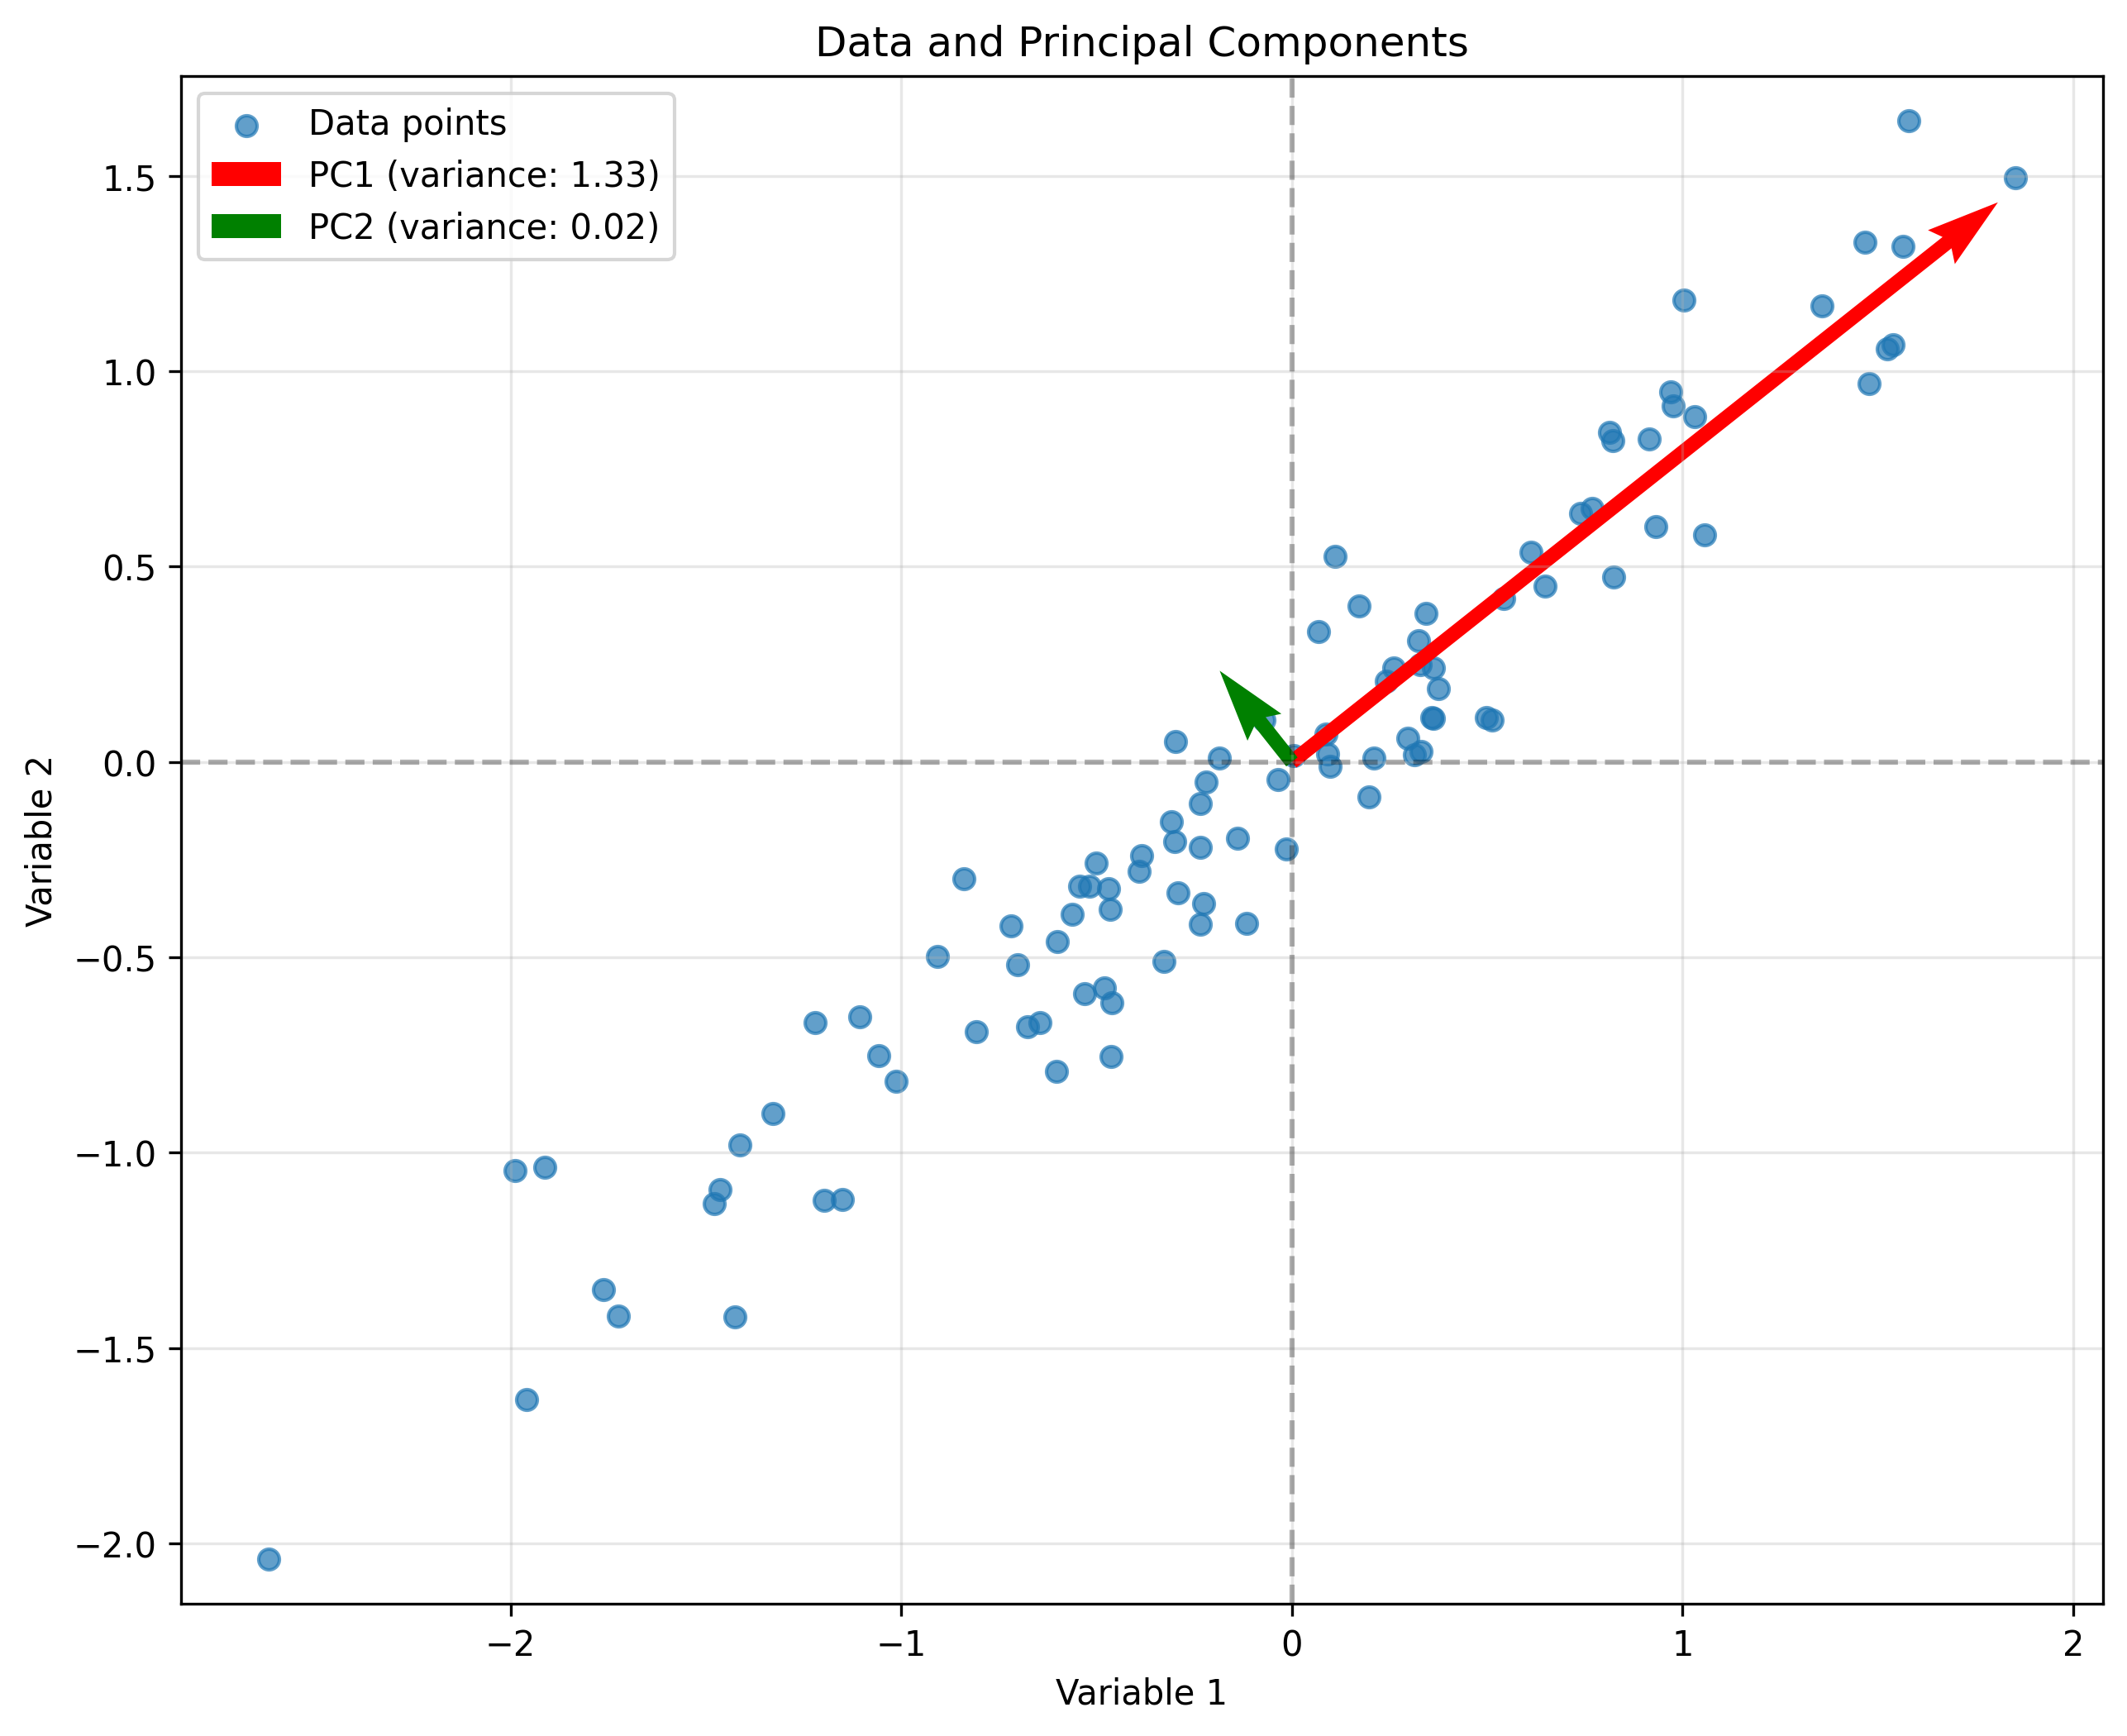

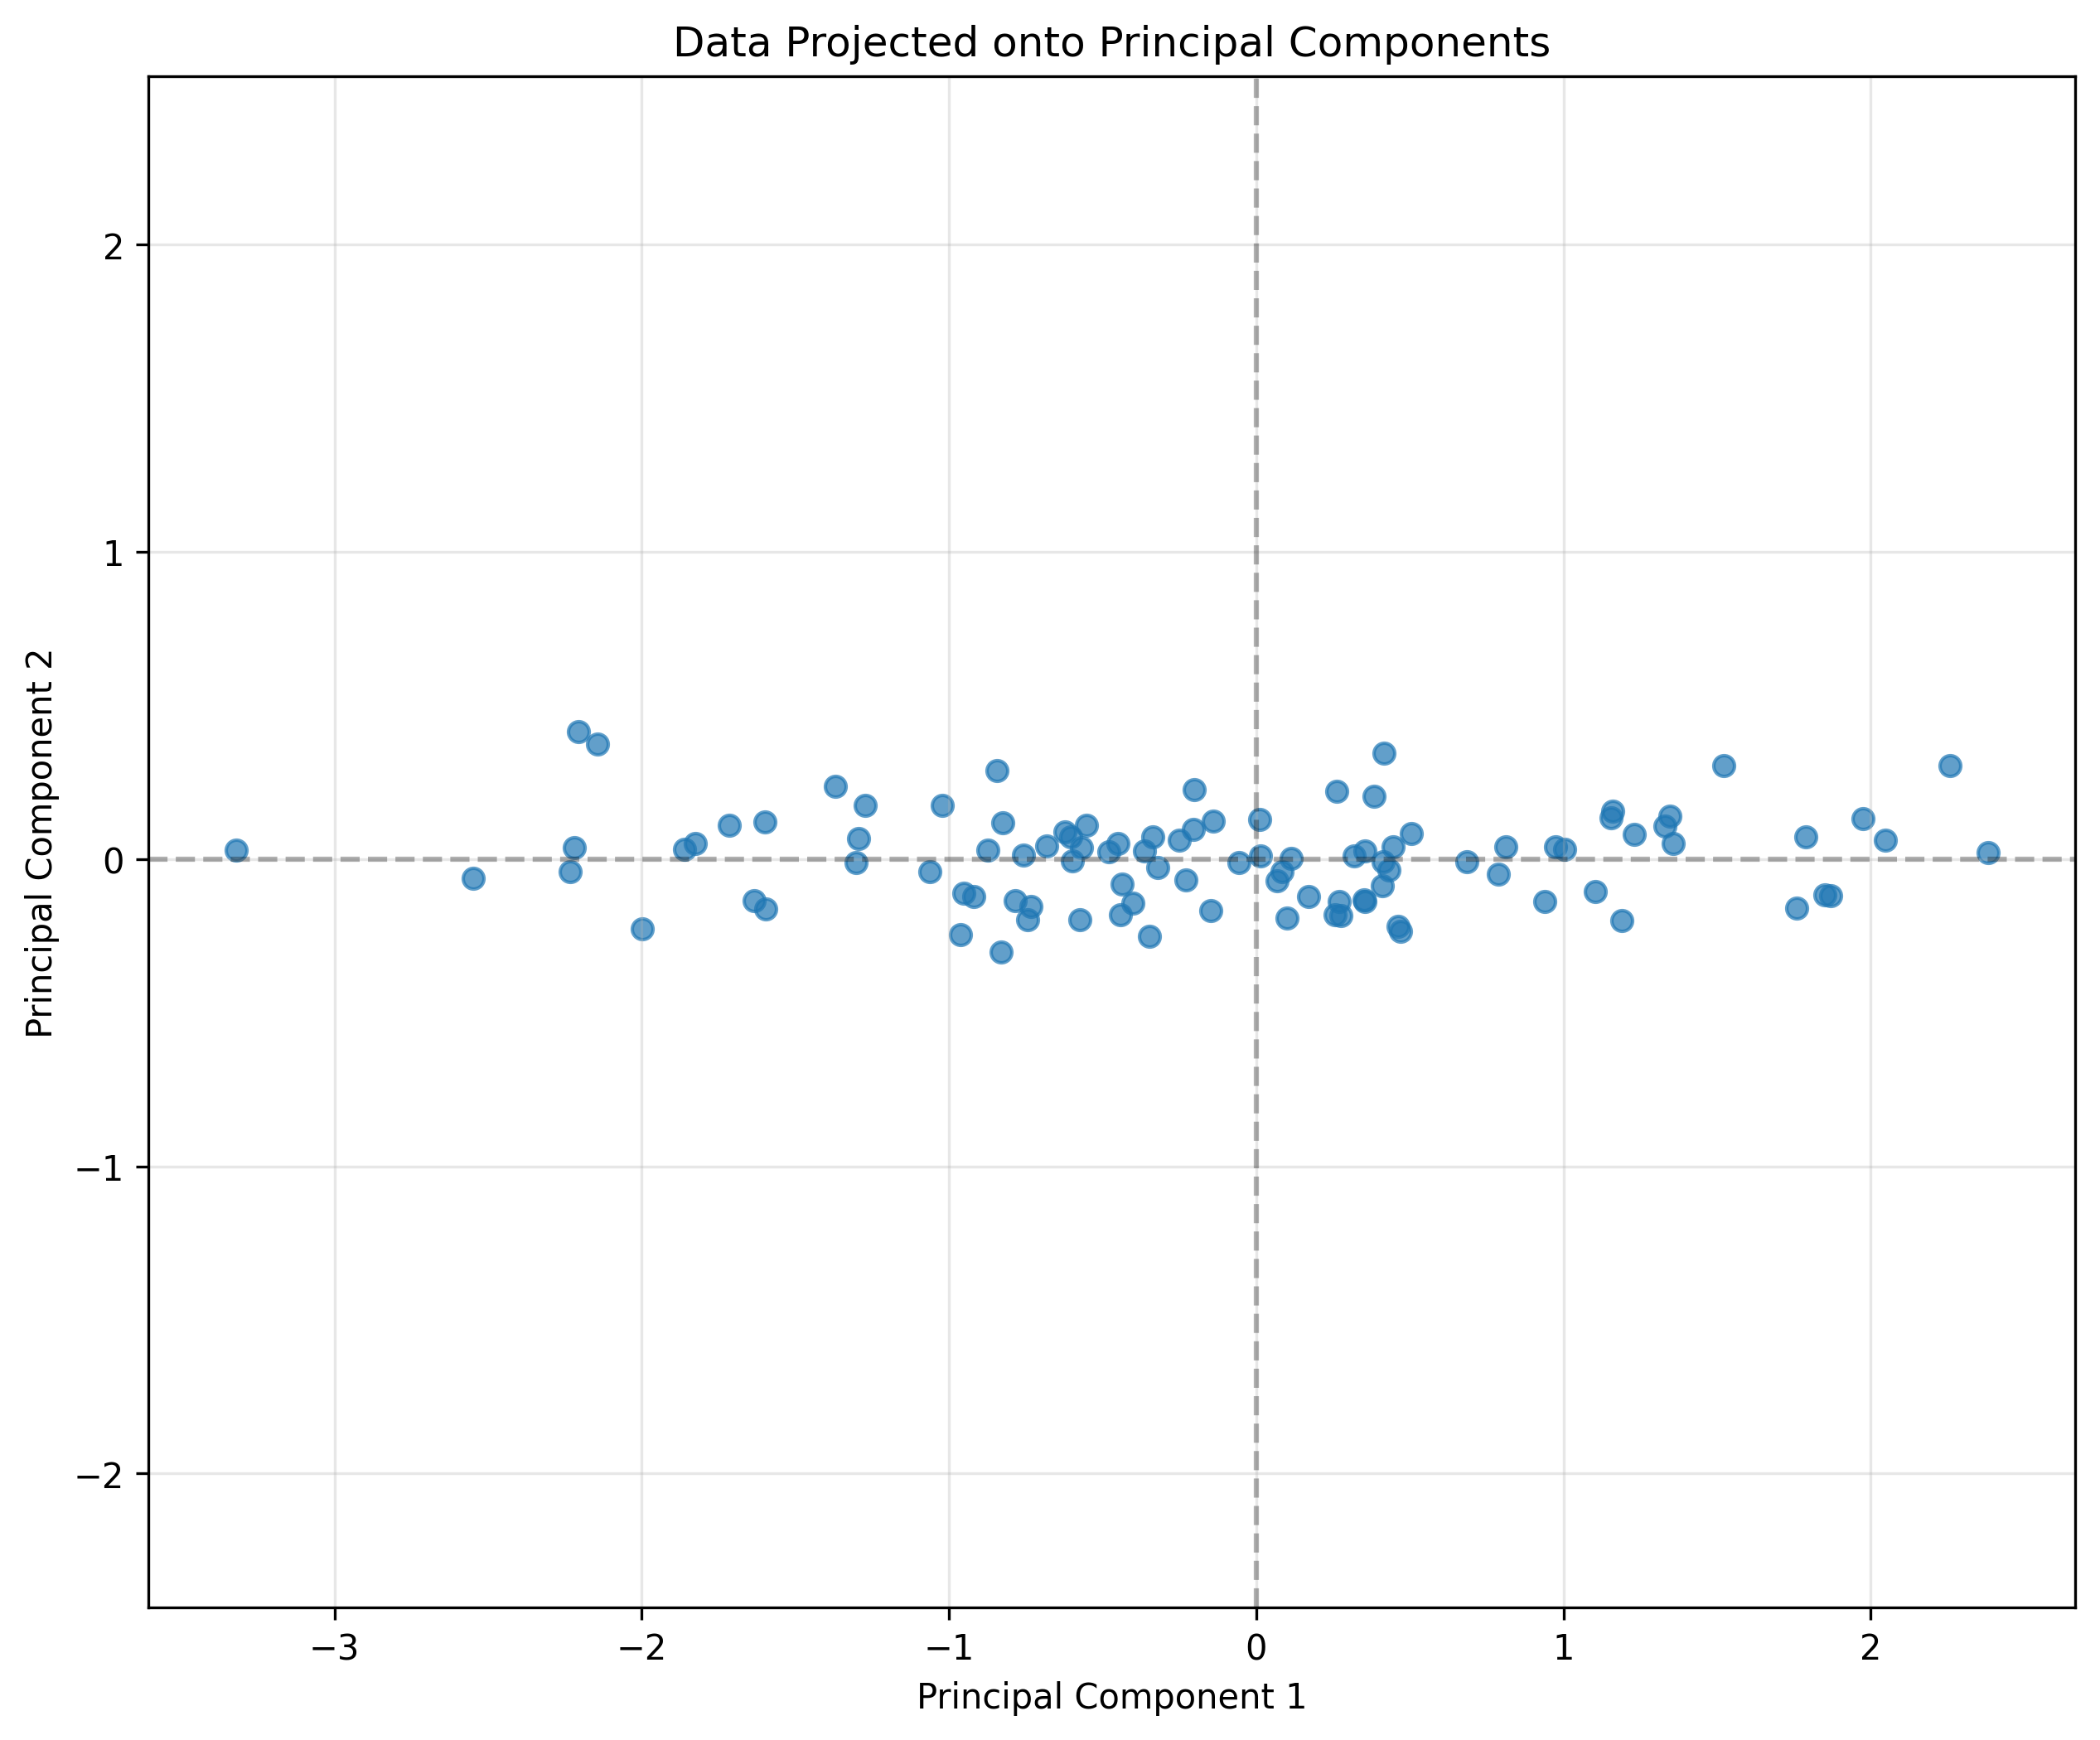

In [19]:
# Let's create some simulated data that has an underlying structure
np.random.seed(42)

# Create data with a correlation between two variables
x = np.random.normal(0, 1, 100)
y = 0.8 * x + 0.2 * np.random.normal(0, 1, 100)

# Combine into a single data matrix
data = np.column_stack([x, y])

# Calculate the covariance matrix
cov_matrix = np.cov(data, rowvar=False)
print("Covariance matrix:")
print(cov_matrix)

# Calculate eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors (as columns):")
print(eigenvectors)

# Visualize the data and principal components
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], alpha=0.7, label='Data points')

# Plot eigenvectors (principal components) scaled by their eigenvalues
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    scale = np.sqrt(eigenvalues[i]) * 2  # Scale for visualization
    plt.quiver(0, 0, v[0]*scale, v[1]*scale, angles='xy', scale_units='xy', 
               scale=1, color=['red', 'green'][i], 
               label=f'PC{i+1} (variance: {eigenvalues[i]:.2f})')

plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Data and Principal Components')
plt.legend()
plt.axis('equal')
plt.show()

# Project the data onto the principal components
projected_data = data @ eigenvectors

# Plot the projected data
plt.figure(figsize=(10, 8))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.7, label='Projected data')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Projected onto Principal Components')
plt.axis('equal')
plt.show()

### Psychological Example: Factor Analysis with Real Data

Let's apply PCA/factor analysis to a larger simulated psychological dataset. Imagine we have administered a 10-item questionnaire measuring various aspects of well-being:

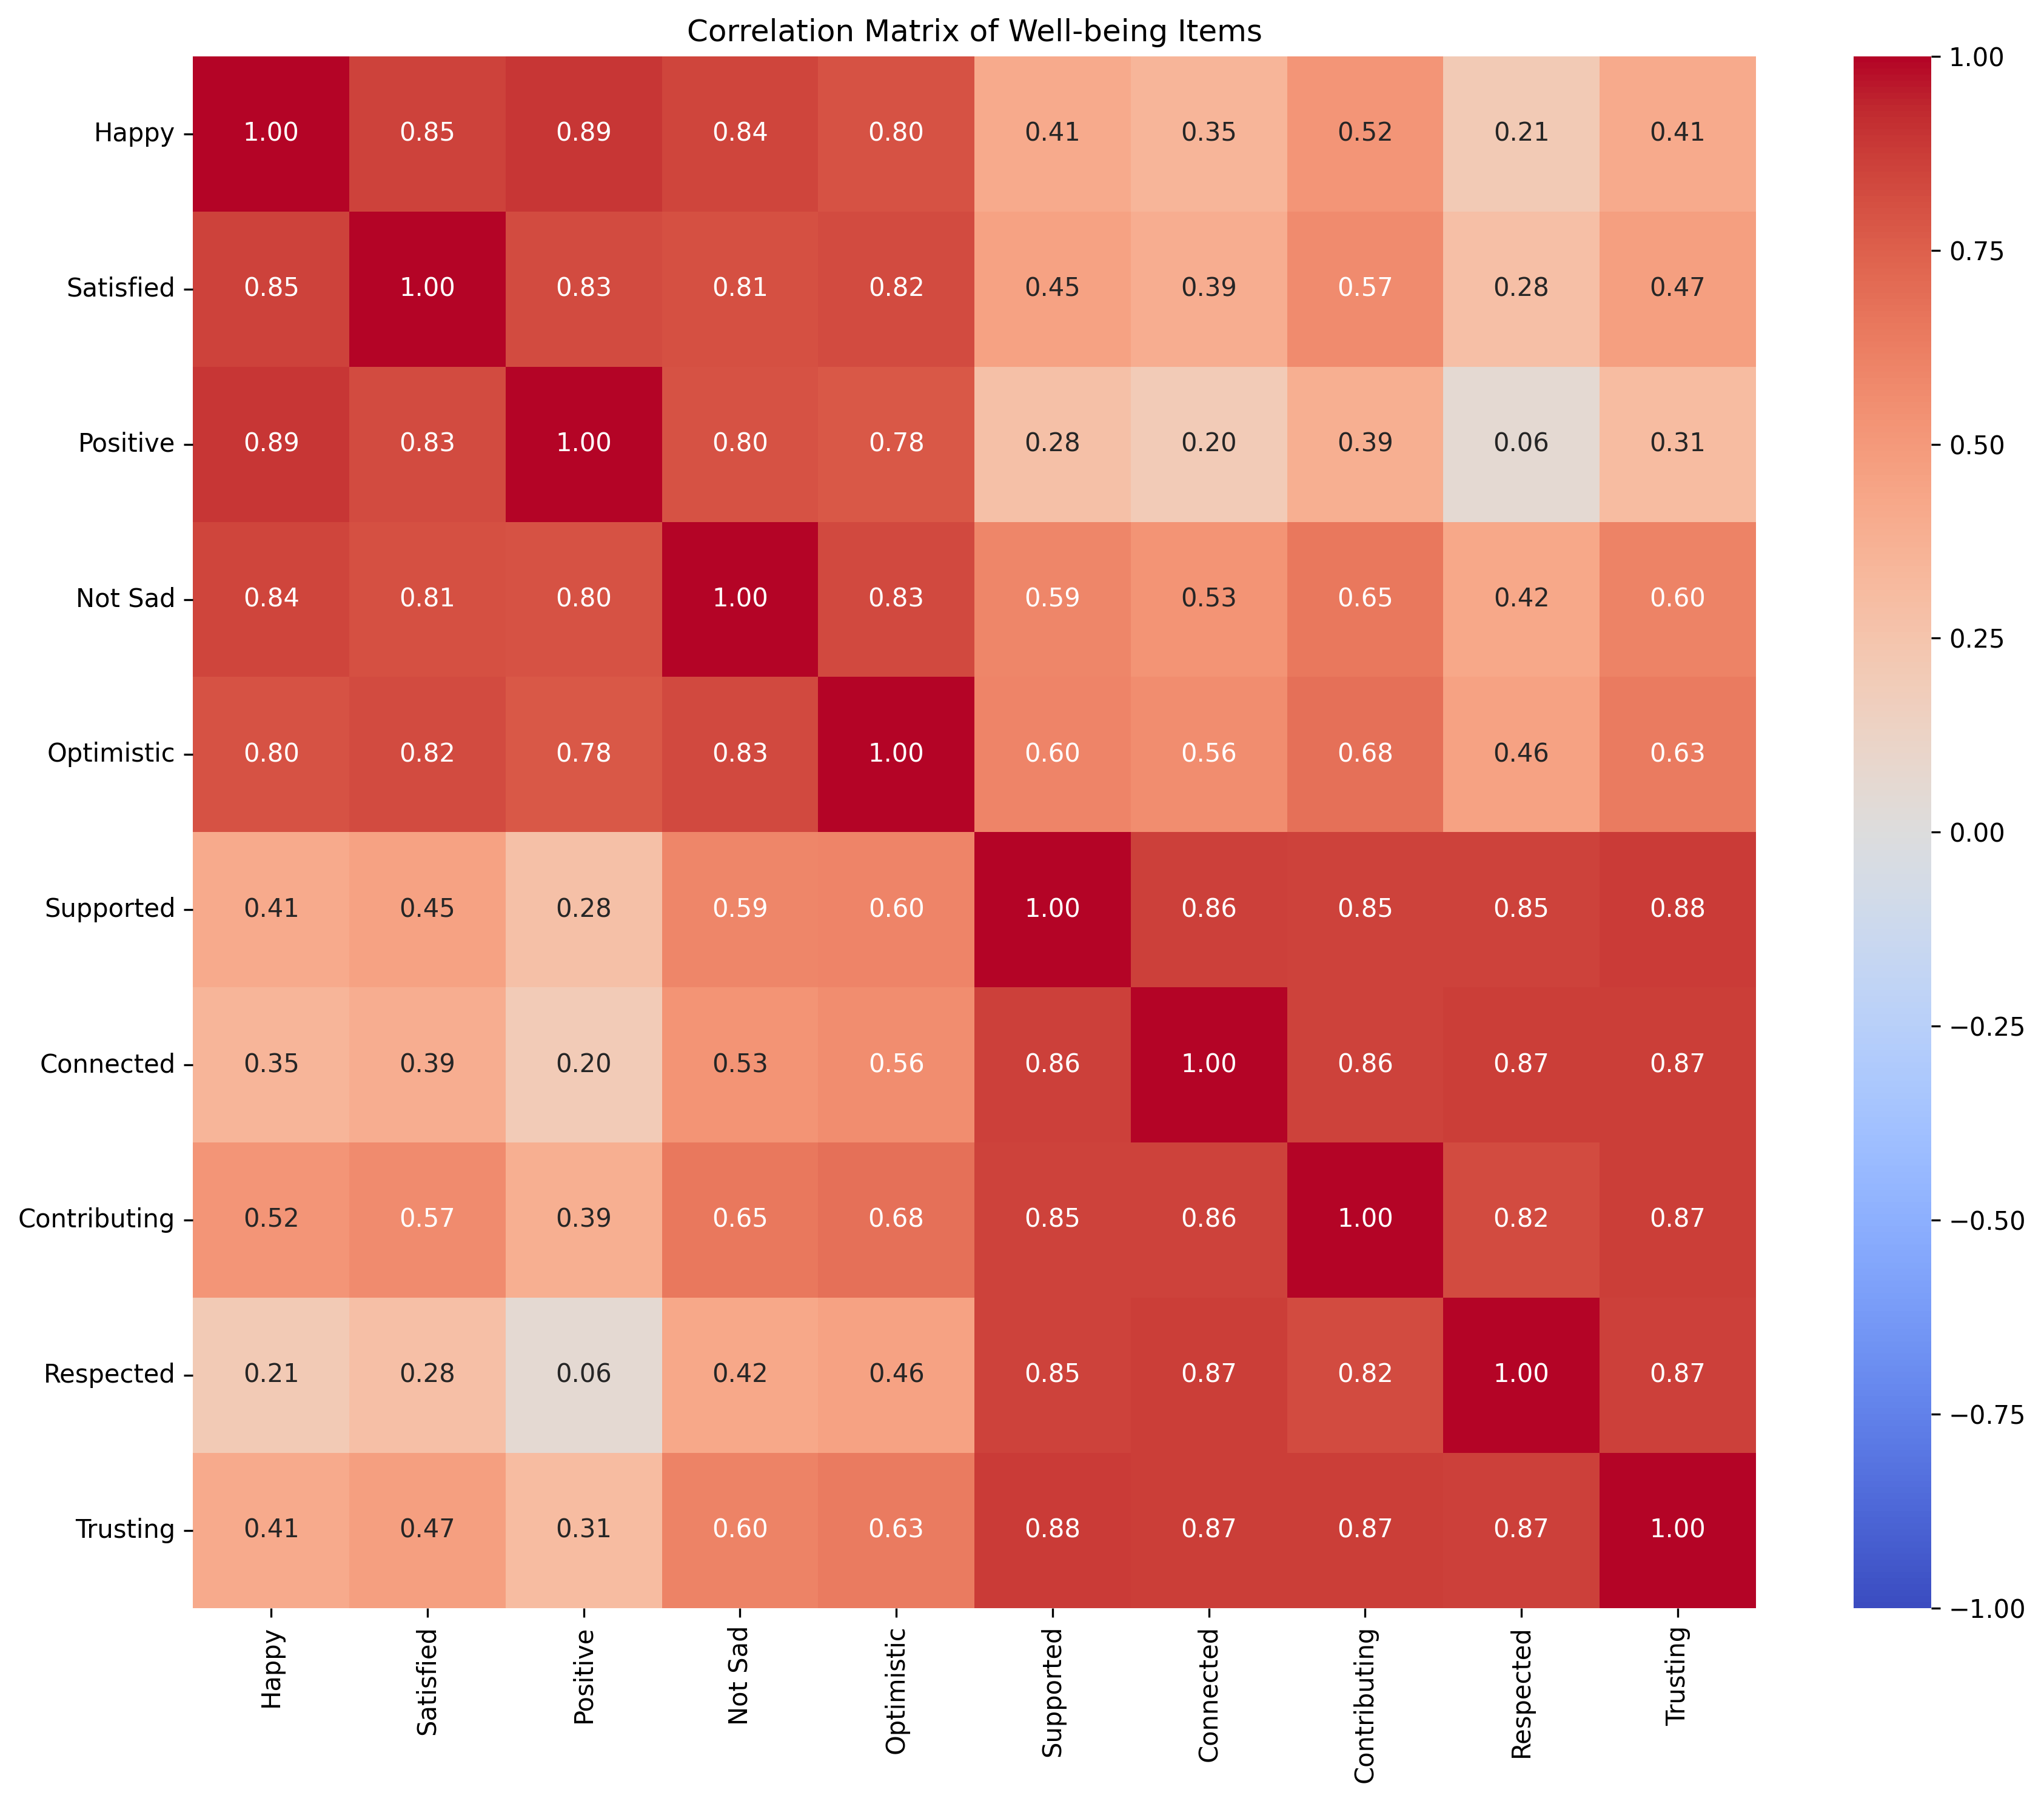

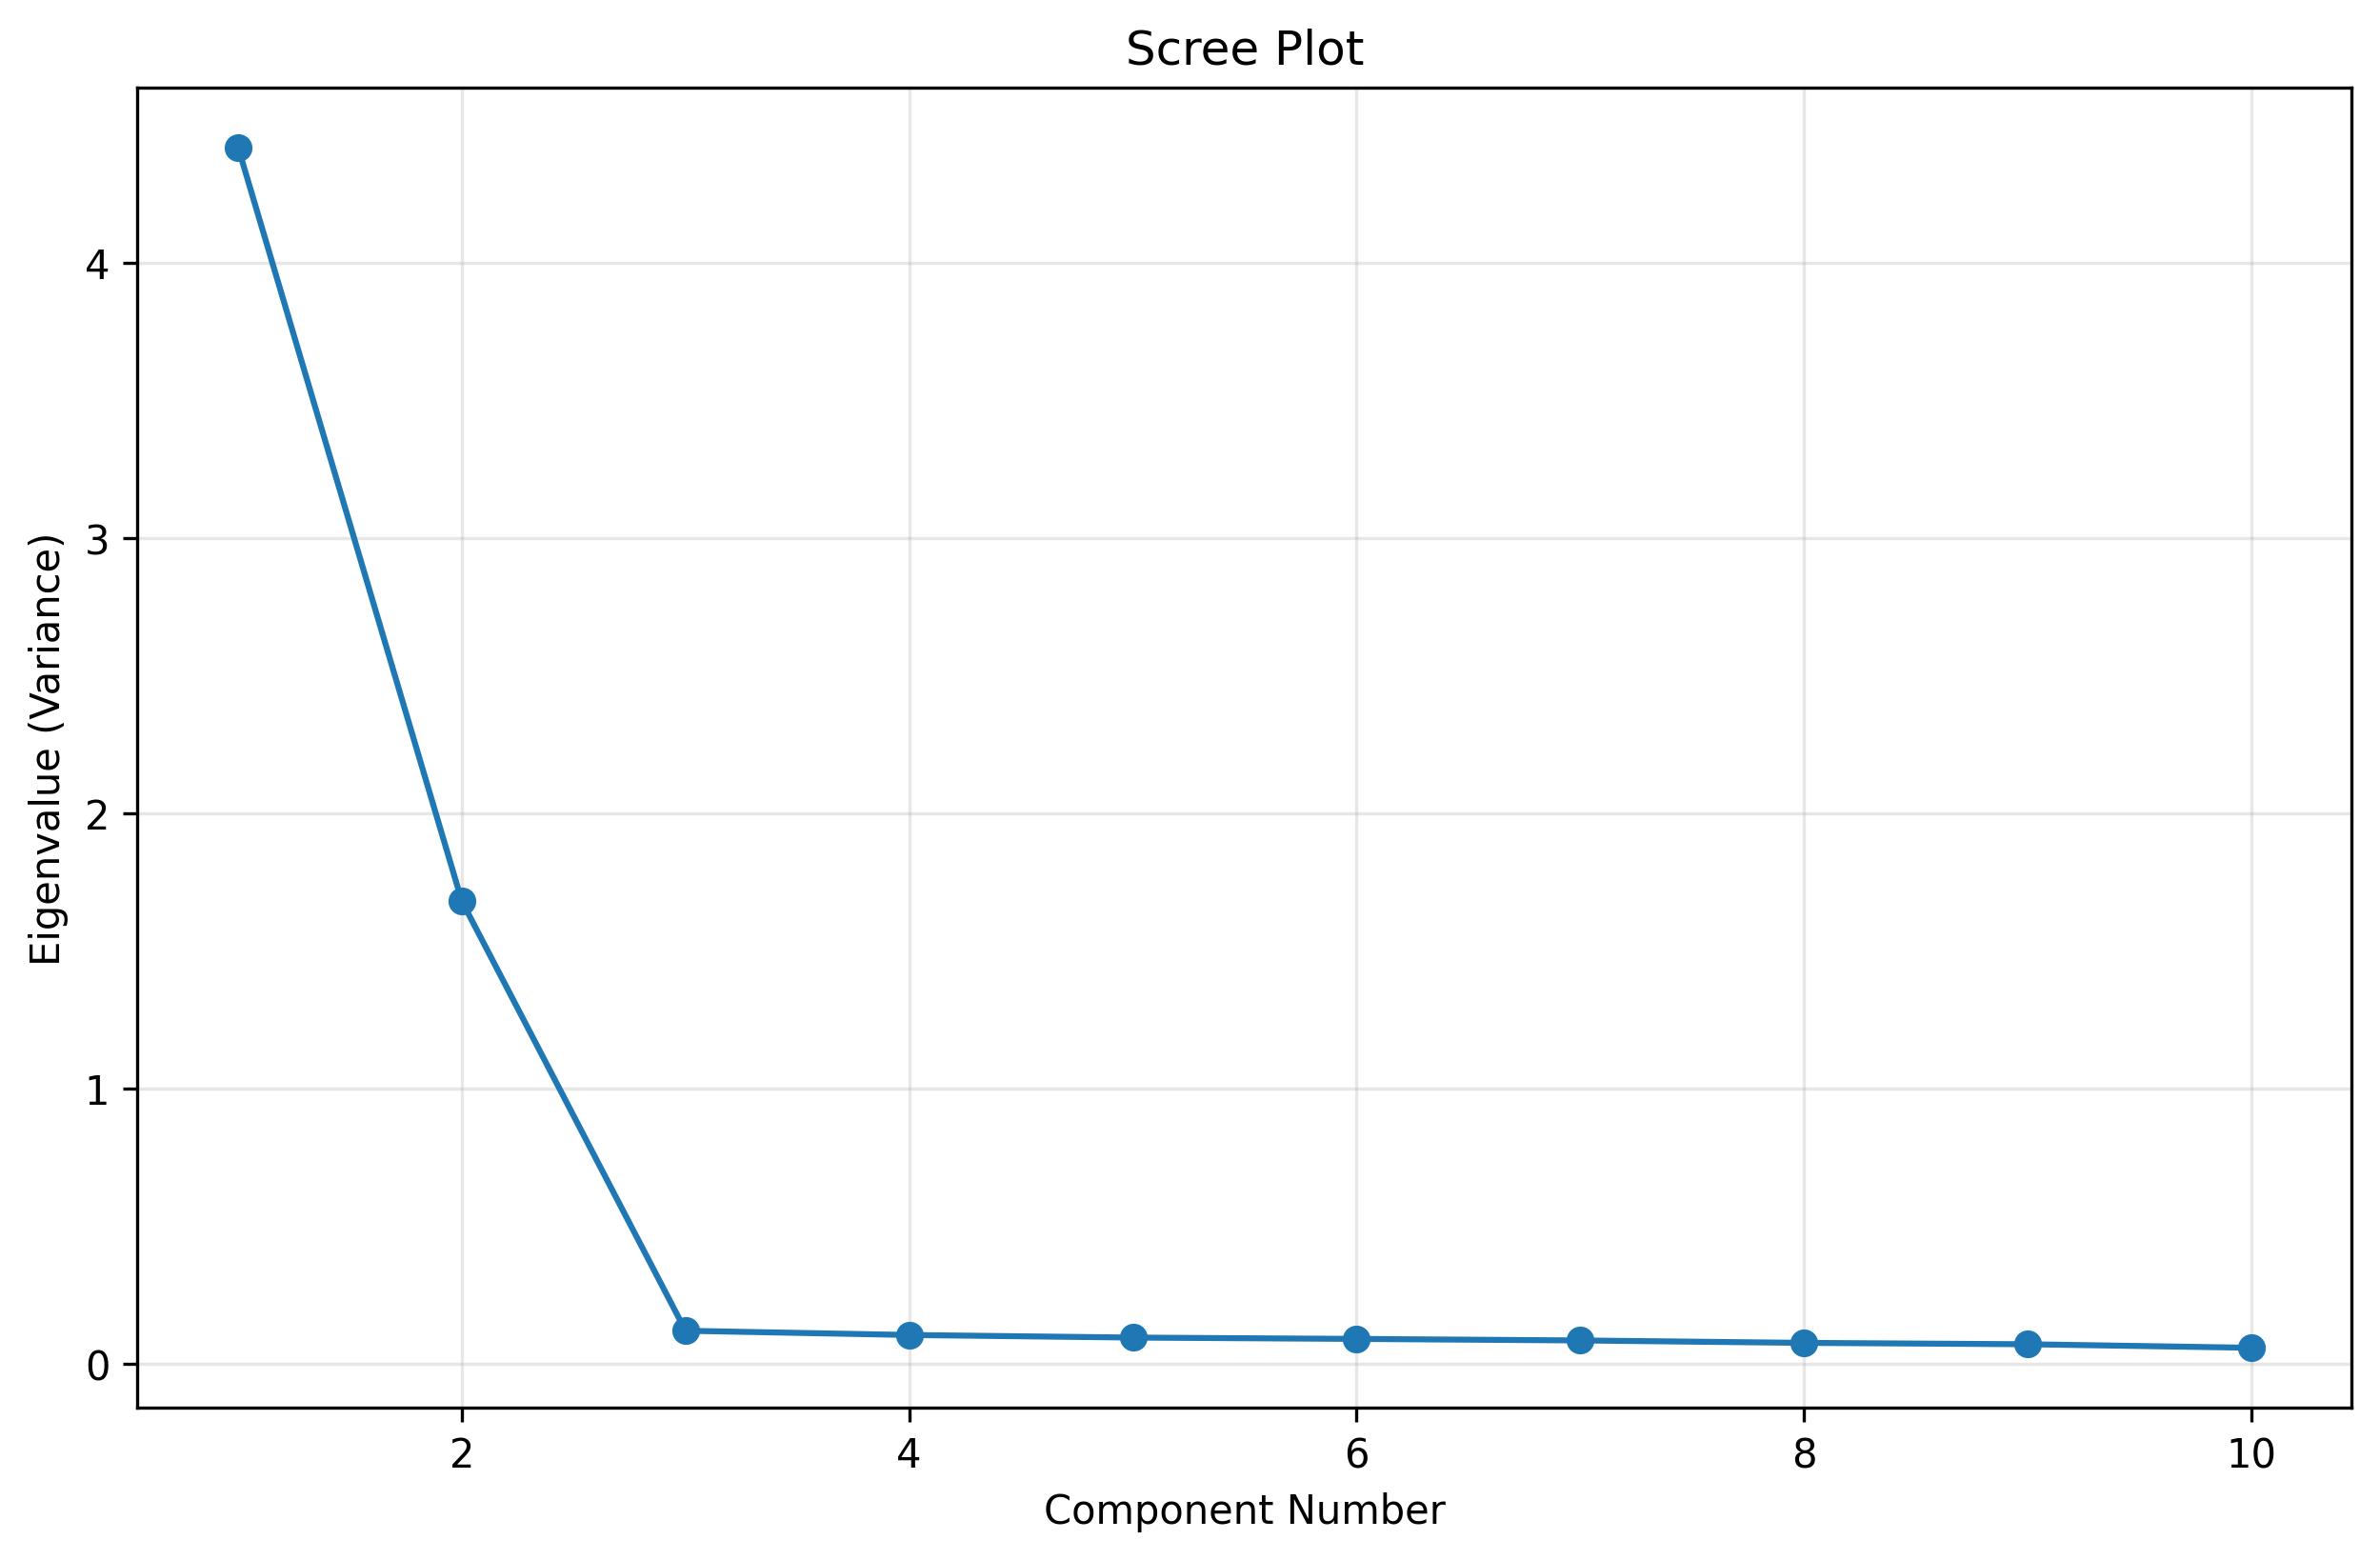

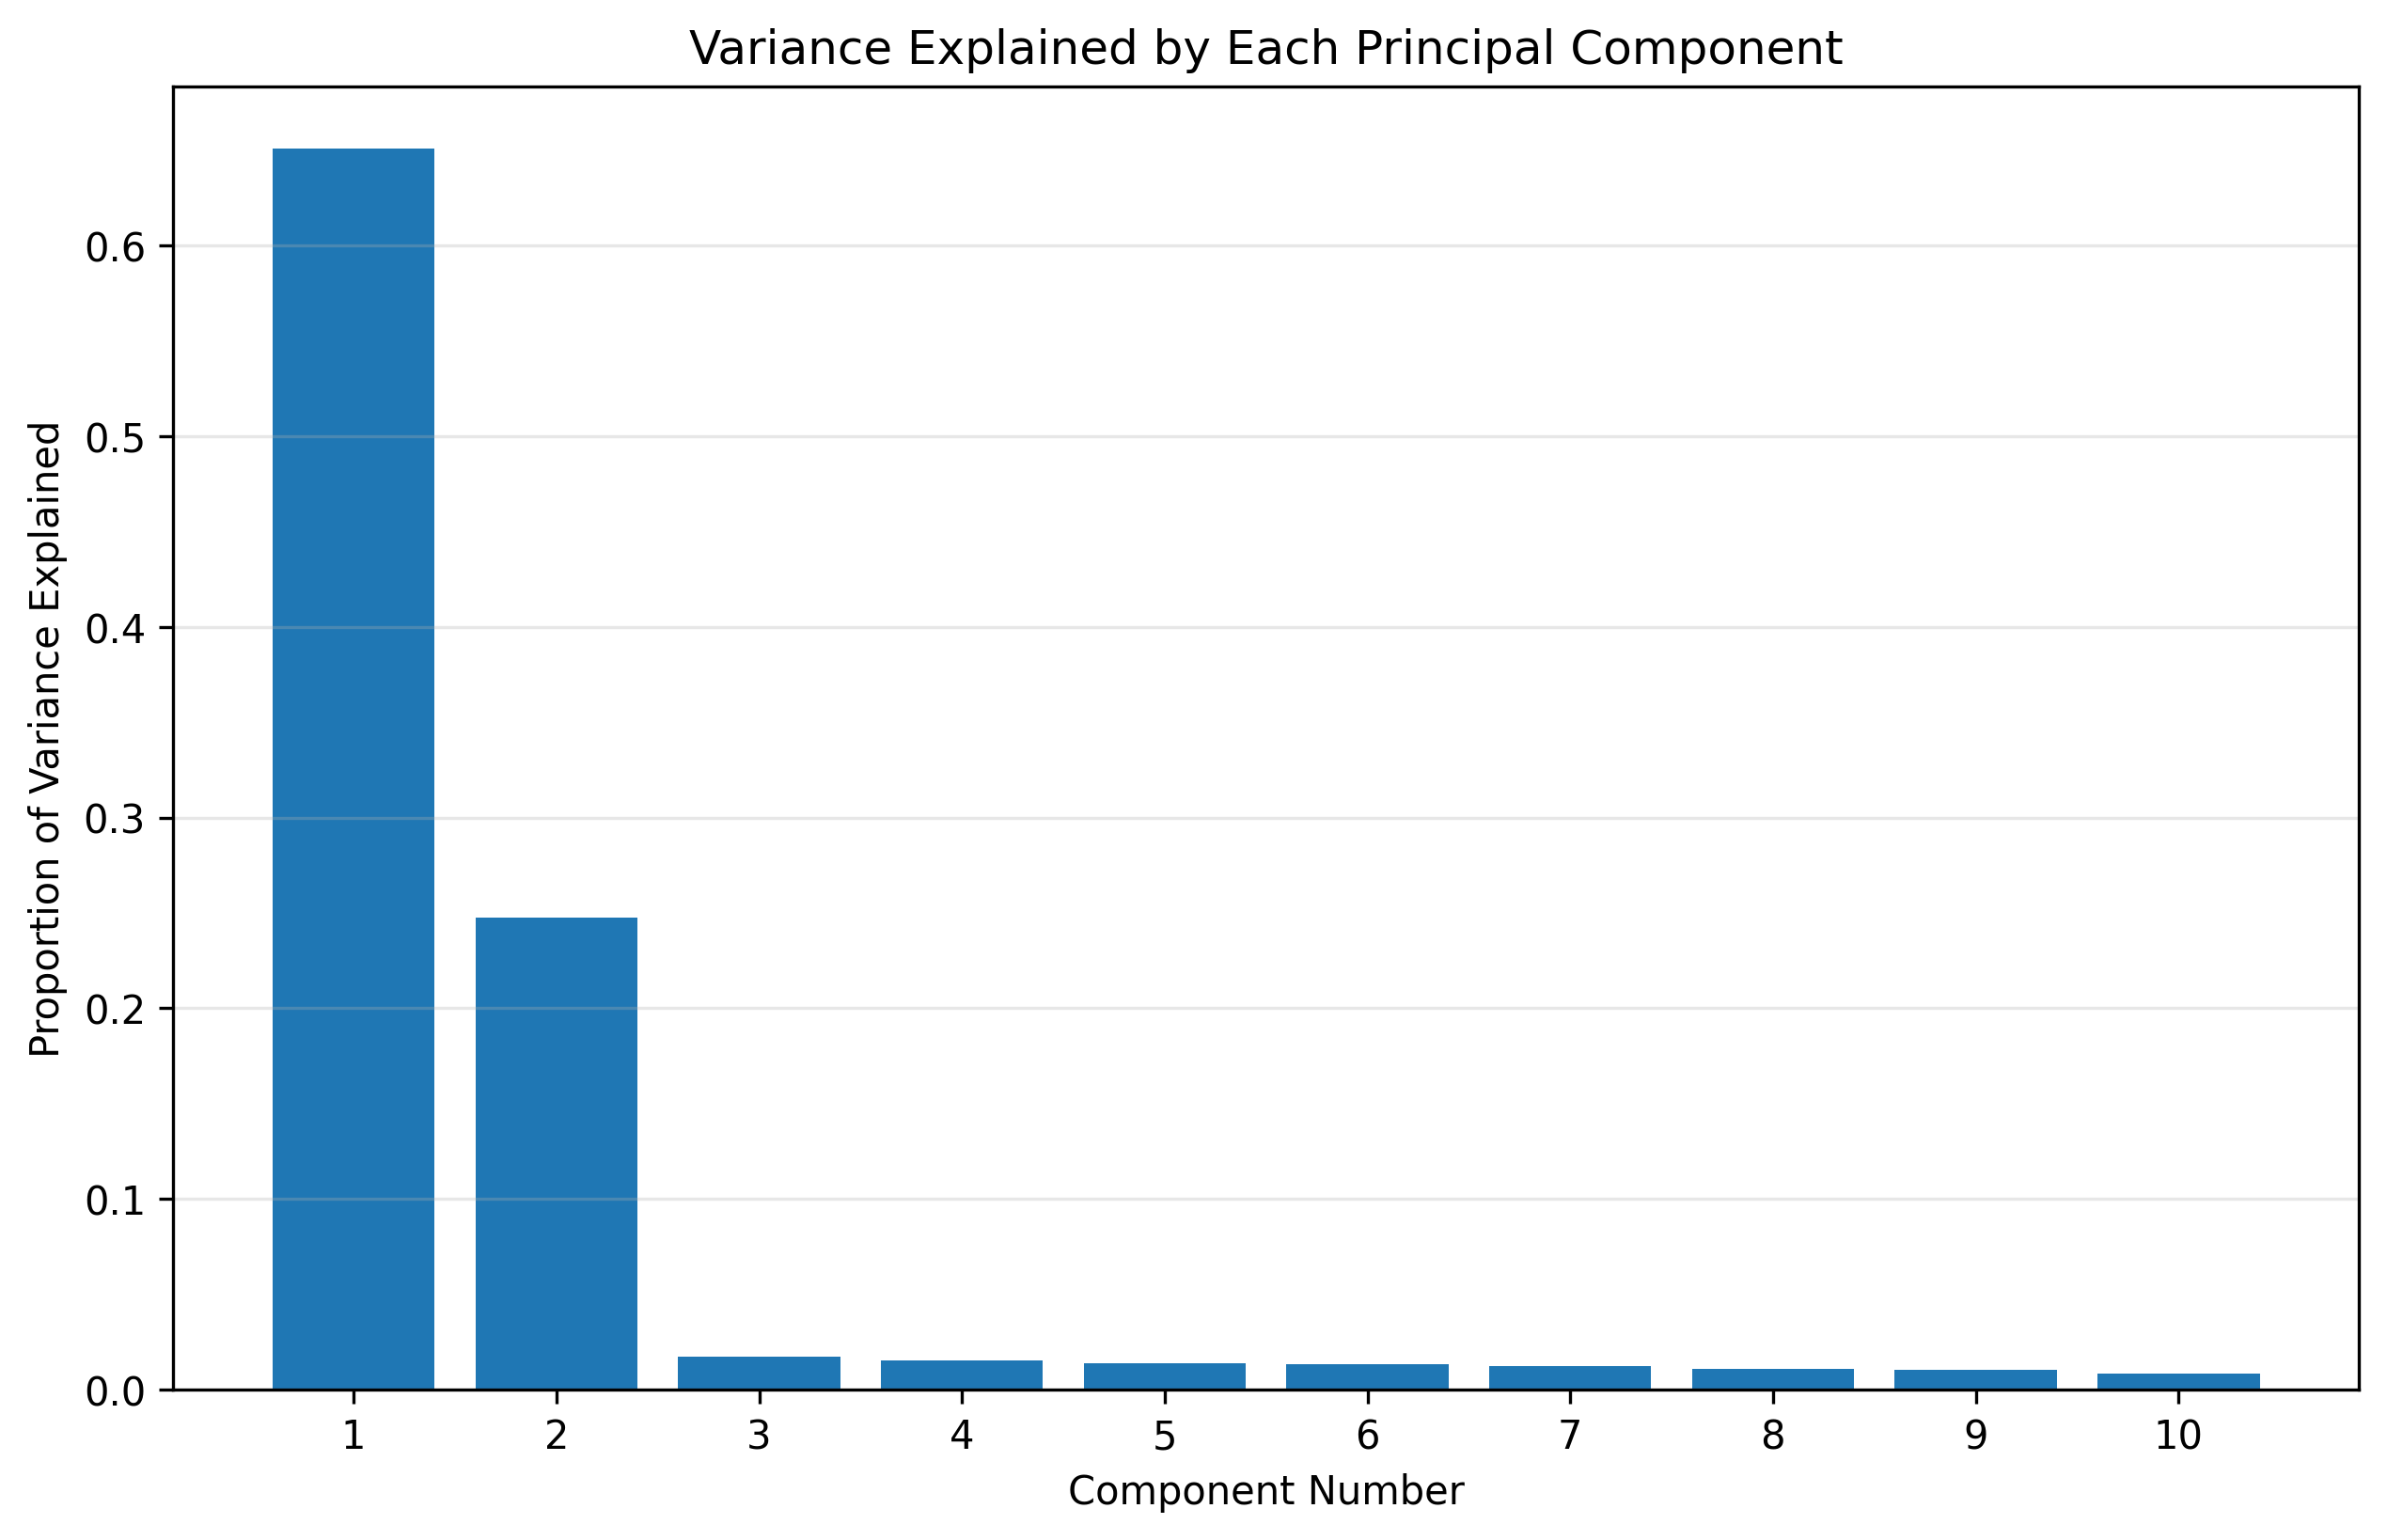

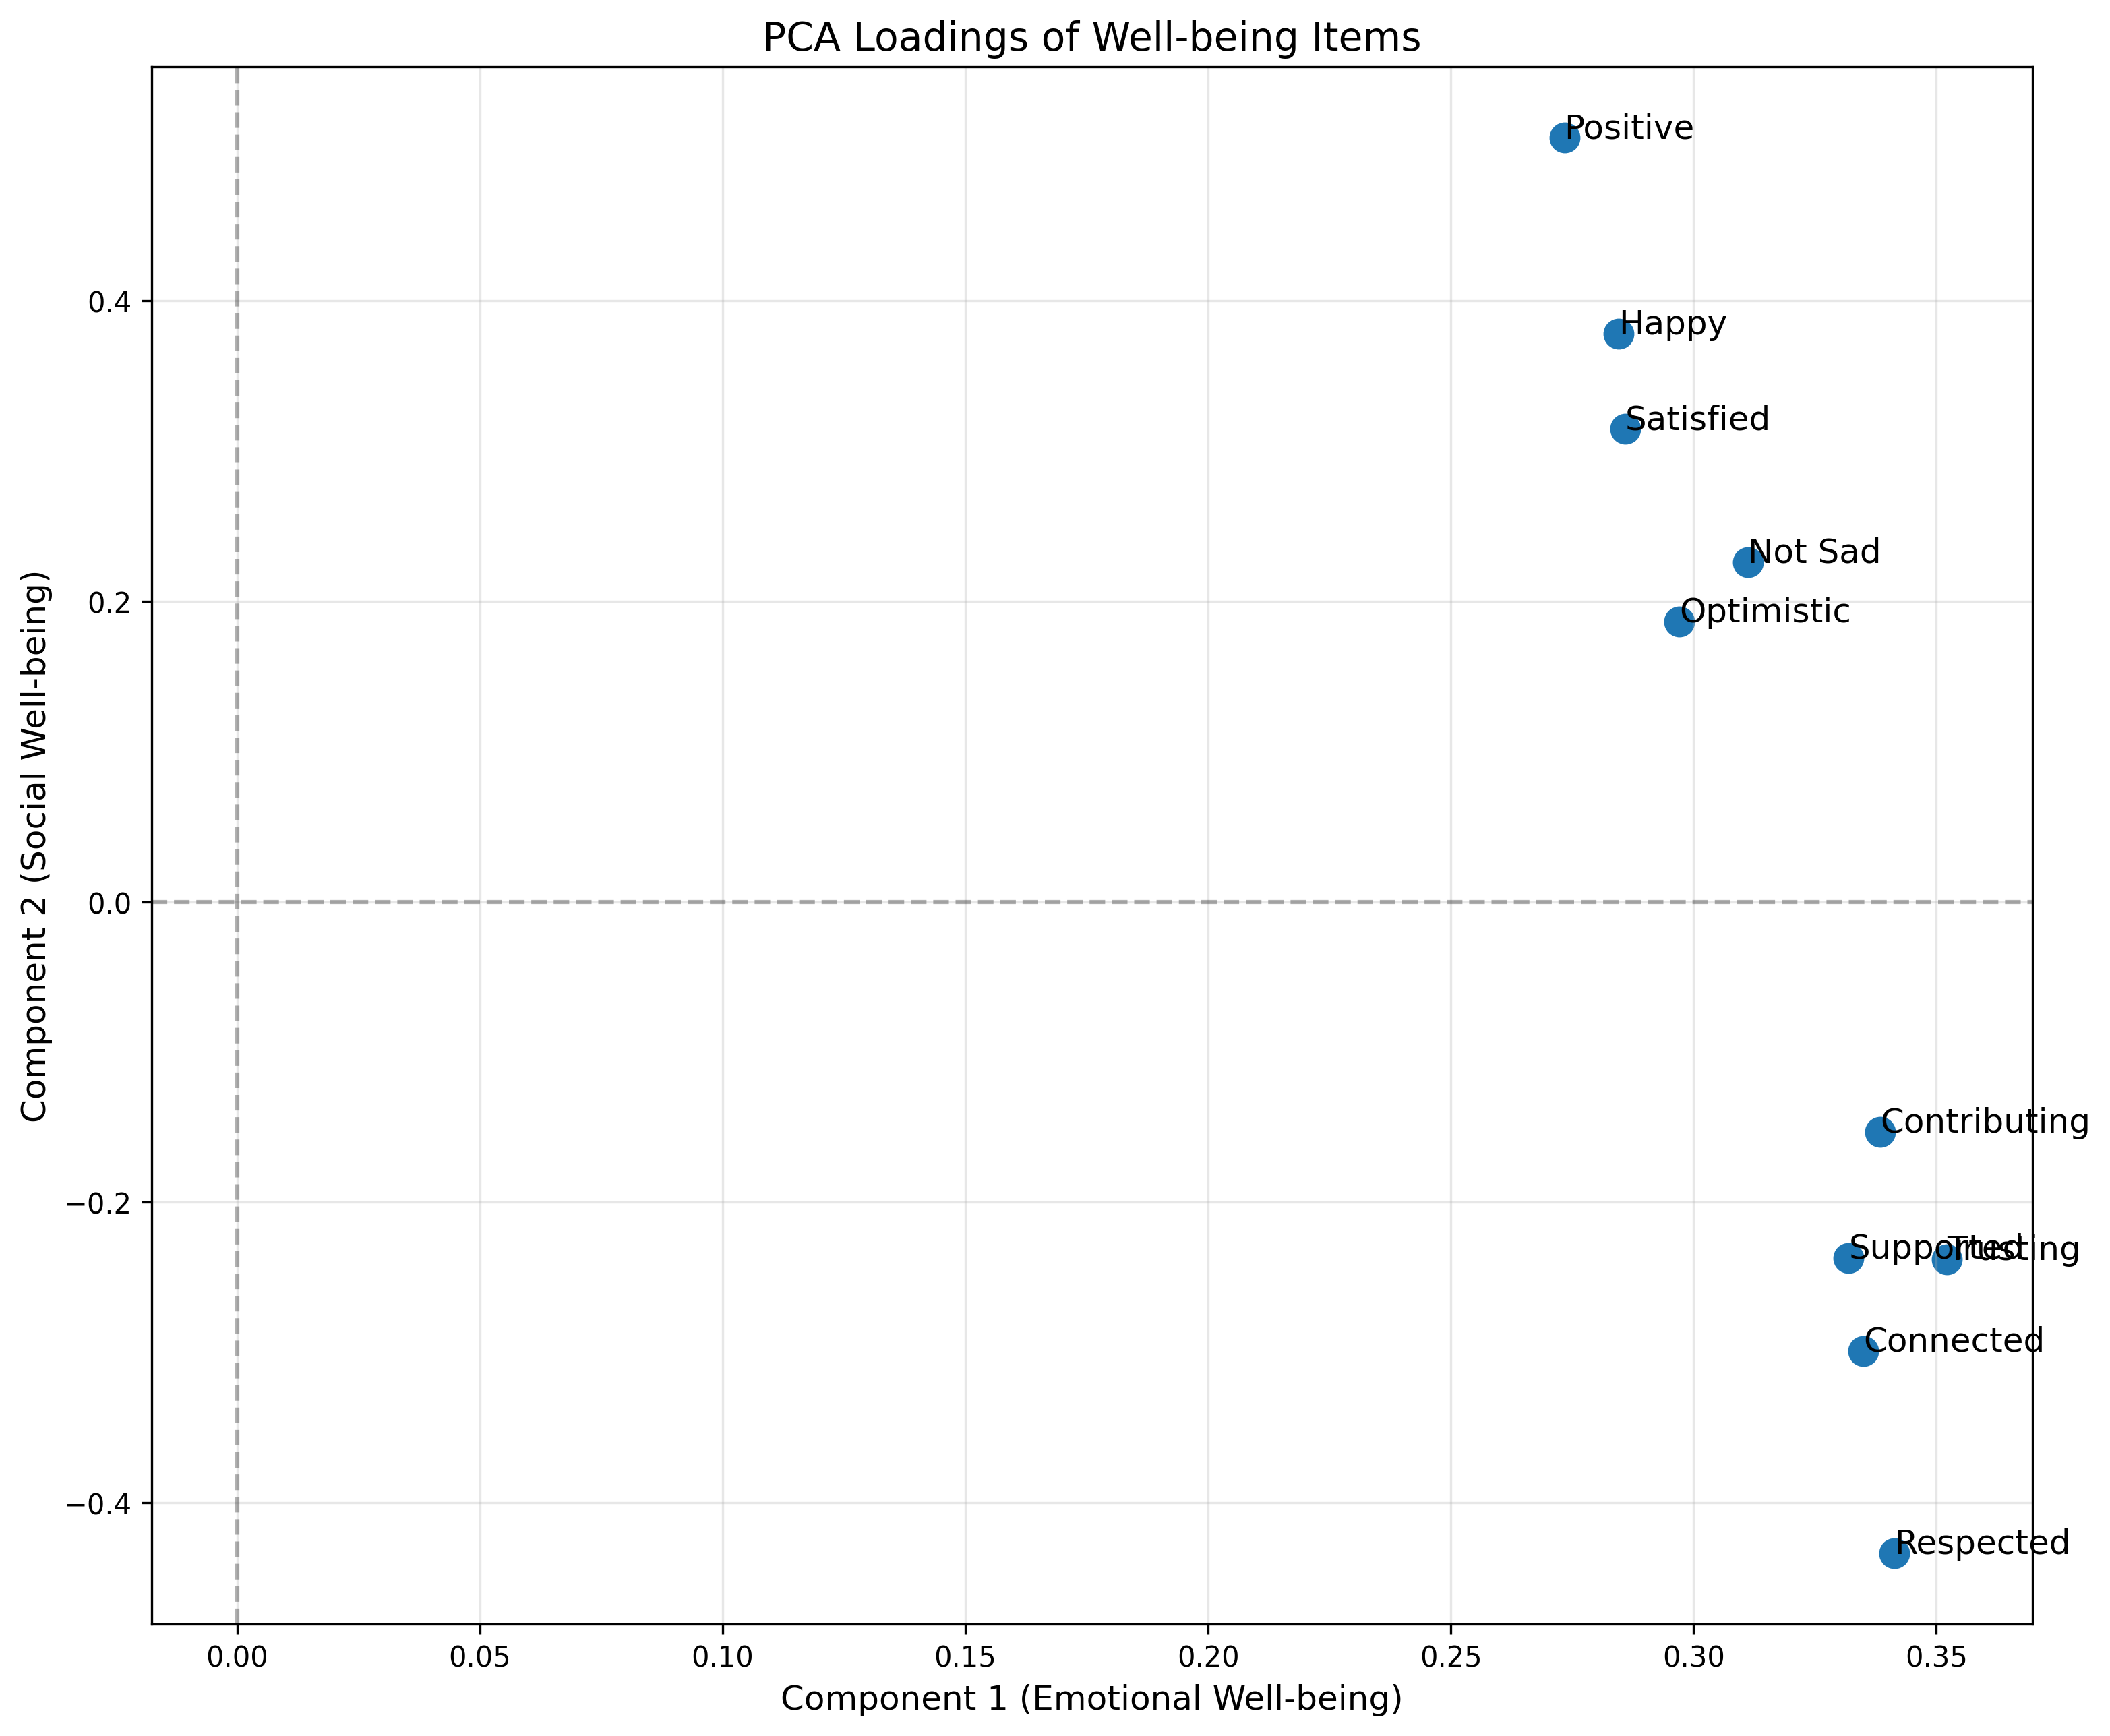

In [20]:
# Create simulated questionnaire data
np.random.seed(42)
n_participants = 200

# Create two underlying latent factors
emotional_wellbeing = np.random.normal(0, 1, n_participants)
social_wellbeing = np.random.normal(0, 1, n_participants)

# Create factor loadings matrix
loadings = np.array([
    [0.8, 0.1],  # Q1: "I feel happy" (emotional)
    [0.7, 0.2],  # Q2: "I am satisfied with life" (emotional)
    [0.9, 0.0],  # Q3: "I feel positive emotions" (emotional)
    [0.7, 0.3],  # Q4: "I rarely feel sad" (emotional)
    [0.6, 0.3],  # Q5: "I'm optimistic about the future" (emotional)
    [0.2, 0.7],  # Q6: "I have supportive relationships" (social)
    [0.1, 0.8],  # Q7: "I feel connected to others" (social)
    [0.3, 0.7],  # Q8: "I contribute to my community" (social)
    [0.0, 0.9],  # Q9: "People respect me" (social)
    [0.2, 0.8]   # Q10: "I trust others" (social)
])

# Create the data matrix
latent_factors = np.column_stack([emotional_wellbeing, social_wellbeing])
questionnaire_data = latent_factors @ loadings.T + np.random.normal(0, 0.3, (n_participants, 10))

# Create variable names
variable_names = [
    "Happy", "Satisfied", "Positive", "Not Sad", "Optimistic",
    "Supported", "Connected", "Contributing", "Respected", "Trusting"
]

# Calculate correlation matrix
corr_matrix = np.corrcoef(questionnaire_data, rowvar=False)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1,
           xticklabels=variable_names, yticklabels=variable_names)
plt.title("Correlation Matrix of Well-being Items")
plt.tight_layout()
plt.show()

# Perform PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(questionnaire_data)

# Scree plot (eigenvalues)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_, 'o-')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue (Variance)')
plt.title('Scree Plot')
plt.grid(alpha=0.3)
plt.show()

# How much variance is explained by each component?
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Component Number')
plt.ylabel('Proportion of Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.grid(alpha=0.3, axis='y')
plt.show()

# Loadings of first two components
loadings_pca = pca.components_.T[:, :2]

# Plot the loadings
plt.figure(figsize=(12, 10))
plt.scatter(loadings_pca[:, 0], loadings_pca[:, 1], s=100)
for i, txt in enumerate(variable_names):
    plt.annotate(txt, (loadings_pca[i, 0], loadings_pca[i, 1]), fontsize=12)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3)
plt.xlabel('Component 1 (Emotional Well-being)', fontsize=12)
plt.ylabel('Component 2 (Social Well-being)', fontsize=12)
plt.title('PCA Loadings of Well-being Items', fontsize=14)
plt.show()

## Key Takeaways from Chapter 15

In this chapter, we've covered several important concepts in matrices and linear algebra:

1. **Matrices**: Rectangular arrays of numbers that can represent data, transformations, and relationships between variables.

2. **Basic Operations**: Addition, subtraction, transposition, scalar multiplication, and matrix multiplication.

3. **Linear Transformations**: Understanding matrices as operations that transform vectors in space (scaling, rotation, reflection, shearing).

4. **Matrix Inverses**: Special matrices that "undo" matrix transformations, similar to how division undoes multiplication.

5. **Eigenvalues and Eigenvectors**: Special values and directions that help us understand the underlying structure of matrix transformations.

6. **Applications in Psychology**: Factor analysis, principal component analysis, multiple regression, and more.

These concepts form the foundation for many advanced statistical techniques used in psychological research, from factor analysis to structural equation modeling to machine learning.

## Real-World Applications in Psychology

Let's look at a few more real-world applications of matrices and linear algebra in psychology:

### 1. Structural Equation Modeling (SEM)

SEM is an advanced statistical technique that combines factor analysis and path analysis. It uses matrices to represent relationships between observed variables and latent constructs.

For example, a psychologist might use SEM to study how childhood experiences (latent variable) affect adult attachment styles (another latent variable), which in turn affect relationship satisfaction (observed variable).

### 2. Item Response Theory (IRT)

IRT uses matrix operations to analyze how individuals respond to test items. It helps psychologists develop better psychological assessments by understanding item difficulty and discrimination.

### 3. Multidimensional Scaling (MDS)

MDS uses linear algebra to represent similarities or dissimilarities between psychological stimuli in a low-dimensional space. For example, a psychologist might use MDS to visualize how people perceive different emotions as related to each other.

### 4. Network Analysis in Psychopathology

Recent approaches in clinical psychology use network models (represented as matrices) to understand how symptoms of psychological disorders relate to and influence each other.

## A Simplified Example: Network Analysis of Depression Symptoms

Let's simulate a network analysis of depression symptoms to understand how they might influence each other. We'll create a simple adjacency matrix where each entry represents the strength of the relationship between two symptoms.

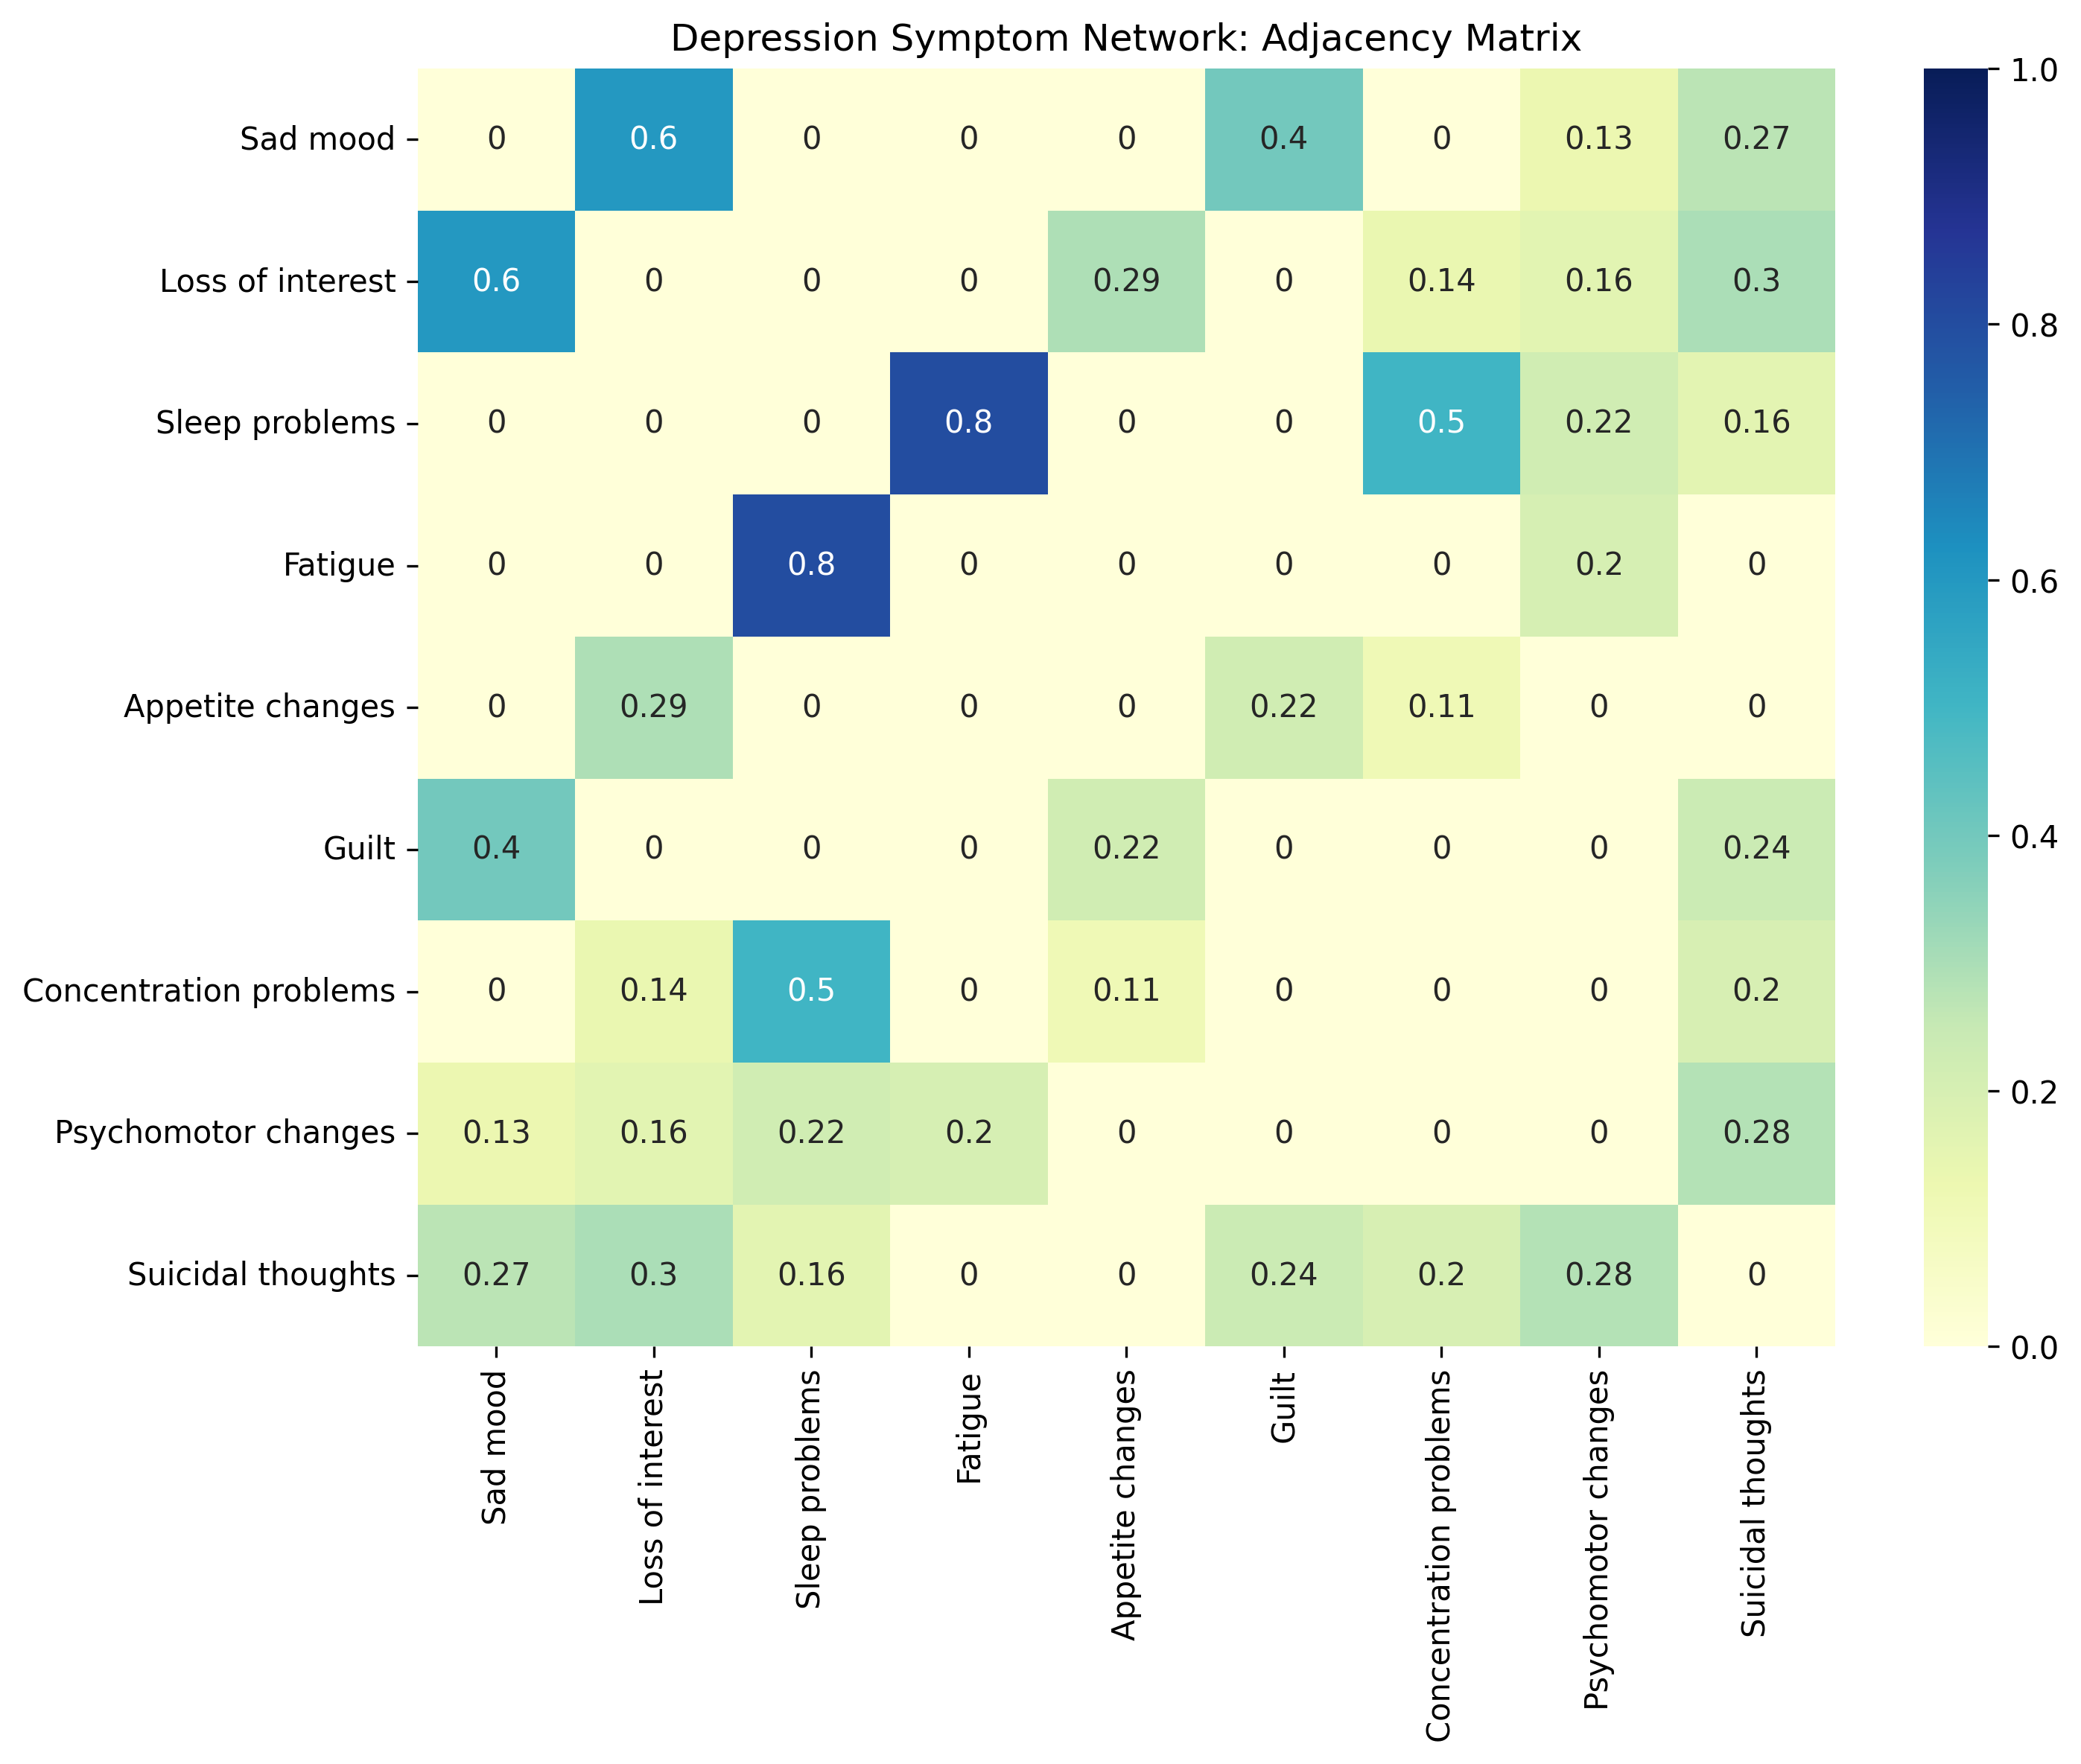

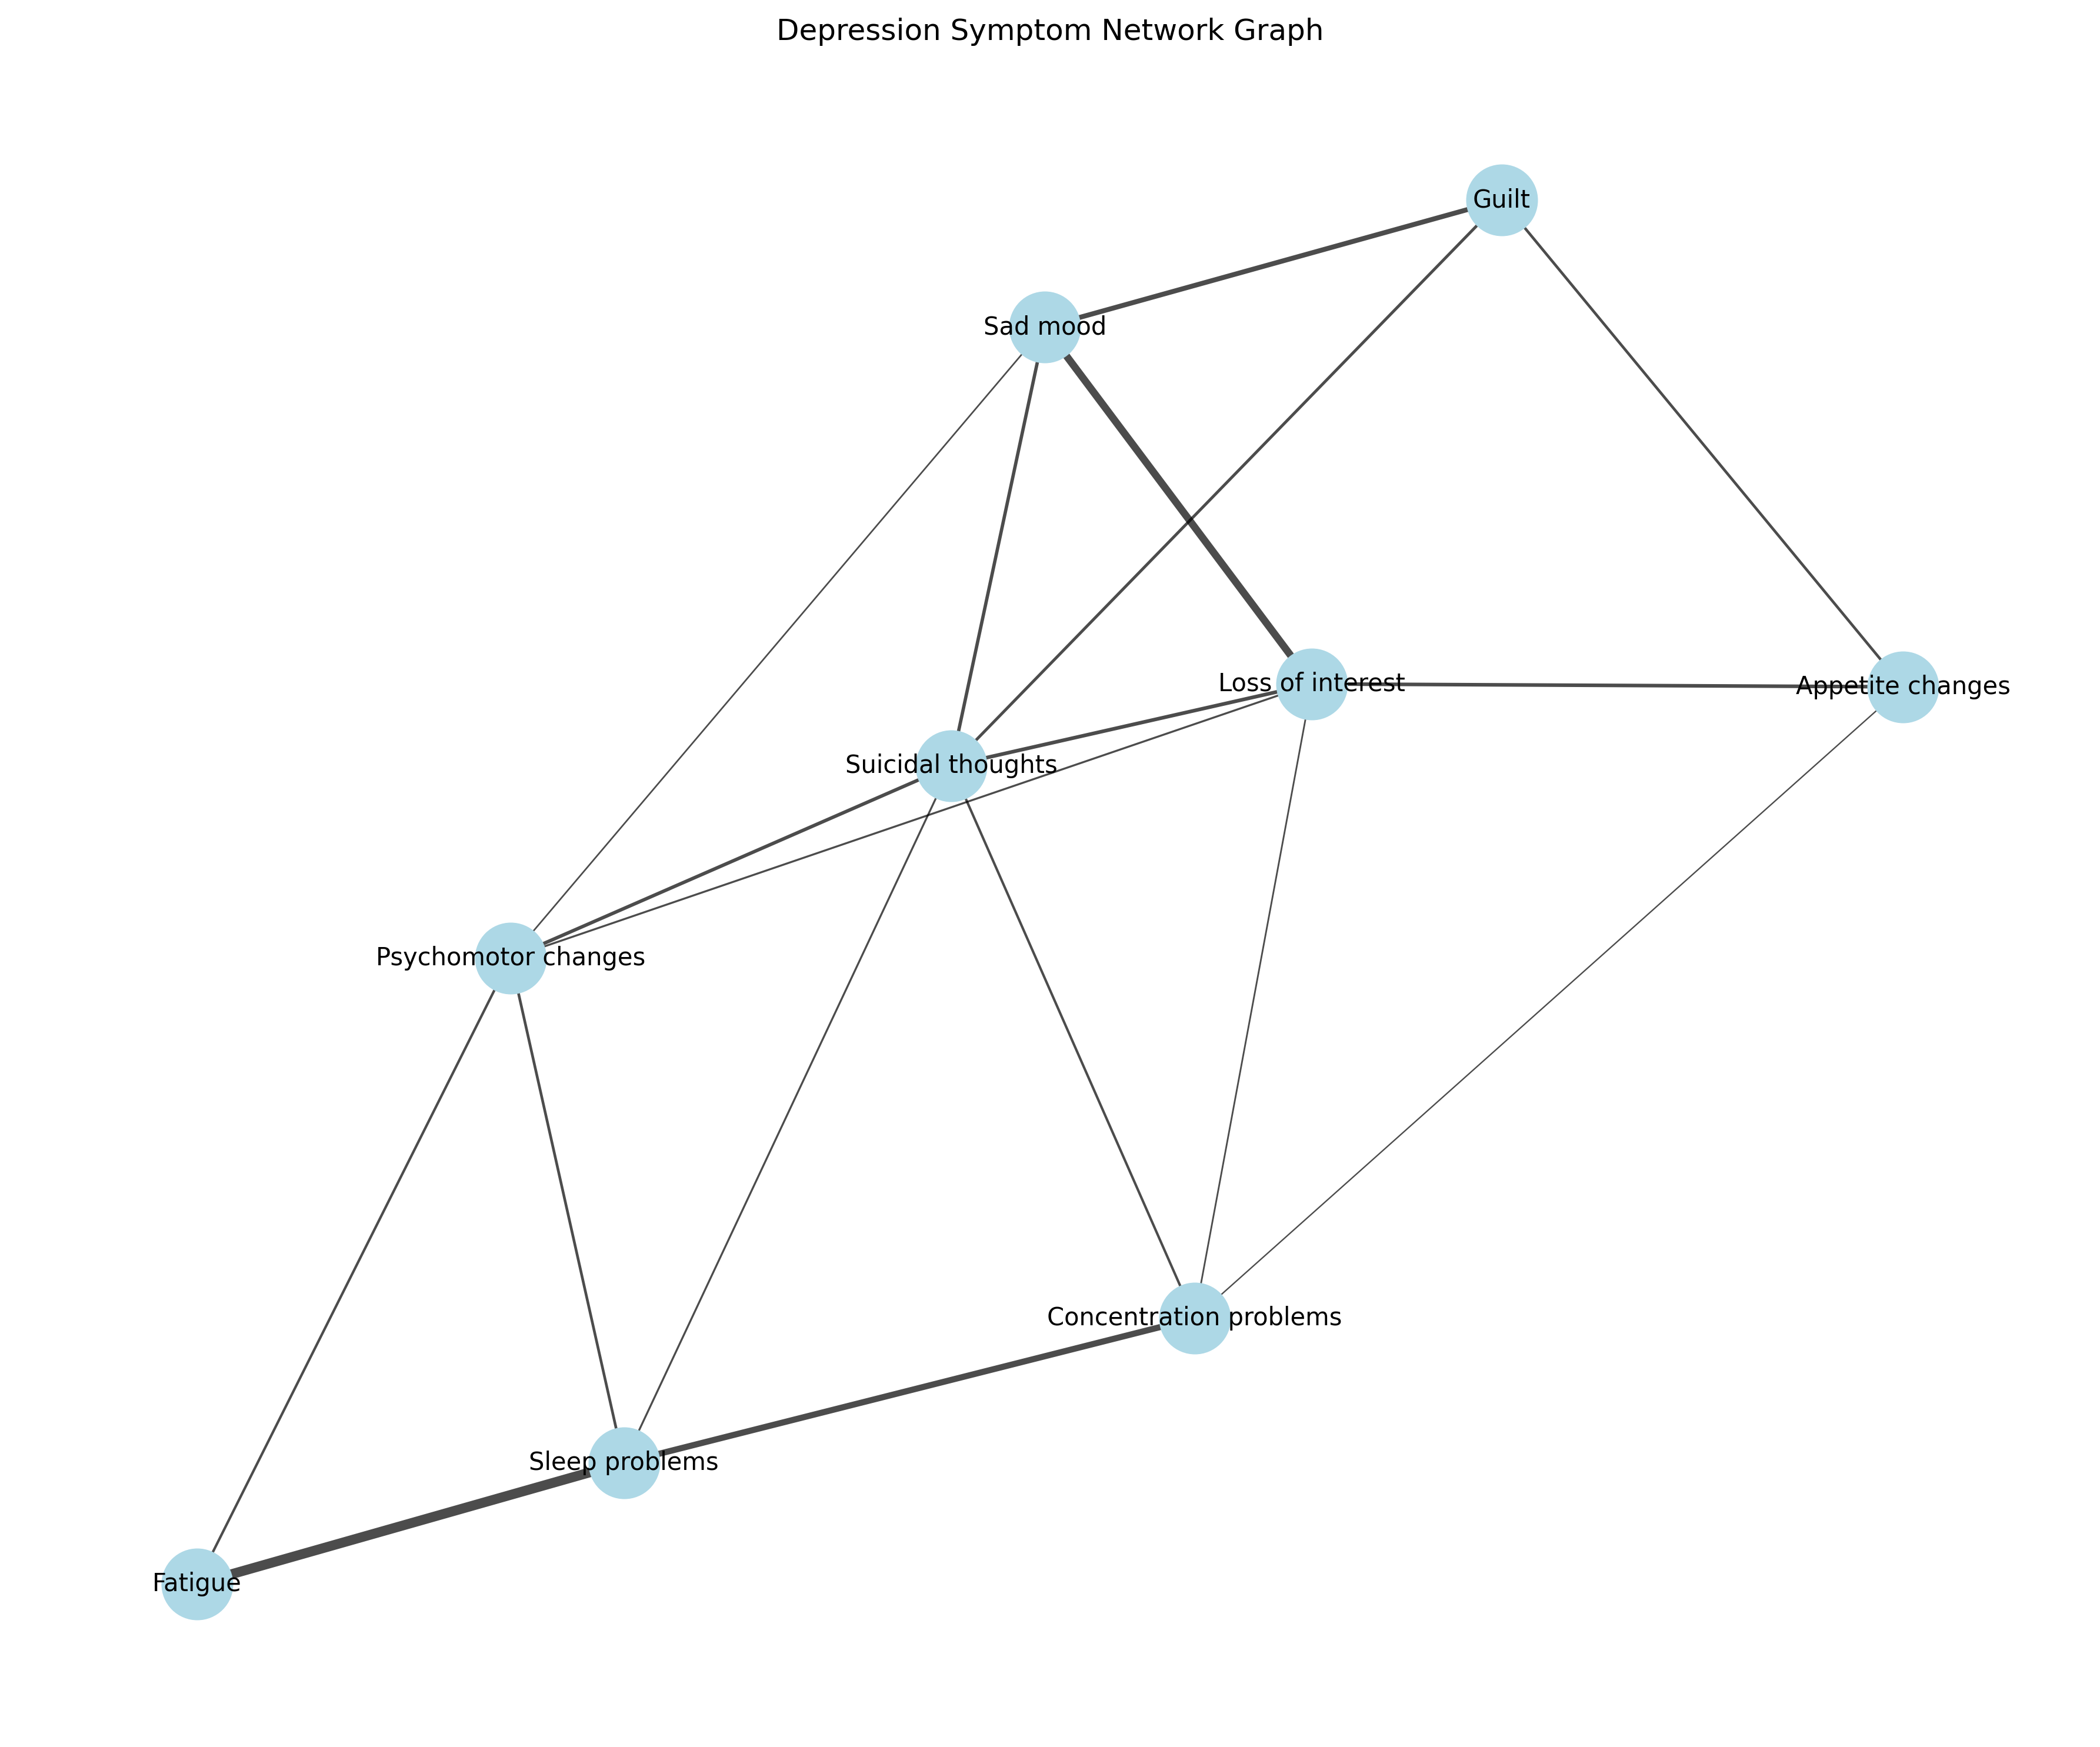

Symptom Centrality Measures (sorted by strength):
                  Symptom  Degree Centrality  Strength Centrality
2          Sleep problems                  4             1.680800
1        Loss of interest                  5             1.491195
8       Suicidal thoughts                  6             1.449410
0                Sad mood                  4             1.404434
3                 Fatigue                  2             1.002847
7     Psychomotor changes                  5             0.999129
6  Concentration problems                  4             0.948411
5                   Guilt                  3             0.858356
4        Appetite changes                  3             0.628501


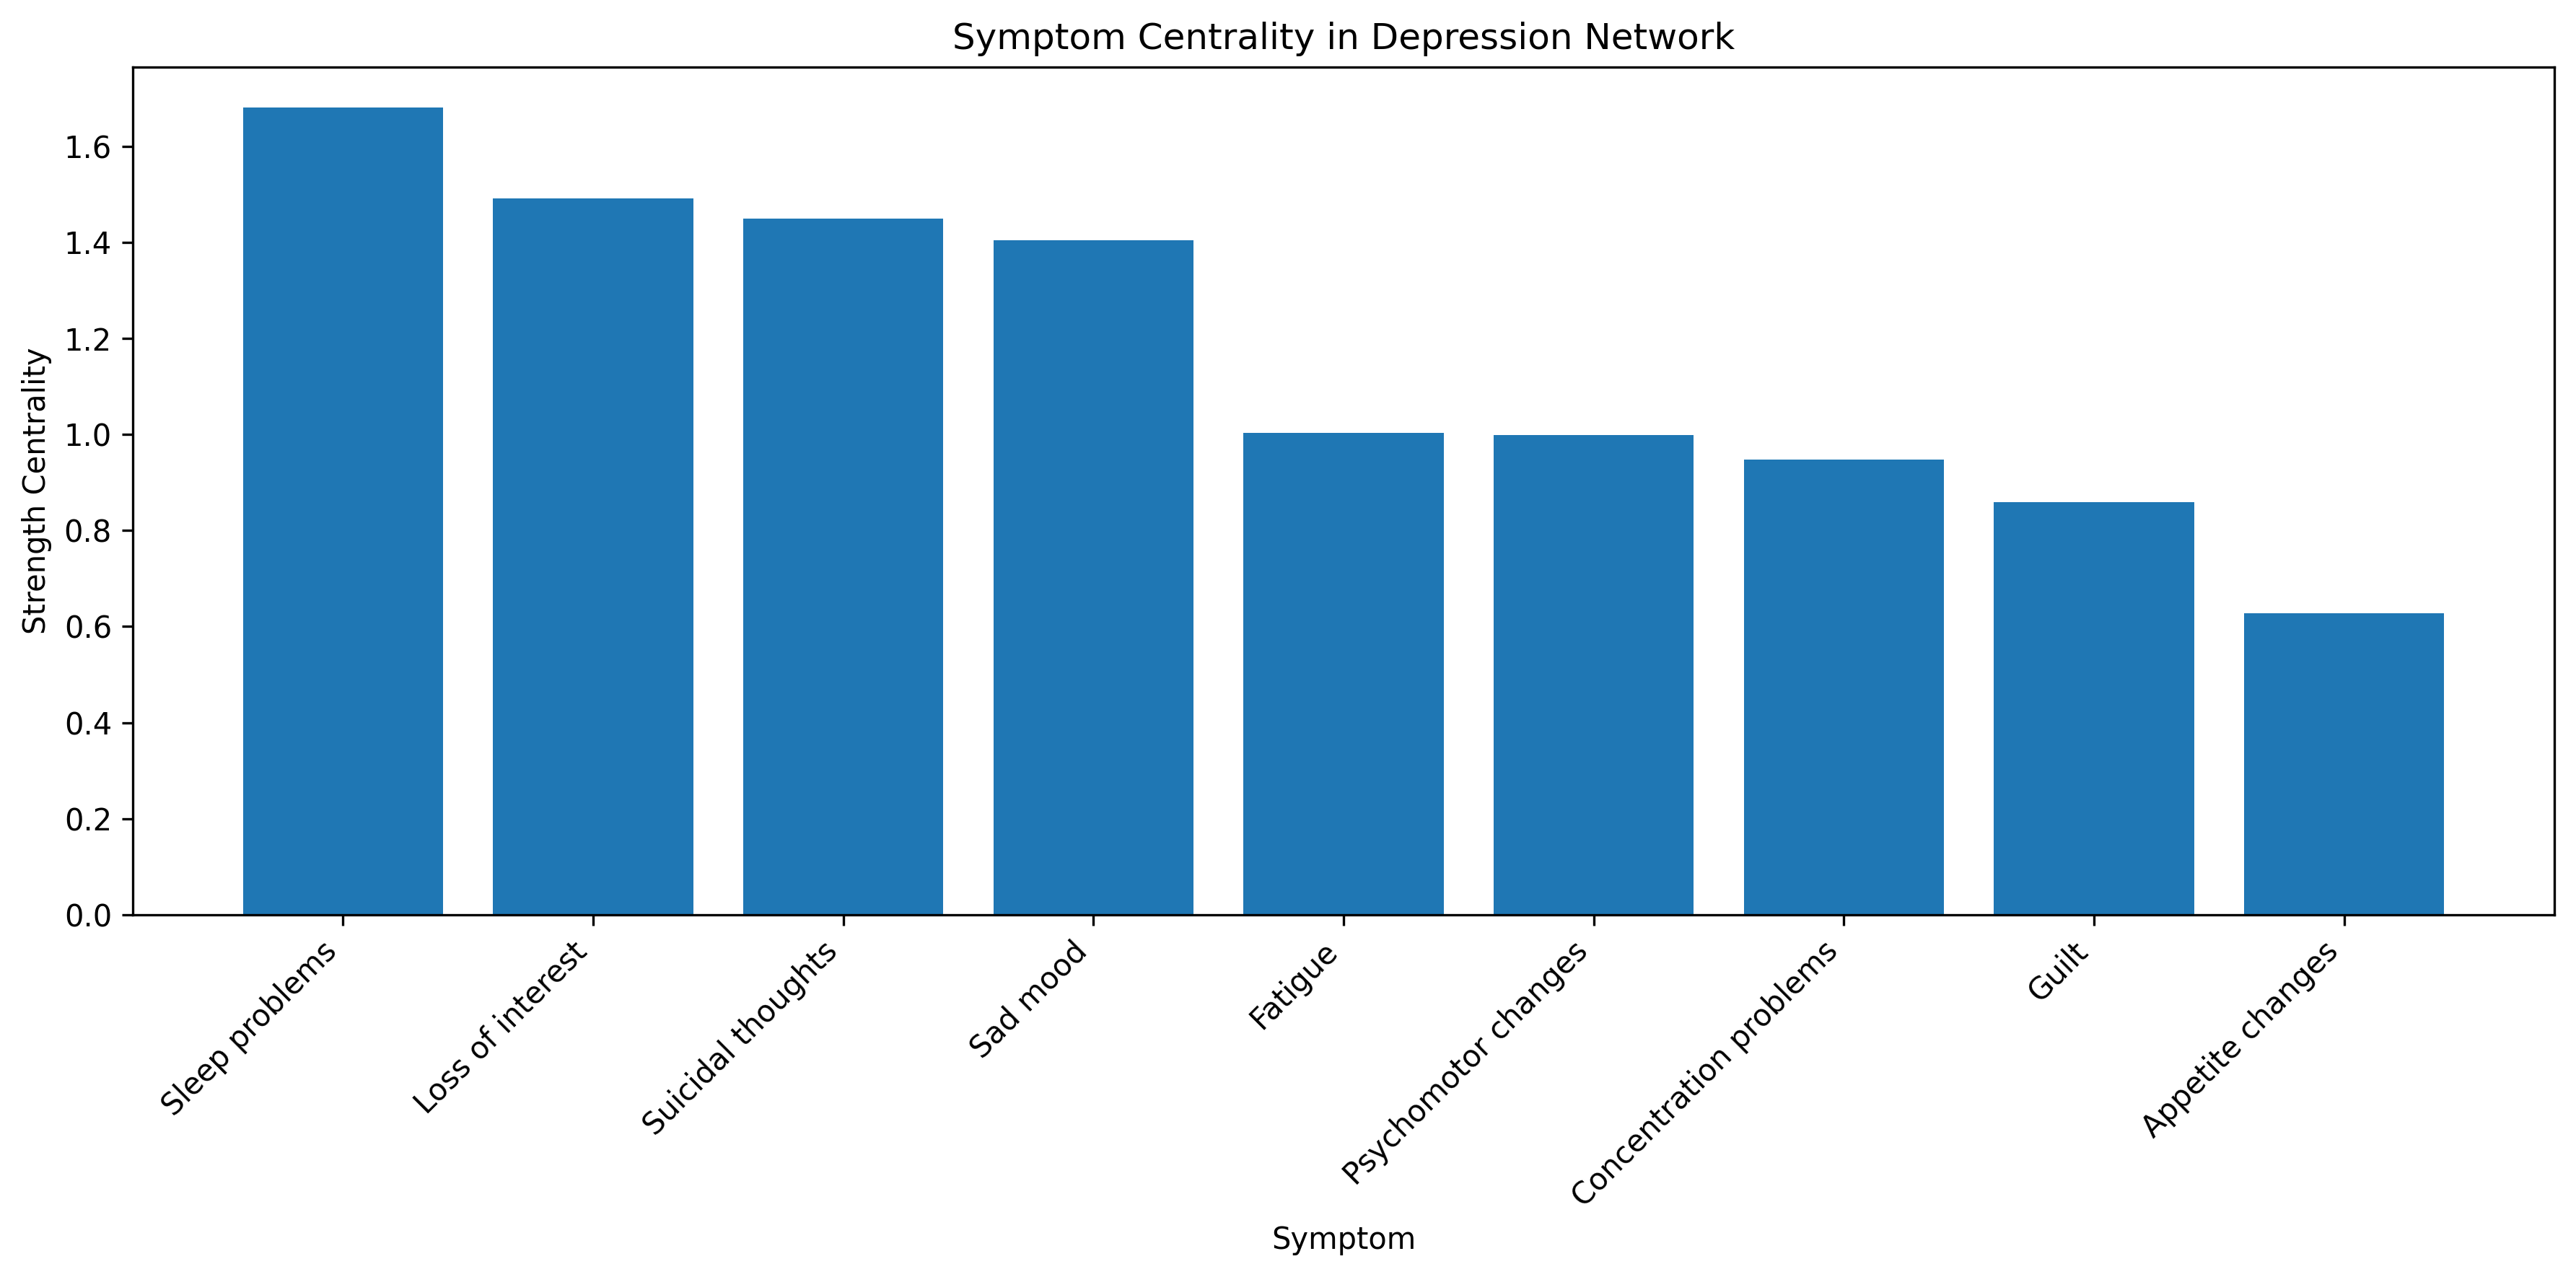

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# Define depression symptoms
symptoms = [
    "Sad mood",
    "Loss of interest",
    "Sleep problems",
    "Fatigue",
    "Appetite changes",
    "Guilt",
    "Concentration problems",
    "Psychomotor changes",
    "Suicidal thoughts"
]

# Create a symmetric adjacency matrix representing relationships between symptoms
# Values represent the strength of the relationship (0 = no relationship, 1 = strong relationship)
# This is simulated data for educational purposes
np.random.seed(42)
n = len(symptoms)
adjacency_matrix = np.zeros((n, n))

# Add some meaningful connections
# Sleep problems -> Fatigue (strong)
adjacency_matrix[2, 3] = 0.8
adjacency_matrix[3, 2] = 0.8

# Sad mood -> Loss of interest (moderate)
adjacency_matrix[0, 1] = 0.6
adjacency_matrix[1, 0] = 0.6

# Sleep problems -> Concentration problems (moderate)
adjacency_matrix[2, 6] = 0.5
adjacency_matrix[6, 2] = 0.5

# Sad mood -> Guilt (moderate)
adjacency_matrix[0, 5] = 0.4
adjacency_matrix[5, 0] = 0.4

# Loss of interest -> Suicidal thoughts (weak)
adjacency_matrix[1, 8] = 0.3
adjacency_matrix[8, 1] = 0.3

# Add more random weak connections
for i in range(n):
    for j in range(i+1, n):
        if adjacency_matrix[i, j] == 0:  # If no connection exists yet
            # 30% chance of a weak connection
            if np.random.random() < 0.3:
                strength = np.random.uniform(0.1, 0.3)
                adjacency_matrix[i, j] = strength
                adjacency_matrix[j, i] = strength  # Make it symmetric

# Visualize the adjacency matrix
plt.figure(figsize=(10, 8))
sns.heatmap(adjacency_matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=1,
           xticklabels=symptoms, yticklabels=symptoms)
plt.title("Depression Symptom Network: Adjacency Matrix")
plt.tight_layout()
plt.show()

# Create a network graph visualization
G = nx.Graph()

# Add nodes
for i, symptom in enumerate(symptoms):
    G.add_node(i, label=symptom)

# Add edges with weights
for i in range(n):
    for j in range(i+1, n):
        if adjacency_matrix[i, j] > 0:
            G.add_edge(i, j, weight=adjacency_matrix[i, j])

# Plot the network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # Position nodes using force-directed layout

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=800, node_color="lightblue")

# Draw edges with varying thickness based on weight
edge_weights = [G[u][v]['weight'] * 5 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.7)

# Draw labels
nx.draw_networkx_labels(G, pos, labels={i: symptoms[i] for i in range(n)}, font_size=10)

plt.title("Depression Symptom Network Graph")
plt.axis('off')
plt.tight_layout()
plt.show()

# Calculate centrality measures - which symptoms are most "central" in the network?
# This helps identify which symptoms might be most important to target in treatment

# Degree centrality (number of connections)
degree_centrality = [sum(adjacency_matrix[i, :] > 0) for i in range(n)]

# Strength centrality (sum of connection weights)
strength_centrality = [sum(adjacency_matrix[i, :]) for i in range(n)]

# Create a dataframe for results
import pandas as pd
centrality_df = pd.DataFrame({
    'Symptom': symptoms,
    'Degree Centrality': degree_centrality,
    'Strength Centrality': strength_centrality
})

centrality_df = centrality_df.sort_values('Strength Centrality', ascending=False)

print("Symptom Centrality Measures (sorted by strength):")
print(centrality_df)

# Visualize centrality
plt.figure(figsize=(12, 6))
plt.bar(centrality_df['Symptom'], centrality_df['Strength Centrality'])
plt.xlabel('Symptom')
plt.ylabel('Strength Centrality')
plt.title('Symptom Centrality in Depression Network')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Solving Systems of Linear Equations

One of the most common applications of matrices is solving systems of linear equations. For example, you might need to solve something like:

$$
\begin{align*}
2x + 3y &= 8 \\
4x - y &= 1
\end{align*}
$$

We can rewrite this in matrix form as $AX = B$ where:

$$
A = \begin{pmatrix}
2 & 3 \\
4 & -1
\end{pmatrix}, \quad
X = \begin{pmatrix}
x \\
y
\end{pmatrix}, \quad
B = \begin{pmatrix}
8 \\
1
\end{pmatrix}
$$

The solution is $X = A^{-1}B$. Let's solve this system:

In [22]:
# Define the coefficient matrix A and the right-hand side vector B
A = np.array([[2, 3], [4, -1]])
B = np.array([8, 1])

print("Coefficient matrix A:")
print(A)
print("\nRight-hand side vector B:")
print(B)

# Solve the system using the inverse
A_inv = np.linalg.inv(A)
X = A_inv @ B

print("\nSolution using matrix inverse:")
print(f"x = {X[0]}")
print(f"y = {X[1]}")

# Alternatively, we can use NumPy's built-in solver
X_alt = np.linalg.solve(A, B)
print("\nSolution using numpy.linalg.solve():")
print(f"x = {X_alt[0]}")
print(f"y = {X_alt[1]}")

# Verify that our solution is correct
verification = A @ X
print("\nVerification (A × X should equal B):")
print(verification)
print(f"Is A × X = B? {np.allclose(verification, B)}")

Coefficient matrix A:
[[ 2  3]
 [ 4 -1]]

Right-hand side vector B:
[8 1]

Solution using matrix inverse:
x = 0.7857142857142857
y = 2.142857142857143

Solution using numpy.linalg.solve():
x = 0.7857142857142857
y = 2.142857142857143

Verification (A × X should equal B):
[8. 1.]
Is A × X = B? True


### Psychological Application: Multiple Regression

Multiple regression in psychology is essentially solving a system of linear equations. For example, we might want to predict academic performance based on several variables.

Estimated regression coefficients:
Intercept = 72.41
IQ effect = 0.30 points per IQ point above 100
Study hours effect = 1.96 points per hour
Sleep effect = 0.76 points per hour

True coefficients:
Intercept = 70
IQ effect = 0.3
Study hours effect = 2
Sleep effect = 1

R-squared = 0.7805


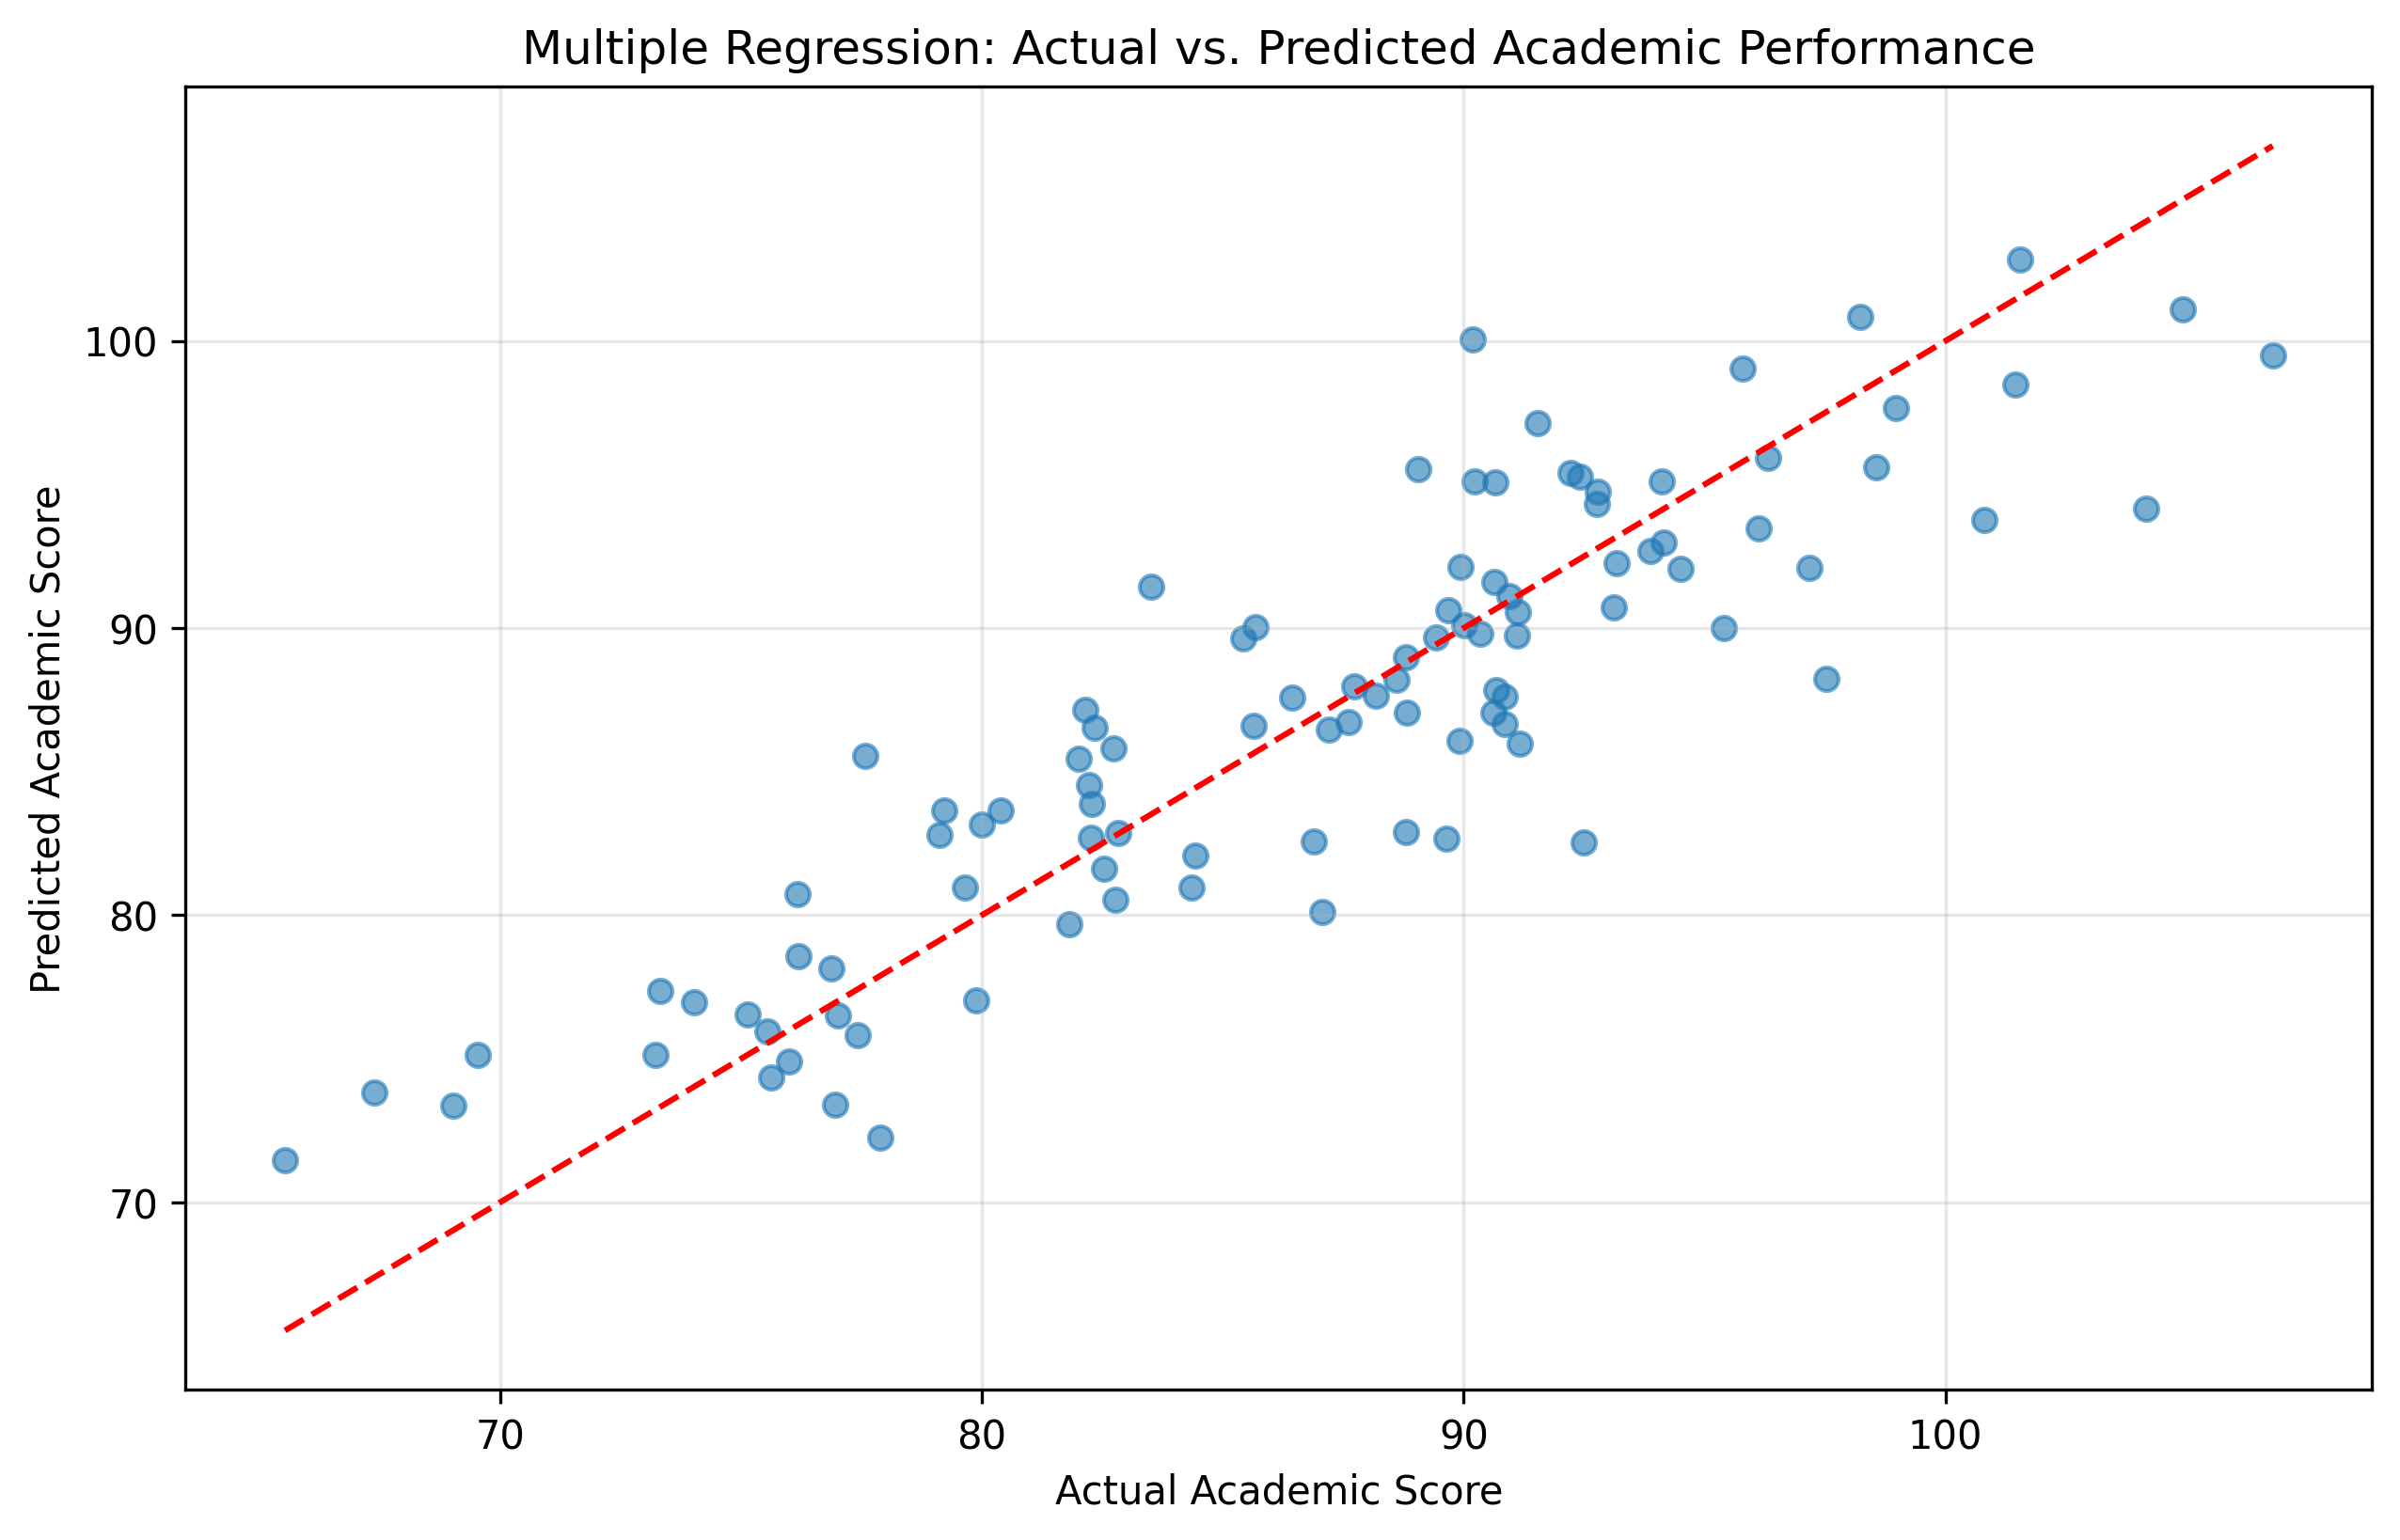

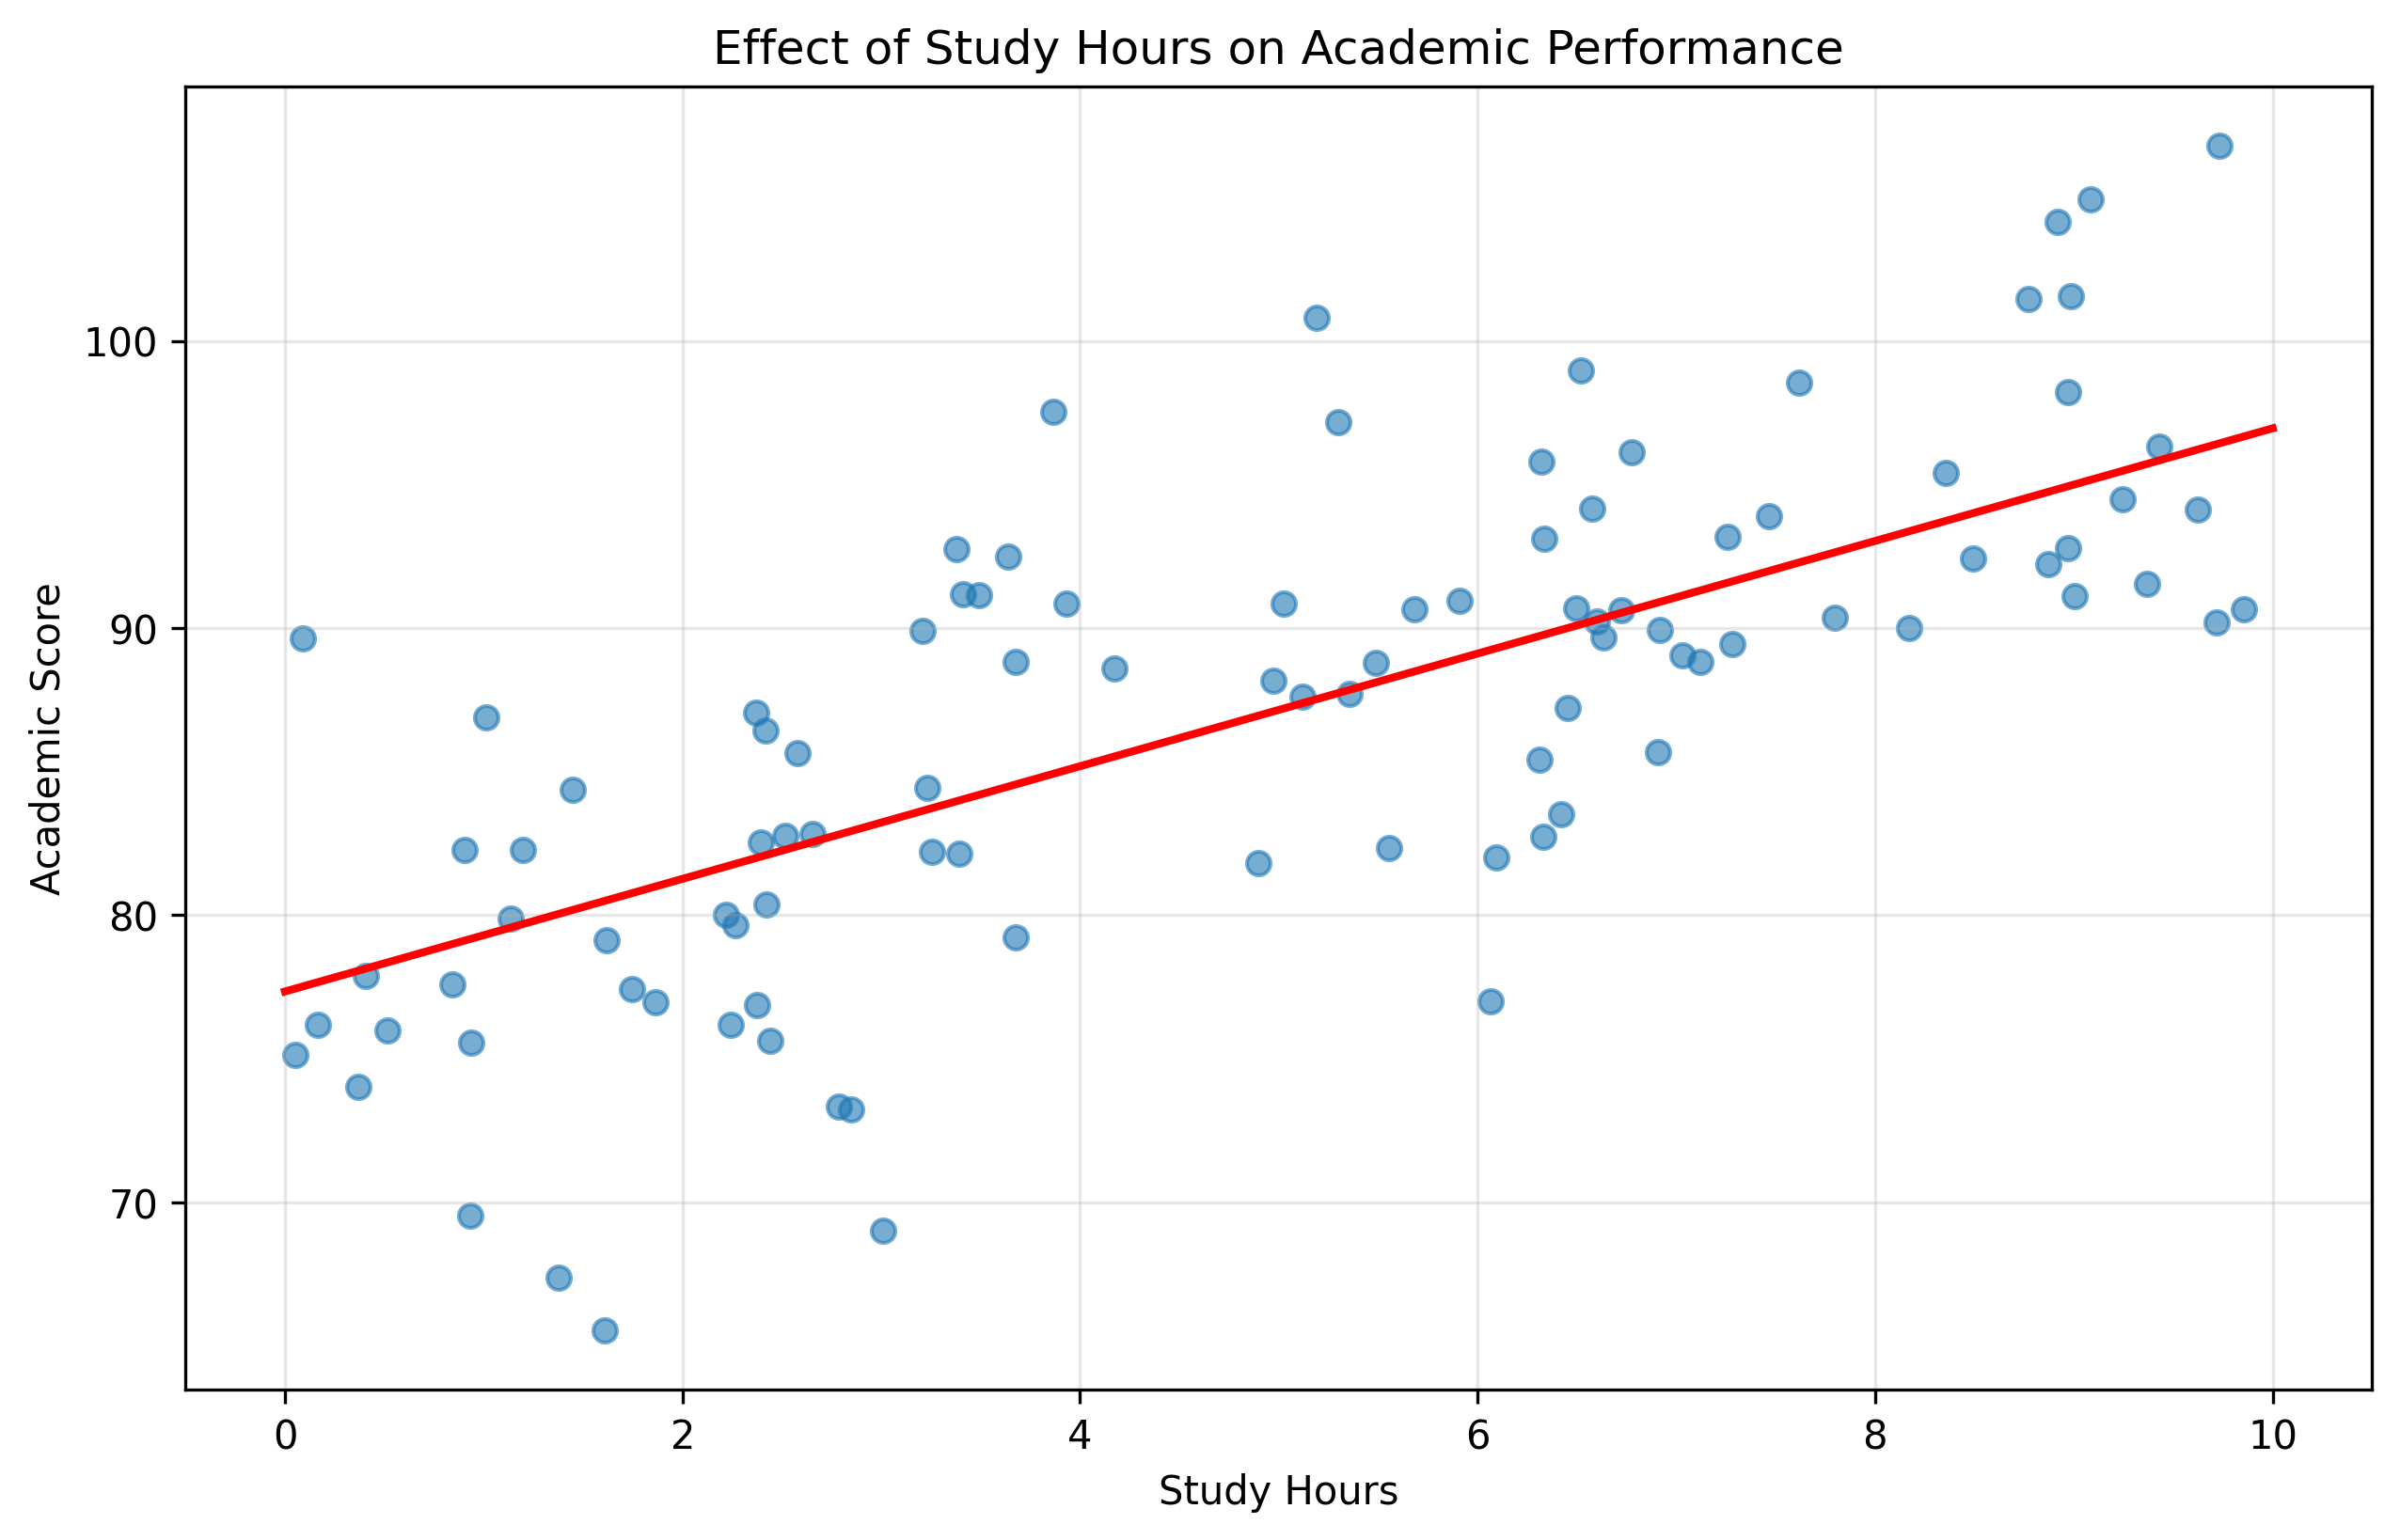

In [23]:
# Create simulated data for a multiple regression problem
np.random.seed(42)
n_students = 100

# True coefficients
true_intercept = 70    # Base score
true_iq_effect = 0.3   # Each IQ point adds 0.3 to score
true_hours_effect = 2  # Each study hour adds 2 points
true_sleep_effect = 1  # Each hour of sleep adds 1 point

# Generate predictors
iq = np.random.normal(100, 15, n_students)  # IQ scores, mean=100, sd=15
study_hours = np.random.uniform(0, 10, n_students)  # 0 to 10 hours of study
sleep_hours = np.random.normal(7, 1.5, n_students)  # Sleep hours, mean=7, sd=1.5

# Generate academic performance with some random noise
academic_score = (true_intercept + 
                  true_iq_effect * (iq - 100) +  # Center IQ at 100
                  true_hours_effect * study_hours + 
                  true_sleep_effect * sleep_hours + 
                  np.random.normal(0, 5, n_students))  # Random noise

# Create design matrix (adding a column of 1s for the intercept)
X = np.column_stack([np.ones(n_students), iq - 100, study_hours, sleep_hours])

# Calculate the regression coefficients
# The formula is: β = (X^T X)^(-1) X^T y
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
Xty = X.T @ academic_score
beta = XtX_inv @ Xty

print("Estimated regression coefficients:")
print(f"Intercept = {beta[0]:.2f}")
print(f"IQ effect = {beta[1]:.2f} points per IQ point above 100")
print(f"Study hours effect = {beta[2]:.2f} points per hour")
print(f"Sleep effect = {beta[3]:.2f} points per hour")

print("\nTrue coefficients:")
print(f"Intercept = {true_intercept}")
print(f"IQ effect = {true_iq_effect}")
print(f"Study hours effect = {true_hours_effect}")
print(f"Sleep effect = {true_sleep_effect}")

# Calculate predicted values
predicted_scores = X @ beta

# Calculate R-squared
mean_score = np.mean(academic_score)
total_sum_squares = np.sum((academic_score - mean_score) ** 2)
residual_sum_squares = np.sum((academic_score - predicted_scores) ** 2)
r_squared = 1 - (residual_sum_squares / total_sum_squares)

print(f"\nR-squared = {r_squared:.4f}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(academic_score, predicted_scores, alpha=0.6)
plt.plot([min(academic_score), max(academic_score)], 
         [min(academic_score), max(academic_score)], 'r--')
plt.xlabel('Actual Academic Score')
plt.ylabel('Predicted Academic Score')
plt.title('Multiple Regression: Actual vs. Predicted Academic Performance')
plt.grid(alpha=0.3)
plt.show()

# Let's visualize the effect of study hours on academic performance
plt.figure(figsize=(10, 6))
plt.scatter(study_hours, academic_score, alpha=0.6)

# Add regression line for study hours effect, holding other variables at their means
x_range = np.linspace(0, 10, 100)
mean_iq_centered = np.mean(iq) - 100
mean_sleep = np.mean(sleep_hours)
y_pred = beta[0] + beta[1]*mean_iq_centered + beta[2]*x_range + beta[3]*mean_sleep

plt.plot(x_range, y_pred, 'r-', linewidth=2)
plt.xlabel('Study Hours')
plt.ylabel('Academic Score')
plt.title('Effect of Study Hours on Academic Performance')
plt.grid(alpha=0.3)
plt.show()

## Practice Exercises

Here are some exercises to help you solidify your understanding of matrices and linear algebra:

1. **Basic Matrix Operations**:
   - Create two 3×3 matrices with different values.
   - Calculate their sum, difference, and product.
   - Calculate the transpose of each matrix.

2. **Psychological Data Representation**:
   - Create a matrix representing 5 participants' responses to 4 questions.
   - Calculate the mean response for each participant (row means).
   - Calculate the mean response for each question (column means).
   - Visualize the data using a heatmap.

3. **Linear Transformation**:
   - Create a 2×2 rotation matrix that rotates vectors by 45 degrees.
   - Apply this transformation to a vector [1, 0] and plot the result.

4. **Eigenvalues and Eigenvectors**:
   - Find the eigenvalues and eigenvectors of a 2×2 correlation matrix.
   - Interpret what the dominant eigenvector represents.

5. **Multiple Regression**:
   - Generate data for a psychological experiment with two predictors.
   - Use matrix operations to calculate the regression coefficients.
   - Compare your results with those from a statistical package.

## Further Resources

If you'd like to learn more about matrices and linear algebra in psychology, here are some resources:

1. Books:
   - "Matrix Algebra Useful for Statistics" by Shayle R. Searle
   - "Applied Multivariate Statistical Analysis" by Richard A. Johnson and Dean W. Wichern

2. Online Courses:
   - Khan Academy's Linear Algebra course
   - 3Blue1Brown's "Essence of Linear Algebra" YouTube series (highly visual explanations)

3. Python Resources:
   - NumPy documentation for linear algebra functions
   - SciPy's linear algebra module
   - The book "Python for Data Analysis" by Wes McKinney

4. Psychology Applications:
   - "Factor Analysis" by R.J. Rummel
   - "SEM with Mplus" by Barbara Byrne (for structural equation modeling)

In the next chapter, we'll introduce basic calculus, which is essential for understanding more advanced statistical models and optimization in psychology.